<img src = "https://www.hh.se/images/18.4ad3d9ee1656d0f05ef643a3/1550842090193/hh-logo.svg" width = "150" align = "left">  
<br/>
<br/>
    
# Python, a Gateway to Machine Learning


## Project

The project consists of three parts:

1. a series of short exercises that help you practice with Pandas to become familiar with some of the data types and operations that they provide and also with the programming style (sometimes called pointfree: no for loops). There are more instructions in the introduction to part 1.

2. a series of short exercises that help you practice with NumPy to become familiar with some of the data types and operations that they provide and also with the programming style (sometimes called pointfree: no for loops). There are more instructions in the introduction to part 2.

3. a topic of your choice where you get to use NumPy and Pandas on real data related to weather, climate and climate change. There are more instructions in the introduction to part 3.

This project is part of the examination of the course. There are instructions on how to submit, including deadlines and advice, in the Blackboard site for the course. Please follow these instructions. There you can also see what is needed in order to pass. 




## Part 1: short exercises with Pandas

We use the same data files from the book Learning Data Science that we used in the lectures: 
[babynames.csv](https://halmstaduniversity.box.com/shared/static/cuij98tidhr7mwhuoni5c2y18i7rq337.csv), [dogs.csv](https://halmstaduniversity.box.com/shared/static/75s4xtmx8asn83y3pfp9t2q9c7axyn86.csv) and [nyt_names.csv](https://halmstaduniversity.box.com/shared/static/ksc9zj0cg4b8bt8v5cr4cmugaxw1y3e9.csv). We also use another file distributed with the book Learning Data Science: arrival times of busses in Seattle (data for the stops of Seattle’s Rapid Ride lines C, D, and E at Third Avenue and Pike Street. The Washington State Transportation Center has provided times for all of the actual and scheduled stop times of these three bus lines between March 26 and May 27, 2016) [arrival_times.csv](https://halmstaduniversity.box.com/shared/static/4afc02f2bysjxrdr5idvtzg9k6m7dsn3.csv).

In [32]:
import pandas as pd

In [33]:
# Data for exercise 1:

babynames = pd.read_csv('babynames.csv')
babynames.sample(10)

,Name,Sex,Count,Year
5758,Atom,M,35,2021
2037812,Freddie,M,14,1886
1216928,Makeva,F,5,1978
1502350,Daralyn,F,12,1958
1293445,Cecila,F,14,1974
1013485,Nadir,M,9,1988
997323,Shakari,F,21,1989
734134,Sujey,F,24,1999
1173130,Markas,M,6,1980
1327540,Jamal,M,414,1971


### Exercise 1

Use Pandas operations to inspect the data and answer the following questions:

1. How many rows does the data frame have?
2. Are there any data items missing?
3. What is the earliest year included? What is the lastest year included? Are all years in between included or is there any year missing?
4. Are there equally many female names and male names all the years? If not, is there any year for which this is the case?  What are the years with more female names? And with more male names?
5. What is the number of different female names? What is the  number of different male names?
6. Are there any names that are used both as female and male names? Which ones?

In [34]:
#Code for exercise 1.1
babynames.shape


(2052781, 4)

In [35]:
babynames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2052781 entries, 0 to 2052780
Data columns (total 4 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   Name    object
 1   Sex     object
 2   Count   int64 
 3   Year    int64 
dtypes: int64(2), object(2)
memory usage: 62.6+ MB


#### Answer to question 1.1
The above dataframe has (2052781, 4) rows and columns respectively.

In [36]:
# Code for exercise 1.2
babynames.info(show_counts=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2052781 entries, 0 to 2052780
Data columns (total 4 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   Name    2052781 non-null  object
 1   Sex     2052781 non-null  object
 2   Count   2052781 non-null  int64 
 3   Year    2052781 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 62.6+ MB


#### Answer to question 1.2 
As we saw from the result, no null values are there. So, no data items are missing in the dataframe.


In [45]:
# Code for exercise 1.3 

first= babynames['Year'].min()
last= babynames['Year'].max()
print(first)
print(last)
babynames.nunique()



1880
2021


Name     101338
Sex           2
Count     13854
Year        142
dtype: int64

#### Answer to question 1.3
The first year included is 1880
The last year included  is 2021
There are 142 years in the dataset so, all years within the range are included in the dataset.





In [46]:
# Code to help answer questions 1.4

years_with_equal_names = babynames.groupby('Year')['Sex'].value_counts().unstack().fillna(0)
equal_names_years = years_with_equal_names[years_with_equal_names['F'] == years_with_equal_names['M']].index.tolist()
if equal_names_years:
    print(" Years with an equal number of female and male names:", equal_names_years)
else:
    print(" There are no years with an equal number of female and male names.")


years_with_more_female_names = years_with_equal_names[years_with_equal_names['F'] > years_with_equal_names['M']].index.tolist()
years_with_more_male_names = years_with_equal_names[years_with_equal_names['M'] > years_with_equal_names['F']].index.tolist()

print("Years with more female names:", years_with_more_female_names)
print("Years with more male names:", years_with_more_male_names)



 There are no years with an equal number of female and male names.
Years with more female names: [1883, 1884, 1885, 1886, 1887, 1888, 1889, 1890, 1891, 1892, 1893, 1894, 1895, 1896, 1897, 1898, 1899, 1900, 1901, 1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909, 1910, 1911, 1912, 1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]
Years with more male names: [1880, 1881, 1882]


#### Answers to question 1.4
As we see in the output, there are no years with an equal number of male and female names.
    
    Years with more female names: [1883, 1884, 1885, 1886, 1887, 1888, 1889, 1890, 1891, 1892, 1893, 1894, 1895, 1896, 1897, 1898, 1899, 1900, 1901, 1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909, 1910, 1911, 1912, 1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]
    
    Years with more male names: [1880, 1881, 1882]


In [47]:
# Code to help answer question 1.5
female_names = babynames[babynames['Sex'] == 'F']
male_names = babynames[babynames['Sex'] == 'M']

num_female_names = female_names['Name'].nunique()
num_male_names = male_names['Name'].nunique()

print("Number of different female names:", num_female_names)
print("Number of different male names:", num_male_names)


Number of different female names: 69527
Number of different male names: 43093


#### Answer to question 1.5
 The number of different female names is 69527 and the number of different male names is 43093


In [48]:
# Code to help answer question 1.6

female_names_set = set(babynames[babynames['Sex'] == 'F']['Name'])
male_names_set = set(babynames[babynames['Sex'] == 'M']['Name'])
common_names = female_names_set.intersection(male_names_set)
if common_names:
    print(" Names used as both female and male names:", common_names)
else:
    print(" There are no names used as both female and male names.")

 Names used as both female and male names: {'Harjot', 'Isabel', 'Maxie', 'Bunny', 'Dustine', 'Konley', 'Keyontae', 'Halcyon', 'Binnie', 'Arthur', 'Cletus', 'Scyler', 'Dorothea', 'Ronin', 'Mikal', 'Deonte', 'Auguste', 'Jonnah', 'Noa', 'Daphne', 'Jionni', 'Davine', 'Myrtis', 'Eldred', 'Dharma', 'Terence', 'Maclaine', 'Calloway', 'Dick', 'Willa', 'Takaya', 'Kacie', 'Anani', 'Ken', 'Ida', 'Wiley', 'Pierson', 'Demetric', 'Kindall', 'Velmar', 'Clevie', 'Price', 'Angell', 'Oaklynd', 'Omarion', 'Kennith', 'Elver', 'Rayen', 'Benelli', 'Loy', 'Masada', 'Destin', 'Coen', 'Lucille', 'Masami', 'Jorah', 'Innis', 'Kameron', 'Merdith', 'Korby', 'Korry', 'Lasean', 'Lark', 'Orva', 'Alonzia', 'Gabreal', 'Chriss', 'Zeriah', 'Mckell', 'Ananya', 'Luke', 'Ari', 'Marcelle', 'Tyquan', 'Cuba', 'Gertrude', 'Dmoni', 'Donnis', 'Kamryn', 'Ebba', 'Kendy', 'Davin', 'Jaiel', 'Darley', 'Lynwood', 'Kamalani', 'Jonesy', 'Tian', 'Adriene', 'Timmie', 'Chau', 'Dondi', 'Deyon', 'Layton', 'Noha', 'Reshawn', 'Norah', 'Clennie'

#### Answer to question 1.6
Yes there are the names that are used both as female and male names and the names are: 
 {'Marx', 'Inari', 'Galen', 'Tennell', 'Jordyn', 'Macie', 'Potter', 'Alexiz', 'Sherron', 'Clovis', 'Angell', 'Isia', 'Samnang', 'Shell', 'Villa', 'Lejeune', 'Lubie', 'Joselyn', 'Welcome', 'Jia', 'Yireh', 'Dareen', 'Khyrie', 'Vinnie', 'Win', 'Elishah', 'Zuri', 'Zhane', 'Adilene', 'Leslee', 'Jaidyn', 'Sol', 'Kristen', 'Reginal', 'Jaydenn', 'Robbie', 'Stephane', 'Jennings', 'Terrace', 'Ebby', 'Camerin', 'Bristol', 'Onell', 'Kelcy', 'Cambryn', 'Zade', 'Kollins', 'Zephyr', 'Mishawn', 'Arlington', 'Orlean', 'Kian', 'Noah', 'Kline', 'Cagney', 'Delynn', 'Adama', 'Noa', 'Shanika', 'Dodi', 'Kareen', 'Nain', 'Rand', 'Jayloni', 'Kaycee', 'Karson', 'Riggin', 'Juanito', 'Germain', 'Kirby', 'Harlym', 'Sivan', 'Kendre', 'Jammy', 'Domanique', 'Loring', 'Kensley', 'Kaedence', 'Railey', 'Shelby', 'Javan', 'Ragen', 'Terral', 'Chandler', 'Beckette', 'Corinne', 'Sukhpreet', 'Chris', 'Elver', 'Jasman', 'Jubilee', 'Jaelyn', 'Natori', 'Dian', 'Kent', 'Maysin', 'Andra', 'Asyah', 'Carnie', 'Kobie', 'Edmund', 'Deaundra', 'Raegen', 'Perla', 'Eddison', 'Kaizen', 'Khaos', 'Federico', 'Ajani', 'Carolina', 'Caidyn', 'Garrie', 'Hensley', 'Zakia', 'Brighten', 'Hart', 'Pete', 'Rafi', 'Josey', 'Nature', 'Omari', 'Nevel', 'Amarin', 'Eriel', 'Sathya', 'Luan', 'Amirii', 'Dacota', 'Nakia', 'Kandy', 'Carney', 'Rohan', 'Hastings', 'Fran', 'Breland', 'Yahya', 'Kiyoshi', 'Kruz', 'Aarion', 'Mickenzie', 'Ronie', 'Rainey', 'Camdyn', 'Kensly', 'Ezryn', 'Terae', 'Kylan', 'Kayden', 'Kennedi', 'Munachiso', 'Shande', 'Gianni', 'Roben', 'Julianni', 'Kinnie', 'Rise', 'Chyanne', 'Benni', 'Ashden', 'Gabby', 'Elouise', 'Evin', 'Kazumi', 'Raylynn', 'Louis', 'Kailand', 'Lennox', 'Gerrie', 'Windy', 'Tam', 'Rein', 'Aaliyan', 'Tomiko', 'Cai', 'Skyy', 'Landyn', 'Jadie', 'Clester', 'Reid', 'Memphys', 'Tylar', 'Regina', 'Merl', 'Portland', 'Alonza', 'Sarin', 'Kylyn', 'Scotti', 'Elisa', 'Caidence', 'Jeanne', 'Daelin', 'Mackay', 'Jaylyne', 'Avneet', 'Thamar', 'Emaan', 'Demitrice', 'Kapree', 'Waylon', 'Adrine', 'Breon', 'Maira', 'Tron', 'Carmell', 'Juana', 'Wen', 'Cam', 'Archer', 'Leonides', 'Shontae', 'Perryn', 'Jaydon', 'Prince', 'Ladell', 'Rayvon', 'Cadance', 'Julissa', 'Blondell', 'Burley', 'Jordynn', 'Taylyn', 'Sabin', 'Brelynn', 'Mckinsey', 'Keon', 'Cathy', 'Joel', 'Verlin', 'Ledell', 'Lumen', 'Tegen', 'Lora', 'Lauren', 'Betsy', 'Holland', 'Solaris', 'Jordann', 'Merriel', 'Robbi', 'Myrna', 'Ned', 'Germaine', 'Clay', 'Lafayette', 'Dawsyn', 'Bethany', 'Demetrus', 'Chinemerem', 'Kaulana', 'Wellesley', 'Simmie', 'Thad', 'Nasiah', 'Dyson', 'Americus', 'Erich', 'Earl', 'Annette', 'Rhythm', 'Paycen', 'Amire', 'Dariel', 'Colin', 'Norvell', 'Jamere', 'Machael', 'Syan', 'Rosanna', 'Deandrea', 'Jaye', 'Jeremi', 'Peyten', 'Rayhan', 'Deonne', 'Wade', 'King', 'Kionne', 'Yesenia', 'Sachary', 'Eun', 'Gal', 'Rashon', 'Caysen', 'Johanny', 'Dominique', 'Macaire', 'Tanay', 'Jerrel', 'Ala', 'Larken', 'Lawon', 'Lorde', 'Tywan', 'Sutten', 'Kaena', 'Archie', 'Alma', 'Victorious', 'Clemie', 'Bryson', 'Savannah', 'Zoey', 'Bunny', 'Cora', 'Maranatha', 'Rhonda', 'Riyan', 'Aryes', 'Raini', 'Aleksa', 'Phenix', 'Adrienne', 'Halley', 'Ramari', 'Tristin', 'Jantzen', 'Carroll', 'Camaron', 'Garret', 'Kunta', 'Parks', 'Teygan', 'Lenis', 'Jakhai', 'Jinan', 'Alaia', 'Sherrill', 'Jamile', 'Atreya', 'Marissa', 'Atlas', 'Flay', 'Cheney', 'Vadis', 'Chez', 'Keiren', 'Heidi', 'Jawan', 'Khyri', 'Kala', 'Jamarea', 'Ronnye', 'Gareth', 'Marrion', 'Keante', 'Lon', 'Kiya', 'Monty', 'Armanni', 'Thayer', 'Tee', 'Ezelle', 'Sherman', 'Paxton', 'Tarik', 'Caro', 'Nazareth', 'Amarie', 'Pendleton', 'Lindel', 'Ayele', 'Carel', 'Juniper', 'Camaren', 'Dontrell', 'Aman', 'Yancey', 'Bernis', 'Catalina', 'Kim', 'Lafon', 'Mylo', 'Nesly', 'Luis', 'Acy', 'Deonna', 'Aquilla', 'Gere', 'Karsyn', 'Gage', 'Areen', 'Emary', 'Kaedynn', 'Miraj', 'Marshon', 'Noname', 'Kendahl', 'Deniss', 'Donye', 'Reeve', 'Jaid', 'Marlyn', 'Sallie', 'Lind', 'Len', 'Nihaal', 'Braydan', 'Leora', 'Ayaan', 'Ori', 'Falcon', 'Susana', 'Izel', 'Victoria', 'Destine', 'Glyndon', 'Tiante', 'Adrianna', 'Ilham', 'Bailor', 'Thai', 'Zong', 'Jabree', 'Damian', 'Maison', 'Demitrius', 'Shaquon', 'Sukhjit', 'Tyquan', 'Rome', 'Shadon', 'Italy', 'Sehaj', 'Armahni', 'Manvir', 'Arka', 'Neon', 'Dennise', 'Arian', 'Sonam', 'Copeland', 'Zacariah', 'Nhia', 'Karsin', 'Tye', 'Gabrieal', 'Rory', 'Brannan', 'Davonne', 'Recie', 'Verdis', 'Lennyx', 'Orlee', 'Hillary', 'Westin', 'Brody', 'Sahib', 'Koa', 'Sloan', 'Arzell', 'Lain', 'Garnie', 'Cortez', 'Jonatha', 'Loice', 'Teniola', 'Chen', 'Arlyn', 'Benji', 'Karey', 'Ever', 'Ashlon', 'Connell', 'Jardin', 'Maximus', 'Ren', 'Khori', 'Eduardo', 'Nolynn', 'Mindy', 'Tochi', 'Emry', 'Lavie', 'Mekkah', 'Dulce', 'Milan', 'Willa', 'Rin', 'Kaleigh', 'Aadyn', 'Key', 'Nana', 'Ximena', 'Caitlyn', 'Emone', 'Sinan', 'Azhar', 'Baelyn', 'Shaine', 'Samir', 'Mikaiah', 'Moo', 'Elie', 'Lawrene', 'Orval', 'Rilo', 'Ferol', 'Etta', 'Santonia', 'Sheena', 'Wavie', 'Doll', 'Lilly', 'Alfred', 'Sundown', 'Jionni', 'Mulan', 'Jayce', 'Brenn', 'Jasmond', 'Shadee', 'Vashion', 'Alexander', 'Vaughn', 'Yanick', 'Abimbola', 'Corin', 'Ryian', 'Kelynn', 'Naoki', 'Arcie', 'Era', 'Marquel', 'Saron', 'Kacy', 'Kameo', 'Zel', 'Seville', 'Remington', 'Taytum', 'Jonell', 'Limmie', 'Kawaii', 'Georgy', 'Oluwaferanmi', 'Aylen', 'Coren', 'Deandra', 'Shelley', 'Marlan', 'Zoe', 'Shoney', 'Truett', 'Kenley', 'Cordero', 'Kaylyn', 'Cheyenne', 'Jalin', 'Regan', 'Curlee', 'Alivia', 'Amarri', 'Carlyle', 'Charle', 'Karlyn', 'Artell', 'Essie', 'Coye', 'Adis', 'Amiel', 'Ether', 'Sequoya', 'Mandy', 'Mccartney', 'Onnie', 'Dolores', 'Breckin', 'Ulises', 'Ivor', 'Seth', 'Thien', 'Amaree', 'Shawnee', 'Koda', 'Hager', 'Bernie', 'Payden', 'Altair', 'Curry', 'Asa', 'Devan', 'Meraki', 'Jissie', 'Braxton', 'Kaidyn', 'Ryleigh', 'Ryan', 'Raegan', 'Vanessa', 'Finnie', 'Kenyan', 'Cathleen', 'Keandra', 'Alayna', 'Jensy', 'Lanis', 'Maryan', 'Krystle', 'Aseel', 'Jade', 'Martell', 'Ottie', 'Montrese', 'Delbert', 'Semajae', 'Yessenia', 'Criston', 'Keary', 'Ker', 'Phoenyx', 'Kahlan', 'Fayne', 'Kendyl', 'Devon', 'Aidan', 'Vivin', 'Franklin', 'Courtnay', 'Emjay', 'Dacotah', 'Benelli', 'Thuy', 'Jahzel', 'Lejend', 'Jacquelyn', 'Khyza', 'Fortune', 'Maxey', 'Maciel', 'Tamare', 'Coma', 'Makari', 'Kovah', 'Elner', 'Maitland', 'Redell', 'Mckinney', 'Kovie', 'Kagan', 'Alley', 'Gin', 'Phalen', 'Evone', 'Adolph', 'Rana', 'Cannie', 'Charlene', 'Koy', 'Wilton', 'Trini', 'Rayaan', 'Ora', 'Sloane', 'Eppie', 'Sheldon', 'Clemmie', 'Legacee', 'Niger', 'Rudra', 'Kirklyn', 'Ivry', 'Berthel', 'Marshal', 'Macaulay', 'Takoda', 'Vern', 'Alda', 'Meiko', 'Ferrel', 'Goldyn', 'Rylen', 'Damilola', 'Teryl', 'Joy', 'Jorie', 'Sacred', 'Madian', 'Cena', 'Acelyn', 'Ciara', 'Callen', 'Justina', 'Amiere', 'Quilla', 'Sari', 'Virgie', 'Germany', 'Danyl', 'Shandon', 'Mckinnley', 'Sky', 'Alexey', 'Paysen', 'Jeffery', 'Carmon', 'Meerab', 'Gibson', 'Charming', 'Manjot', 'Chantelle', 'Janette', 'Rosell', 'Gussie', 'Lynnox', 'Dinnie', 'Valley', 'Hser', 'Starlyn', 'Siyam', 'Peytin', 'Myaire', 'Cadrian', 'Brilliant', 'Wrenn', 'Elsie', 'Mills', 'Pheonix', 'Nikai', 'Nola', 'Kawena', 'Daylan', 'Ryman', 'Camiel', 'Kyran', 'Cree', 'Deangelo', 'Korrie', 'Armanii', 'Charo', 'Kaylynn', 'Texas', 'Zeriah', 'Keziah', 'Perfect', 'Tobey', 'Quincey', 'Kennis', 'Teagin', 'Jaycee', 'Maxie', 'Ola', 'Javonnie', 'Chinelo', 'Romayne', 'Karmen', 'Azuri', 'Jarrett', 'Eddis', 'Owyn', 'Mickie', 'Keshon', 'Kellie', 'Khalen', 'Saylor', 'Davine', 'Hudson', 'Martinez', 'Maddon', 'Kelby', 'Carson', 'Patsey', 'Given', 'Trinell', 'Reno', 'Jadean', 'Vilas', 'Challie', 'Asaya', 'Paulie', 'Khiari', 'Prescott', 'Sydney', 'Barkley', 'Kaleb', 'Vertie', 'Sonja', 'Shari', 'Effie', 'Tysen', 'Elliotte', 'Emma', 'Gaynell', 'Bijon', 'Bayden', 'Lynden', 'Robbe', 'Lacie', 'Keli', 'Jasia', 'Noe', 'Taaj', 'Mancy', 'Eureka', 'Aaren', 'Nadar', 'Raylan', 'Codee', 'Hendrix', 'Kielyn', 'Ida', 'Kari', 'Lonny', 'Nyree', 'Sade', 'Andre', 'Arlow', 'Seng', 'Oswyn', 'Yasmine', 'Jim', 'Laquarius', 'Nelson', 'Doninique', 'Babygirl', 'Valen', 'Zacharee', 'Cristobal', 'Armanie', 'Tamryn', 'Yeng', 'Makel', 'Erick', 'Airyn', 'Norvel', 'Davone', 'Raen', 'Dionne', 'Eris', 'Enrique', 'Allen', 'Glover', 'Charleston', 'Jamille', 'Riven', 'Karyn', 'Antonio', 'Tery', 'Alaina', 'Cian', 'Elton', 'Artis', 'Jovanie', 'Tristyn', 'Adedoyin', 'Demetrise', 'Ivonne', 'Rayleigh', 'Jami', 'Dann', 'Jerre', 'Damon', 'Larry', 'Wave', 'Miciah', 'Jaydeen', 'Oluwafikayomi', 'Lashay', 'Hamdi', 'Carmello', 'Kamalani', 'Nollie', 'Kani', 'Daren', 'Avery', 'Jamelle', 'Billee', 'Hana', 'Marsh', 'Chenxi', 'Pruitt', 'Jonnah', 'Mikayla', 'Kayren', 'Lance', 'Hubert', 'Dudley', 'Ayah', 'Mckayla', 'Jone', 'Trevor', 'Jerol', 'Jovan', 'Kolbie', 'Australia', 'Kristan', 'Murphey', 'Ellington', 'Ice', 'Jalien', 'Perlie', 'Lucinda', 'Tian', 'Dannel', 'Onyxx', 'Makiyah', 'Danta', 'Viridiana', 'Paxten', 'Seyven', 'Alver', 'Shermain', 'Heron', 'Laila', 'Caydence', 'Demario', 'Swae', 'Columbia', 'Giovani', 'Jolene', 'Lamoine', 'Lizette', 'Reny', 'Maysun', 'Nickola', 'Beverly', 'Najja', 'Gemini', 'Jewelian', 'Suzette', 'Tarrie', 'Darion', 'Madix', 'Justise', 'Daniela', 'Jasiel', 'Shajuan', 'Oddie', 'Harmony', 'Brittain', 'Briton', 'Hans', 'Rell', 'Dillen', 'Roby', 'Admire', 'Ivo', 'Treva', 'Robbin', 'Claudell', 'Montrice', 'Alan', 'Lillian', 'Natha', 'Tarran', 'Johnta', 'Kayler', 'Ogle', 'Braxten', 'Haeden', 'Soren', 'Lexis', 'Uriel', 'Xuan', 'Aeron', 'Shayde', 'Averil', 'Arrin', 'Quentin', 'Ashely', 'Steele', 'Iry', 'Adrianne', 'Lawan', 'Jessee', 'Darcy', 'Liam', 'Antwon', 'Teagon', 'Venice', 'Myel', 'Daven', 'Harry', 'Dailen', 'Jesse', 'Holden', 'Dezmyn', 'Leroy', 'Shukri', 'Brysen', 'Reggie', 'Lew', 'Jarel', 'Okla', 'Yuval', 'Coral', 'Axl', 'Jailyn', 'Patricio', 'Jarred', 'Montgomery', 'Beryle', 'Bethel', 'Shola', 'Delorian', 'Julie', 'Lexani', 'Jirah', 'Pet', 'Caedyn', 'Juelz', 'Davi', 'Makena', 'Bentlie', 'Vel', 'Tamija', 'Casen', 'Kyper', 'Art', 'Kashi', 'Nash', 'Najah', 'Artee', 'Karmon', 'Rayon', 'Dejuan', 'Shakil', 'Margie', 'Elroi', 'Abdi', 'Eliya', 'Perle', 'Demani', 'Deshaun', 'Torance', 'Darasimi', 'Jamarie', 'Quay', 'Day', 'Candy', 'Isabel', 'Deone', 'Delone', 'Brock', 'Marion', 'Deshun', 'Shanta', 'Keigan', 'Dorn', 'Lynex', 'Jin', 'Kashmir', 'Cadin', 'Haynes', 'Dionna', 'Mychel', 'Selena', 'Hardy', 'Royalty', 'Riece', 'Shawnta', 'Jonathan', 'Sayge', 'Wai', 'Crew', 'Avriel', 'Mckenzy', 'Amarey', 'Ahmi', 'Lavell', 'Nija', 'Emrey', 'Haydyn', 'Landree', 'Maesen', 'Jareth', 'Kara', 'Vernet', 'Lorien', 'Ines', 'Kodi', 'Jaquan', 'Daune', 'Kadance', 'Ziah', 'Anuoluwa', 'Marshel', 'Shakell', 'Oaklen', 'Zalyn', 'Brinson', 'Olamiposi', 'Ohara', 'Phan', 'Debora', 'Geneva', 'Xi', 'Emree', 'Neziah', 'Norvelle', 'Finnegan', 'Suan', 'Island', 'Angelo', 'Amyre', 'Orian', 'Lynix', 'Eyram', 'Khalin', 'Keonta', 'Emrys', 'Kalani', 'Javani', 'Cletis', 'Tally', 'Sherlyn', 'Zihan', 'Alisson', 'Kenji', 'Neyland', 'Josie', 'Harlin', 'Peni', 'Joshua', 'Cedell', 'Apolinar', 'Elvi', 'Jack', 'Diante', 'Lesly', 'Artha', 'Welles', 'Letha', 'Yarden', 'Aeryn', 'Eva', 'Jomari', 'Emerald', 'Arias', 'Michon', 'Auther', 'Shandale', 'Lutrell', 'Ezekiel', 'Alvah', 'Edel', 'Kyndall', 'Lundy', 'Beebe', 'Leshawn', 'Delaney', 'Kira', 'Climmie', 'Maryann', 'Orbie', 'Kaelen', 'Jen', 'Demi', 'Xolani', 'Altonia', 'Findley', 'Baley', 'Prabhjot', 'Kior', 'Krue', 'Deyonce', 'Cason', 'Ruble', 'Wilmar', 'Shamauri', 'Kindel', 'Glennie', 'Johney', 'Laurel', 'Alai', 'Valerie', 'Leland', 'Serani', 'Syven', 'Millan', 'Chimere', 'Delain', 'Kenly', 'Moran', 'Oluwalonimi', 'Bryse', 'Brier', 'Dennys', 'Jordy', 'Khi', 'Krystian', 'Camrin', 'Evyn', 'Kenta', 'Jamilah', 'Analu', 'Erioluwa', 'Kaysin', 'Encarnacion', 'Garren', 'Jamesyn', 'Beaux', 'Berlin', 'Stirling', 'Knightley', 'Janeil', 'Mekiah', 'Vivien', 'Heath', 'Tracey', 'Luisa', 'Lionel', 'Chandara', 'Gladys', 'Angle', 'Amir', 'Lashan', 'Sylar', 'Akon', 'Channy', 'Bralen', 'Verlie', 'Ro', 'Kenneth', 'Honore', 'Jenna', 'Perseus', 'Stormey', 'Kavani', 'Delacy', 'Charon', 'Nixon', 'Lavonta', 'Keny', 'Revel', 'Kitt', 'Opha', 'Courtland', 'Barbara', 'Navy', 'Milford', 'Sherald', 'Finley', 'Kevyn', 'Jihad', 'Kerem', 'Garie', 'Elwood', 'Tyrae', 'Izamar', 'Maddax', 'Monyae', 'Jorey', 'Kaymari', 'Aryel', 'Enzo', 'Mana', 'Ijah', 'Lavonn', 'Kanai', 'Truby', 'Skylin', 'Jamel', 'Aldene', 'Piper', 'Julia', 'Waylynn', 'Djuan', 'Sincere', 'Mykell', 'Detric', 'Stellar', 'Leotha', 'Mikayle', 'Ellie', 'Cadence', 'Rocket', 'Wysdom', 'Lyndall', 'Kannyn', 'Rasha', 'Emoni', 'Tinashe', 'Dorean', 'Lataurus', 'Zaide', 'Fiyinfoluwa', 'Jaedin', 'Nickolas', 'Kasen', 'Tory', 'Brynnen', 'Nakiya', 'Davyn', 'Star', 'Burnis', 'Kramer', 'Charis', 'Leone', 'Valyn', 'Jaquin', 'Delmar', 'Sage', 'Roxana', 'Elliot', 'Bertice', 'Karlen', 'Avrie', 'Armonie', 'Beryl', 'Rhemy', 'Marcello', 'Yubin', 'Tyjai', 'Kamyri', 'Corri', 'Lake', 'Danne', 'Kaiden', 'Vester', 'Kwan', 'Camlin', 'Wallis', 'Camry', 'Vallie', 'Chigozie', 'Lenyn', 'Kiren', 'Ashley', 'Halcyon', 'Inioluwa', 'Marvie', 'Kadence', 'Kya', 'Themis', 'Keith', 'Kallen', 'Latrail', 'Rubin', 'Belvin', 'Brenden', 'Lonie', 'Lossie', 'Kaylon', 'Atley', 'Graeson', 'Aida', 'Frederick', 'Gaige', 'Anael', 'Alexandria', 'Carlo', 'Jourden', 'Elias', 'Ravi', 'Ariyon', 'Maiko', 'Brady', 'Korry', 'Chozyn', 'Rox', 'Elma', 'Paiden', 'Laikynn', 'Asante', 'Kiersten', 'Teva', 'Dale', 'Sophear', 'Amri', 'Doney', 'Domique', 'Eulice', 'Chali', 'Masiya', 'Jalisa', 'Boyce', 'Honor', 'Ashby', 'Chika', 'Javoni', 'Ezri', 'Aiven', 'Chanon', 'Lian', 'Cordell', 'Tajee', 'Ophelia', 'Danniel', 'Kathryn', 'Jakell', 'Choya', 'Ashai', 'Emiliano', 'Warnell', 'Wren', 'Sylver', 'Fenix', 'Jeriah', 'Ford', 'Frank', 'Jacquell', 'Aner', 'Nylen', 'Laparis', 'Ludie', 'Armonni', 'Mychael', 'Castiel', 'Desani', 'Eniko', 'Shaton', 'Gentry', 'Qi', 'Rilley', 'Nix', 'Deondrea', 'Deandre', 'Aydan', 'Kem', 'Jayde', 'Ogheneruno', 'Anaiah', 'Tuyen', 'Jorge', 'Jakhari', 'Knoxlee', 'Jontel', 'Cal', 'Miran', 'Megan', 'Neven', 'Kris', 'Dalin', 'Toluwalase', 'Jaylen', 'Zaine', 'Leoni', 'Jeffie', 'Taron', 'Luverne', 'Kobe', 'Kendel', 'Darrick', 'Shirley', 'Kiva', 'Darrelle', 'Maxiel', 'Cordy', 'Dexter', 'Melissa', 'Blakelee', 'Stephon', 'Soon', 'Ronak', 'Ebenezer', 'Amber', 'Pressley', 'Donsha', 'Domanic', 'Haden', 'Salah', 'Floyce', 'Thatcher', 'Cheyney', 'Hope', 'Austine', 'Krisna', 'Arvis', 'Ravyn', 'Unknown', 'Pamela', 'Dane', 'Fabiola', 'Ordell', 'Chao', 'Roche', 'Theodora', 'Brianna', 'Asencion', 'Maze', 'Abril', 'Colbe', 'Margaret', 'Jamin', 'Baretta', 'Kelechi', 'Zayd', 'Wonder', 'Fiona', 'Tyren', 'Rael', 'Lyndol', 'Troyce', 'Tiegan', 'Sutter', 'Abir', 'Sae', 'Emery', 'Fisher', 'Asie', 'Tevin', 'Jericho', 'Molly', 'Lamoni', 'Armer', 'Kylle', 'Thao', 'Adriene', 'Kelsea', 'Bessie', 'Saiyr', 'Chey', 'Virgel', 'Morley', 'Bae', 'Hasel', 'Rylin', 'Mahi', 'Lundon', 'Glendon', 'Mozel', 'Daylen', 'Leelyn', 'Arien', 'Vestal', 'Fenley', 'Earsel', 'Ziggy', 'Waverly', 'Lavalle', 'Avo', 'Aerin', 'Alijha', 'Chyenne', 'Khaalis', 'Keshawn', 'Legaci', 'Melville', 'Janas', 'Perri', 'Aram', 'Yamani', 'Davene', 'Claudette', 'Kalon', 'Adeyemi', 'William', 'Armone', 'Maya', 'Adrian', 'Rasa', 'Ivery', 'Monta', 'Azrael', 'Kazu', 'Lyndell', 'Roshawn', 'Rashan', 'Dominion', 'Virgle', 'Cayenne', 'Mahzi', 'Elliott', 'Linzie', 'Teigen', 'Jacque', 'Xue', 'Pace', 'Chrisley', 'Noaah', 'Redding', 'Les', 'Aliyah', 'Drake', 'Yaritza', 'Loye', 'Ricci', 'Farrin', 'Mori', 'Azani', 'Kary', 'Kaname', 'Terryl', 'Darly', 'Laylen', 'Layden', 'Avett', 'Petra', 'Alli', 'Tayte', 'Kyri', 'Carlan', 'Germani', 'Moshe', 'Tennille', 'Alondra', 'Jaydyn', 'Arrian', 'Gennie', 'Blair', 'Melody', 'Shaka', 'Theone', 'Laterrian', 'Colbie', 'Kionte', 'Coley', 'Markel', 'Nijay', 'Luellen', 'Dorthy', 'Elden', 'Leandre', 'Justi', 'Solace', 'Glady', 'Jaymi', 'Akai', 'Chun', 'Darwin', 'Troye', 'Morton', 'Bridget', 'Leeor', 'Kellan', 'Adoree', 'Porsha', 'Bralynn', 'Rayann', 'Merwyn', 'Diamon', 'Bettye', 'Cayle', 'Polly', 'Landry', 'Valentina', 'Magdalena', 'Juni', 'Demond', 'Fiore', 'Edison', 'Raquel', 'Infantof', 'Joan', 'Rashun', 'Genie', 'Farris', 'Latrelle', 'Shawn', 'Ly', 'Jazmon', 'Calen', 'Romaine', 'Dax', 'Hazel', 'Daphne', 'Kanye', 'Katlyn', 'Scottie', 'Shaunessy', 'Giannis', 'Kendry', 'Neo', 'Tatem', 'Penn', 'Meba', 'Dariyan', 'Harrison', 'Jaqualyn', 'Yazmin', 'Makia', 'Abrian', 'Olee', 'Keelyn', 'Denni', 'Anik', 'Aden', 'Saki', 'Jerrie', 'Dezzie', 'Yacine', 'Amel', 'Bertis', 'Marian', 'Dyami', 'Brayden', 'Salem', 'Kaitlynn', 'Galyn', 'Mikel', 'Dorain', 'Nathaniel', 'Cassey', 'Shonta', 'Shaylan', 'Shale', 'Libby', 'Finesse', 'Elvy', 'Bret', 'Baylee', 'Aareon', 'Jayonni', 'Latoya', 'Tovi', 'Karee', 'Elda', 'Damaria', 'Betty', 'Kellis', 'Felipe', 'Sophanna', 'Lin', 'Sarai', 'Kriss', 'Romell', 'Tayler', 'Oakleigh', 'Janine', 'Vivion', 'Haeven', 'Kylen', 'Alister', 'Mozelle', 'Javian', 'Deshonte', 'Lory', 'Khamari', 'Denver', 'Harmanpreet', 'Lyrick', 'Shaquan', 'Blanch', 'Rannie', 'Rocklyn', 'Deveraux', 'Linden', 'Patience', 'Abiyah', 'Kylee', 'Johnathan', 'Peyden', 'Verner', 'Camile', 'Simi', 'Azizi', 'Burnie', 'Jaie', 'Dayshawn', 'Treshaun', 'Lourdes', 'Jury', 'Deante', 'Axton', 'Dagen', 'Virdell', 'Rashaun', 'Derek', 'Alfa', 'Luzell', 'Ive', 'Iva', 'Autie', 'Kayla', 'Burdette', 'Lyrix', 'Jeriyah', 'Henry', 'Marcus', 'Pier', 'Lennyn', 'Gaberial', 'Bradynn', 'Connor', 'Alayan', 'Lue', 'Amari', 'Pearly', 'Taylen', 'Lafrance', 'Tippy', 'Shaquane', 'Love', 'Shinobu', 'Kamryn', 'Quetzal', 'Quinncy', 'Rosemarie', 'Moe', 'Nahid', 'Emri', 'Alexandre', 'Huxley', 'Xavi', 'Marquee', 'Kamren', 'Javen', 'Kapri', 'Jaris', 'Gabriele', 'Damarea', 'Yuriah', 'Tarryn', 'Heli', 'Karna', 'Raelin', 'Emmory', 'Tu', 'Ann', 'Orrie', 'Anastasia', 'Ashlee', 'Armistice', 'Riyaan', 'Vishva', 'Acey', 'Laredo', 'Delmer', 'Phuong', 'Fendi', 'Lakyn', 'Auri', 'Majestic', 'Kylin', 'Kaidynce', 'Atlantis', 'Elon', 'Fela', 'Alexiel', 'Timmy', 'Mcallister', 'Bari', 'Odyssey', 'Eliah', 'Kolsyn', 'Maverick', 'Gabriella', 'Lorrie', 'Vershawn', 'Correy', 'Holli', 'Brinn', 'Kayde', 'Katin', 'Jasiya', 'Rollie', 'Simranjit', 'Baran', 'Abbigail', 'Jayme', 'Jamieson', 'Eula', 'Kauai', 'Marianne', 'Nakota', 'Jariel', 'Marin', 'Kamaurie', 'Franki', 'Mclane', 'Jhayden', 'Lorian', 'Martina', 'Fair', 'Modie', 'Corby', 'Malcolm', 'Claudine', 'Rasheen', 'Tamba', 'Roscoe', 'Kayson', 'Dasiah', 'Nickie', 'Larell', 'Nguyen', 'Somtochukwu', 'Adin', 'Kely', 'Ragan', 'Crosley', 'Rhylan', 'Loree', 'Syd', 'Kollin', 'Mardell', 'Koty', 'Alexiss', 'Lowell', 'Malik', 'Khristian', 'Akemi', 'Lunden', 'Edlin', 'Lynda', 'Kiyomi', 'Estefani', 'Remiel', 'Marnell', 'Anissa', 'Vision', 'Olli', 'Thierry', 'Tryston', 'Shepherd', 'Chevis', 'Aurion', 'Khyler', 'Iremide', 'Cordney', 'Lenin', 'Aileen', 'Kieran', 'Garlyn', 'Kacey', 'Tayven', 'Shalamar', 'Perl', 'Lena', 'Daisy', 'Joell', 'Keeghan', 'Payton', 'Kelcey', 'Azaiah', 'Daylon', 'Shenan', 'Ta', 'Pang', 'Mai', 'Katye', 'Aldyn', 'Garner', 'Acire', 'Lanell', 'Bennet', 'Luren', 'Averey', 'Kayle', 'Devlyn', 'Delvin', 'West', 'Mickell', 'Ian', 'Temiloluwa', 'Dalen', 'Camille', 'Millian', 'Jacquese', 'Khadijah', 'Laramie', 'Larrie', 'Jewelz', 'Darice', 'Nore', 'Wydell', 'Bentura', 'Charlis', 'Elyah', 'Kency', 'Wylder', 'Rylan', 'Bronx', 'French', 'Jazmond', 'Iasiah', 'Hyland', 'Berdell', 'Dell', 'Bexley', 'Logann', 'Azaryah', 'Canon', 'Iria', 'Andrean', 'Ivan', 'Shan', 'Aran', 'Vickey', 'Azure', 'Danyell', 'Troy', 'Aditya', 'Amerius', 'Auryn', 'Kamdin', 'Altie', 'Stevee', 'Dakota', 'Marcos', 'Sheryl', 'Maritza', 'Toye', 'Antonie', 'Kyrie', 'Mannie', 'Mehan', 'Yolanda', 'Murrel', 'Savion', 'Quan', 'Tifeoluwa', 'Amil', 'Mako', 'Amour', 'Pasha', 'Cyncere', 'Marcedes', 'Arlice', 'Vada', 'Alin', 'Andri', 'Kamarri', 'Kash', 'Arba', 'Rameen', 'Canaan', 'Rennie', 'Mital', 'Lilia', 'Kove', 'Mo', 'Jerelle', 'Alcie', 'Jas', 'Aydin', 'Malakia', 'Jaxsyn', 'Norma', 'Braylin', 'Angelita', 'Graceson', 'Cartier', 'Greylyn', 'Findlay', 'Howard', 'Oluwatomisin', 'Don', 'Yasmin', 'Cyle', 'Johne', 'Lakelyn', 'Hinckley', 'Caziah', 'Yarnell', 'Lenore', 'Hazle', 'Jaedon', 'Macyn', 'Anh', 'Kaylen', 'Mani', 'Esosa', 'Elim', 'Maki', 'Kayton', 'Oluwadamilola', 'Nate', 'Madeline', 'Jaymes', 'Leelynn', 'Gabrielle', 'Verlyn', 'Lael', 'Bayan', 'Shantez', 'Manhattan', 'Ebony', 'Dimitri', 'Monzerrat', 'Akida', 'Tashawn', 'Marshell', 'Kaylee', 'Soul', 'Asiel', 'Rhylen', 'Kaegan', 'Thyme', 'Al', 'Larren', 'Ziaire', 'Juan', 'Geordan', 'Lorenzo', 'Thang', 'Hugo', 'Kamali', 'Jarod', 'Mervin', 'Armonii', 'Tkai', 'Kael', 'Kimani', 'Khalil', 'Kimari', 'Ed', 'Wilford', 'Tricia', 'Willard', 'Alvia', 'Yahri', 'Tazmin', 'Rhylee', 'Keilen', 'Chace', 'Carlton', 'Darris', 'Ersie', 'Alberta', 'Jiayi', 'Nicki', 'Danye', 'Brantlee', 'Samauri', 'Easton', 'Katharine', 'Revon', 'Ramah', 'Blu', 'Ritchie', 'Shema', 'Dailyn', 'Brylen', 'Merle', 'Jamaine', 'Ansley', 'Andrew', 'Roi', 'Jie', 'Raine', 'Savon', 'Kamdynn', 'Hally', 'Elice', 'Russel', 'Doral', 'Courteney', 'Javion', 'Maysen', 'Marke', 'Camrynn', 'Lamari', 'Kenzy', 'Mercy', 'Dushon', 'Malaki', 'Patton', 'Emeral', 'Vergie', 'Brodie', 'Vaden', 'Brandyn', 'Ronne', 'Deonte', 'Roary', 'Omarie', 'Stewart', 'Conda', 'Espn', 'Zelmer', 'Ase', 'Shown', 'Jacqueline', 'Adele', 'Tanya', 'Eriyon', 'Avory', 'Hilery', 'Mac', 'Deshante', 'Navid', 'Tilden', 'Farrah', 'Zian', 'Owsley', 'Jackson', 'Massey', 'Kelle', 'Alis', 'Ozzi', 'Dharma', 'Chaquille', 'Maddix', 'Starlin', 'Pure', 'Vince', 'Brenton', 'Fernando', 'Deshan', 'Yunuen', 'Amar', 'Nichole', 'Terrill', 'Chue', 'Mary', 'Ayrian', 'Antonia', 'Dailey', 'Sherl', 'Sothea', 'Yamil', 'Karn', 'Jelen', 'Meddie', 'Lovette', 'Shamell', 'Cris', 'Kevi', 'Shadell', 'Loy', 'Romney', 'Lavorn', 'Cale', 'Zee', 'Gene', 'Darrein', 'Marcellus', 'Tateum', 'Clea', 'Trayce', 'Delano', 'Breck', 'Brand', 'Sharn', 'Tion', 'Konstantine', 'Montrose', 'Laddie', 'Laetyn', 'Orie', 'Sukhdeep', 'Francisco', 'Loel', 'Rogan', 'Korei', 'Zixuan', 'Jaydn', 'Brixten', 'Micki', 'Jacksyn', 'Shamel', 'Dayl', 'Lyriq', 'Tyller', 'Kadrian', 'Brooke', 'Remey', 'Bellemy', 'Langston', 'Guadalupe', 'Benjamin', 'Brylyn', 'Shakel', 'Mardi', 'Lennis', 'Jandy', 'Julien', 'Davione', 'Reis', 'Prentice', 'Jonel', 'Aleksey', 'Toren', 'Royce', 'Faye', 'Lincoln', 'Taris', 'Shondell', 'Lesslie', 'Dreux', 'Easter', 'Huntley', 'Sevon', 'Amerson', 'Norbert', 'Daijon', 'Summer', 'Chawn', 'Aundrea', 'Karriem', 'Melba', 'Shevon', 'Blessed', 'Kaeden', 'Earnestine', 'Toryn', 'Ryen', 'Emori', 'Chancy', 'Maxime', 'Leonor', 'Lorne', 'Tannis', 'Tabitha', 'Zenith', 'Shawntrell', 'York', 'Kirat', 'Shadow', 'Carmie', 'Kalynn', 'Tavish', 'Alexus', 'Deontra', 'Amavi', 'Selene', 'Darnelle', 'Aris', 'Nichol', 'Tom', 'Dwayne', 'Kassey', 'Jayla', 'Melvyn', 'Ozell', 'Joe', 'Mayar', 'Braelynn', 'Zacharia', 'Mateja', 'Taegen', 'Jode', 'Coby', 'Arris', 'Briane', 'Geral', 'In', 'Cherry', 'Shawndale', 'Jarrod', 'Ayodele', 'Camauri', 'Khouri', 'Alvin', 'Bryley', 'Jetty', 'Brailynn', 'Jocelyn', 'Francis', 'Ge', 'Sabbath', 'Elise', 'Parris', 'Ryn', 'Artice', 'Neil', 'Raelynn', 'Chai', 'Kenyota', 'Brentley', 'Ravion', 'Hero', 'Mckinnon', 'Rosemond', 'Meryle', 'Lonni', 'Taiwan', 'Universe', 'Aime', 'Cashe', 'Gino', 'Mathai', 'Chiante', 'Jehan', 'Ariell', 'Jahel', 'Chayan', 'Haylee', 'Malin', 'Amaria', 'Corbyn', 'Benton', 'Sevan', 'Oasis', 'Del', 'Ameris', 'Future', 'Anna', 'Carman', 'Kainoa', 'Everest', 'Lien', 'Kylo', 'Lauri', 'Dima', 'Macen', 'Juddie', 'Azar', 'Orlanda', 'Terence', 'Lashaw', 'Buford', 'Jayd', 'Nye', 'Nakie', 'China', 'Demauria', 'Rhema', 'Tavion', 'Reven', 'Henlee', 'Russell', 'Ivie', 'Octavious', 'Donyel', 'Leonard', 'Dynell', 'Brette', 'Anton', 'Thea', 'Gaylen', 'Elyse', 'Dao', 'Roxie', 'Yandel', 'Senica', 'Harland', 'Jari', 'Mickey', 'Terrell', 'Catina', 'Carrel', 'Dawnte', 'Amory', 'Jeannine', 'Tyran', 'Rashea', 'Gerardo', 'Doni', 'Ferron', 'Sienna', 'Haydon', 'Siyah', 'Mikey', 'Amey', 'Jenifer', 'Rosio', 'Lyla', 'Terrylee', 'Teagen', 'Brighton', 'Veron', 'Artie', 'Earnell', 'Lila', 'Hao', 'Abby', 'Yu', 'Rusty', 'Ridgely', 'Diarra', 'Cola', 'Deborah', 'Dorian', 'Cyler', 'Tziah', 'Axyl', 'Itzel', 'Zakariyah', 'Jodi', 'Kore', 'Tahari', 'Kellee', 'Taigen', 'Morgon', 'Tarren', 'Akera', 'Elder', 'Dylan', 'Shayan', 'Jailynn', 'Kendale', 'Areli', 'Nicole', 'Maclaren', 'Kieren', 'Arlen', 'Marki', 'Danieal', 'Jamy', 'Gwin', 'Katlin', 'Aba', 'Talon', 'Lakesha', 'Tylyn', 'Jodie', 'Consuelo', 'Sneh', 'Kristy', 'Eddye', 'Domenique', 'Duncan', 'Jahri', 'Baylen', 'Greysyn', 'Mildred', 'Felton', 'Francois', 'Darae', 'Nike', 'Leticia', 'Crispin', 'Elisha', 'Eldred', 'Selmer', 'Boston', 'Karmine', 'Abel', 'Jene', 'Levi', 'Keani', 'Mina', 'Glenny', 'Takari', 'Haydan', 'Donyelle', 'Kailey', 'Cesar', 'Jee', 'Keaire', 'Prentiss', 'Davonte', 'Qamar', 'Gloria', 'Rondelle', 'Alain', 'Ki', 'Jonie', 'Aveon', 'Rozell', 'Sue', 'Tionne', 'James', 'Rocky', 'Lotus', 'Nehemiah', 'Emersyn', 'Alvina', 'Lavert', 'Jaxen', 'Yonah', 'Hikaru', 'Romy', 'Darryan', 'Rollins', 'Kannon', 'Dustie', 'Caelyn', 'Reed', 'Barnett', 'Saran', 'Mikell', 'Brelyn', 'Van', 'Krister', 'Nealie', 'Khai', 'Aiko', 'Emmaus', 'Dylen', 'Zia', 'Keyren', 'Kylar', 'Pattie', 'Emmett', 'Deari', 'Nhan', 'Kasyn', 'Mikeal', 'Kamarie', 'Braylinn', 'Nohea', 'Blane', 'Roddie', 'Aidynn', 'Vick', 'Jakie', 'Issie', 'Jadian', 'Hayven', 'Teegan', 'Kiryn', 'Innis', 'Alejandro', 'Kymoni', 'Corneal', 'Verbie', 'Quran', 'Venus', 'Nautica', 'Mccarty', 'Nanda', 'Kahmari', 'Doyne', 'Mccall', 'Kippie', 'Jacyn', 'Nolie', 'Micha', 'Emanuelle', 'Caylon', 'Delorean', 'Tupou', 'Kadin', 'Patrice', 'Ilhan', 'Alford', 'Estill', 'Laikin', 'Monet', 'Narvie', 'Allister', 'Trashawn', 'Salvador', 'Domonique', 'Gabreal', 'Rhyan', 'Kendyll', 'Dayln', 'Shirlee', 'Henley', 'Dj', 'Denym', 'Amine', 'Krishawn', 'Lasalle', 'Bradee', 'Eh', 'Leonardo', 'Jahlani', 'Zenas', 'Blaize', 'Keshun', 'Isaac', 'Makiah', 'Kyriee', 'Vashon', 'Telly', 'Terrelle', 'Taree', 'Michiel', 'Alexsis', 'Jax', 'Barnie', 'Pearce', 'Acie', 'Tavi', 'Kayon', 'Richard', 'Breshawn', 'Neng', 'Jovanni', 'Nicol', 'Landon', 'Krishi', 'Jamari', 'Rikki', 'Gwynn', 'Harvey', 'Sharell', 'Lavoris', 'Miranda', 'Zikora', 'Mattia', 'Ryver', 'Renn', 'Merci', 'Brynn', 'Yichen', 'Kizzy', 'Evern', 'Hollen', 'Shon', 'Lindell', 'Glacier', 'Linkyn', 'Dusti', 'Bailyn', 'Caden', 'Symon', 'Trudy', 'Chudney', 'Gift', 'Chloe', 'Rook', 'Avis', 'Genesis', 'Othel', 'Jemini', 'Superior', 'Royale', 'Merrik', 'Jasyiah', 'Velvet', 'Atzin', 'Gardner', 'Aroyal', 'Lyda', 'Janal', 'Doniel', 'Aslan', 'Elza', 'Skyylar', 'Wrigley', 'Thuan', 'Bronte', 'Wadie', 'Camarri', 'Carin', 'Kalai', 'Wilfred', 'Jaalyn', 'Yer', 'Kensington', 'Aeden', 'Meru', 'Jasmen', 'Adeline', 'Infant', 'Orla', 'Dona', 'Gilbert', 'Nira', 'Jacob', 'Sekhani', 'Espen', 'Simone', 'Adna', 'Omani', 'Daneal', 'Matteo', 'Rotha', 'Kayne', 'Tani', 'Malan', 'Xai', 'Rosalinda', 'Acai', 'Mabrey', 'Catherine', 'Carrington', 'Brave', 'Titus', 'Chaka', 'Amaya', 'Eaden', 'Orell', 'Malen', 'Hollie', 'Judaea', 'Lyndale', 'Roen', 'Jacee', 'Mason', 'Amiri', 'Antwana', 'Kastle', 'Darriel', 'Tommy', 'Azaria', 'Yariel', 'Vali', 'Savya', 'Edris', 'Jette', 'Mccauley', 'Krist', 'Tres', 'Rosean', 'Greatness', 'Torrence', 'Zacari', 'Trang', 'Ival', 'Cammie', 'Ellery', 'Che', 'Denzel', 'Kegan', 'Forrest', 'Anmol', 'Tramine', 'Clennie', 'Satya', 'Brennyn', 'Niv', 'Nieves', 'Jamisen', 'Deloris', 'Mekhi', 'Tenny', 'Marka', 'Dixie', 'Debbie', 'Cole', 'Atta', 'Jersey', 'Jacques', 'Penelope', 'Andria', 'Jerel', 'Costello', 'Lanier', 'Shakai', 'Grant', 'Koren', 'Real', 'Garrett', 'Kana', 'Orville', 'Chelsey', 'Gerard', 'Sonnie', 'Brynlee', 'Bradford', 'Hiromi', 'Tristen', 'Rossi', 'Jelani', 'Dannon', 'Kru', 'Demea', 'Million', 'Imani', 'Reagan', 'Reba', 'Mikail', 'Kodee', 'Taelyn', 'Nijah', 'Drew', 'Aubre', 'Emeril', 'Dorris', 'Pauline', 'Embree', 'Sabali', 'Jazaiah', 'Caliber', 'Mashawn', 'Salam', 'Edil', 'Windsor', 'Chazz', 'Stephanie', 'Dela', 'Erza', 'Brandie', 'Breeze', 'Dietrich', 'Jaydan', 'Stori', 'Lowe', 'Oluwateniola', 'Vanny', 'Chante', 'Andrea', 'Augustine', 'Maisyn', 'Jaloni', 'Jady', 'Taylour', 'Haiven', 'Myrl', 'Oli', 'Emiko', 'Bianca', 'Kollyn', 'Diya', 'Jayel', 'Kason', 'Suriya', 'Kameron', 'Lee', 'Mays', 'Kulture', 'Cayman', 'Jaelan', 'Amillion', 'Travis', 'Bao', 'Akiva', 'Dagan', 'Mykeal', 'Darrell', 'Kimberly', 'Memphis', 'Julius', 'Tavaris', 'Kendrell', 'Kaydn', 'Jamye', 'Lerin', 'Ranell', 'Saturn', 'Teja', 'Rashad', 'Tennessee', 'Milagros', 'Kanya', 'Tishawn', 'Kaziah', 'Tommie', 'Eztli', 'Jaskirat', 'Jeannie', 'Rahi', 'Larue', 'Daryen', 'Savaughn', 'Yvonne', 'Anthony', 'Dossie', 'Kacee', 'Claudy', 'Nikkia', 'Laurien', 'Cameren', 'Gari', 'Akanni', 'Abishai', 'Blakley', 'Lamoyne', 'Burnette', 'Izaiah', 'Jorian', 'Greyson', 'Tanveer', 'Jamani', 'Loyd', 'Dakari', 'Brendon', 'Maci', 'Theryn', 'Carver', 'Valrie', 'Kahlen', 'Turi', 'Zayn', 'Ernest', 'Homer', 'Joa', 'Kareem', 'Newell', 'Miles', 'Tarae', 'Dandrea', 'Doris', 'Ayren', 'Song', 'Rachelle', 'Ronnelle', 'Keyshawn', 'Abbie', 'Ronni', 'Righteous', 'Topaz', 'Florine', 'Susie', 'East', 'Koltyn', 'Jannie', 'Aquarius', 'Carlee', 'Hargun', 'Dru', 'Kemonie', 'Valerian', 'Shaquel', 'Lam', 'Clem', 'Aviv', 'Tasean', 'Devinn', 'Snehal', 'Domenik', 'Raydean', 'Alize', 'Jazman', 'Loddie', 'Akia', 'Brennex', 'Valery', 'Casandra', 'Jaqua', 'Johnell', 'Taelin', 'Ascencion', 'Chianti', 'Fynn', 'Estee', 'Belamy', 'Sifat', 'Nebraska', 'Pa', 'Mccrae', 'Prestyn', 'Terez', 'Demetrie', 'Darren', 'Tayde', 'Teaghan', 'Layle', 'Darryn', 'Gerry', 'Nayan', 'Adgie', 'Franky', 'Danon', 'Dallyn', 'Carris', 'Donte', 'Channing', 'Jess', 'Newborn', 'Berkeley', 'Uzziah', 'Jaimison', 'Tauren', 'Peregrine', 'Johnni', 'Kory', 'Nyle', 'Lewellyn', 'Lupe', 'Vernis', 'Southern', 'Duffie', 'Aren', 'Teddy', 'Elvin', 'Alvis', 'Kelce', 'Tayen', 'Cecile', 'Kasani', 'Cidney', 'Elzia', 'Elis', 'Auburn', 'May', 'Nhyira', 'Christon', 'Grasyn', 'Ariyan', 'Isadore', 'Ashtin', 'Jacqui', 'Tyla', 'Wrenley', 'Marla', 'Ashly', 'Ardine', 'Lyne', 'Elvie', 'Timothy', 'Caprice', 'Astin', 'Huxlee', 'Daine', 'Kanoa', 'Maxwell', 'Jaheim', 'Roshell', 'Janae', 'Shamir', 'Darnel', 'Nghi', 'Scarlett', 'Kang', 'Kolbey', 'Chaise', 'Gaylan', 'Torie', 'Rari', 'Babette', 'Harumi', 'Little', 'Dasani', 'Toy', 'Salvatore', 'Keelan', 'Nuru', 'Young', 'Shauntay', 'Lenyx', 'Grisel', 'Rudy', 'Cindy', 'Trevis', 'Danari', 'Meko', 'Commie', 'Ador', 'Novis', 'River', 'Izrael', 'Myril', 'Keyunta', 'Sarang', 'Algie', 'Diane', 'Georgie', 'Ernesto', 'Gavriel', 'Kaedyn', 'Angeles', 'Deni', 'Daeshawn', 'Ashlyn', 'Landan', 'Nyair', 'Motley', 'Kelton', 'Dobbie', 'Gina', 'Amilliyon', 'Xion', 'Scyler', 'Juda', 'Tania', 'Haydenn', 'Mikkel', 'Brycen', 'Abrar', 'Logahn', 'Gaelen', 'Chavon', 'Keelynn', 'Stanley', 'Tylan', 'Cleve', 'Abell', 'Taye', 'Millie', 'Juna', 'Amauri', 'Lurie', 'Graecyn', 'Rem', 'Clinnie', 'Bliss', 'Dylyn', 'Karon', 'Serena', 'Azion', 'Linnell', 'Mel', 'La', 'Laura', 'Ronnell', 'Stefanie', 'Solar', 'Deon', 'Domonic', 'Loyal', 'Makhi', 'Kye', 'Cheri', 'Reda', 'Elmore', 'Supreme', 'Jonquil', 'Korin', 'Lorine', 'Braelyn', 'Kimball', 'Dondra', 'Lola', 'Valor', 'Gable', 'Kismet', 'Keishawn', 'Merritt', 'Montrell', 'Branden', 'Journie', 'Zhavia', 'Tamari', 'Jaxon', 'Samaj', 'Daveon', 'Videll', 'Every', 'Keaton', 'Rue', 'Harlow', 'Mertis', 'Wilmeth', 'Harvin', 'Charone', 'Rudi', 'Ski', 'Idris', 'Akie', 'Reeves', 'Ja', 'Tsion', 'Alana', 'Draven', 'Rashaan', 'Ethel', 'Everly', 'Keilani', 'Samay', 'Nyjah', 'Micaela', 'Macari', 'Tamaris', 'Ople', 'Helon', 'Camdynn', 'Jhai', 'Waelyn', 'Reiley', 'Aubie', 'Urijah', 'Iona', 'Aysa', 'Adream', 'Kenlyn', 'Alexys', 'Jasiyah', 'Kearney', 'Kody', 'Sher', 'Margo', 'Kym', 'Layken', 'Myrlin', 'Marva', 'Truman', 'Sadler', 'Marrin', 'Lavi', 'Vidal', 'Miko', 'Ronald', 'Livingston', 'Arieon', 'Carrie', 'Alex', 'Haley', 'Kish', 'Amrit', 'Lisbon', 'Kamalei', 'Camaree', 'Laine', 'Rivers', 'Lynnix', 'Santiago', 'Tannar', 'Lyle', 'Dove', 'Eliza', 'Ruther', 'Casper', 'Knox', 'Burnett', 'Marisol', 'Jailan', 'Phyllis', 'Jihan', 'London', 'Edan', 'Collier', 'Rhodie', 'San', 'Ayomikun', 'Ngun', 'Renee', 'Geoffrey', 'Mari', 'Kelli', 'Opeyemi', 'Ambar', 'Manmeet', 'Kameran', 'Gael', 'Mico', 'Kamry', 'Alisha', 'Celeste', 'Leavy', 'Cristina', 'Phoenix', 'Chan', 'Trent', 'Quian', 'Esra', 'Loki', 'Zmari', 'Jaquell', 'Cashmir', 'Dean', 'Jabre', 'Shanice', 'Jaimy', 'Kyreigh', 'Arona', 'Thailand', 'Ailen', 'Thelma', 'Mahari', 'Melva', 'Eugene', 'Nickita', 'Caris', 'Finnlee', 'Jacolby', 'Goldie', 'Taylin', 'Glyn', 'Jaior', 'Afnan', 'Seely', 'Chaska', 'Daney', 'Luxe', 'Raevon', 'Criss', 'Kaimani', 'Ventura', 'Arnold', 'America', 'Flynn', 'Sandeep', 'Lynell', 'Taygen', 'Jamine', 'Reginald', 'Hunter', 'Cedar', 'Marsai', 'Ngawang', 'Lashon', 'Waylyn', 'Skylur', 'Arza', 'Temidayo', 'Emmanuelle', 'Kamyron', 'Ender', 'Kota', 'Yarel', 'Delore', 'Amie', 'Rauri', 'Xylo', 'Honest', 'Gerri', 'Roderick', 'Ercell', 'Jalah', 'Tylor', 'Aldo', 'Brazos', 'Asaiah', 'Emeri', 'Makana', 'Seraiah', 'Gayla', 'Algene', 'Kenya', 'Kailon', 'Oaklynd', 'Blayne', 'Emsley', 'Taler', 'Rodrick', 'Avynn', 'Onyekachi', 'Micheal', 'Alija', 'Reason', 'Raelan', 'Haniel', 'Corey', 'Martine', 'Zyelle', 'Rosemary', 'Klark', 'Kham', 'Shelly', 'Odis', 'Shawon', 'Maricela', 'Jerome', 'Shanay', 'Deshay', 'Madden', 'Sanchez', 'Chanin', 'Zakiah', 'Nia', 'Kanari', 'Mirl', 'Dorin', 'Mayce', 'Justus', 'Lavone', 'Jeremya', 'Soriya', 'Taria', 'Rozelle', 'Valjean', 'Fong', 'Vonn', 'Donovan', 'Kale', 'Cheyne', 'Kaidynn', 'Alexandr', 'Sheridan', 'Dieudonne', 'Jaymie', 'Raynell', 'Tyrell', 'Riko', 'Macallan', 'Caleb', 'Benjie', 'Marvel', 'Allene', 'Jahni', 'Dailin', 'Gurkirat', 'Arpan', 'Jaziel', 'Brant', 'Aspyn', 'Shomari', 'Kimbal', 'Sanay', 'Olivet', 'Bianco', 'Kallaway', 'Kerrin', 'Kiran', 'Karis', 'Alyx', 'Lakai', 'Ezra', 'Adel', 'Temitayo', 'Gwyn', 'Mikael', 'Kirkland', 'Odia', 'Torence', 'Olamide', 'Ferrari', 'Doren', 'Navi', 'Shamaine', 'Dominque', 'Alexandra', 'Lish', 'Chappell', 'Mavin', 'Lyncoln', 'Philip', 'Ryden', 'Rileigh', 'Ridgley', 'Olanda', 'Ryken', 'Woodrow', 'Ariez', 'Dominek', 'Mandeep', 'Yasha', 'Rayden', 'Meher', 'Marta', 'Jerico', 'Jaedan', 'Brinley', 'Chancellor', 'Othell', 'Alula', 'Lan', 'Elin', 'Roshaun', 'Shanell', 'Olis', 'Aley', 'Monell', 'Sanders', 'Ayrion', 'Gatlyn', 'Sia', 'Portia', 'Cassian', 'Minor', 'Estefany', 'Brixx', 'Armonee', 'Aarya', 'Patt', 'Darelle', 'Kenny', 'Zay', 'Oree', 'Elba', 'Audry', 'Belen', 'Saundra', 'Aniko', 'Konnor', 'Harman', 'Jalonni', 'Jovita', 'Sione', 'Linell', 'Rondell', 'Henri', 'Shara', 'Jenson', 'Karma', 'Yinessa', 'Elysian', 'Mian', 'Merrit', 'Skylan', 'Derry', 'Rhyder', 'Kairi', 'Phi', 'Jadien', 'Kevon', 'Britton', 'Kaydan', 'Jacari', 'Jasi', 'Yuchen', 'Lydia', 'Tyaire', 'Micaiah', 'Clarissa', 'Seven', 'Shawntae', 'Loi', 'Elvia', 'Lexington', 'Marquelle', 'Keilan', 'Nara', 'Dheera', 'Shayden', 'Jamesen', 'Gaby', 'Harnoor', 'Reuben', 'Kamai', 'Lawanda', 'Elyon', 'Kit', 'Aries', 'Burlie', 'Keeley', 'Mckale', 'Cruz', 'Edin', 'Jacquis', 'Danie', 'Nicholas', 'Kayci', 'Conny', 'Fox', 'Kairee', 'Terrence', 'Sammy', 'Cloyce', 'Shawnell', 'Seton', 'Kendis', 'Suede', 'Traeh', 'Stetsyn', 'Blaine', 'Autumn', 'Ryatt', 'Osie', 'Karmani', 'Anais', 'Kaisyn', 'Bradlyn', 'Jourdyn', 'Marlow', 'Mira', 'Amere', 'Samari', 'Agam', 'Judah', 'Kirk', 'Vivian', 'Kinsey', 'Noble', 'Kenna', 'Susan', 'Shayna', 'Avante', 'Suzanne', 'Gerren', 'Amanda', 'Naveen', 'Kamare', 'Blessyn', 'Caymen', 'Indi', 'Maziah', 'Uriyah', 'Toni', 'Linnie', 'Unk', 'Malu', 'Gee', 'Danni', 'Keira', 'Yassin', 'Jonesy', 'Verna', 'Keandre', 'Channon', 'Manasseh', 'Trae', 'Markelle', 'Veronica', 'Vandy', 'Void', 'Normal', 'Lonell', 'Valeria', 'Hilder', 'Laray', 'Daly', 'Maven', 'Jahriah', 'Brownie', 'Negan', 'Erlin', 'Sylva', 'Terrance', 'Shah', 'Opie', 'Bevan', 'Arville', 'Omar', 'Cleatus', 'Athel', 'Lang', 'Eudell', 'Un', 'Kampbell', 'Dores', 'Ethelbert', 'Kyden', 'Jeylan', 'Darrin', 'Nirvana', 'Faron', 'Banksy', 'Cinsere', 'Marlee', 'Dyamond', 'Kesley', 'Berkley', 'Marlene', 'Kristie', 'Jwan', 'Lamar', 'Dayle', 'Merlin', 'Swayde', 'Makya', 'Jacklyn', 'Ashlan', 'Talor', 'Oshyn', 'Merrell', 'Renardo', 'Music', 'Terrian', 'Carol', 'Kahlin', 'Verley', 'Kole', 'Lean', 'Wilde', 'Kwame', 'Nessiah', 'Rommy', 'Noriel', 'Axelle', 'Rahsaan', 'Vian', 'Jalynn', 'Chicago', 'Nur', 'Schylar', 'Jovany', 'Shamarie', 'Sary', 'Clary', 'Hinata', 'Marilyn', 'Kaylor', 'Kinsler', 'Sherone', 'Jaylani', 'Tylen', 'Robby', 'Torino', 'Ina', 'Deshon', 'Kele', 'Child', 'Cortlyn', 'Shamari', 'Adison', 'Cedrick', 'Phillis', 'Corrie', 'Joriah', 'Oakland', 'Kanyen', 'Taedyn', 'Triston', 'Arvi', 'Keely', 'Tahja', 'Clarence', 'Talen', 'Vallon', 'Gregory', 'Haiden', 'Peyton', 'Ismar', 'Debra', 'Narada', 'Oyindamola', 'Dominga', 'Xong', 'Diandre', 'Sian', 'Glynis', 'Chiron', 'Benny', 'Faran', 'Kai', 'Arya', 'Jasai', 'Zo', 'Bess', 'Idel', 'Wrenly', 'Everette', 'Courtny', 'Demaris', 'Aydyn', 'Althea', 'Yoshimi', 'Rigoberto', 'Taryn', 'Sherrell', 'Wyatt', 'Bronxx', 'Kyelle', 'Hutton', 'Lundin', 'Jensen', 'Stetson', 'Merrick', 'Laikyn', 'Curley', 'Tone', 'Chapin', 'Kaicyn', 'Marquie', 'Raelyn', 'Ramee', 'Elnora', 'Keylen', 'Leshon', 'Tao', 'Kadison', 'Cj', 'Kennison', 'Juno', 'Meridith', 'Dondi', 'Novie', 'Keita', 'Shyah', 'Staley', 'Micale', 'Kadynn', 'Sola', 'Amo', 'Monique', 'Shylan', 'Mehtab', 'Shameek', 'Syed', 'Erwin', 'Jahdai', 'Lequan', 'Edd', 'Maggie', 'Kemari', 'Kendra', 'Lexus', 'Rhyland', 'Sakari', 'Cairi', 'Hanna', 'Monico', 'Kassandra', 'Aniston', 'Braxlee', 'Zaire', 'Tru', 'Nabi', 'Audi', 'Turner', 'Keylin', 'Sukhman', 'Donya', 'Tammy', 'Mccoy', 'Korbin', 'Pema', 'Merideth', 'Story', 'Benito', 'Mayne', 'Azzure', 'Ronelle', 'Burl', 'Tommi', 'Shavonta', 'Christyan', 'Zaidyn', 'Hendrixx', 'Satori', 'Gordon', 'Omotayo', 'Justin', 'Luby', 'Gerd', 'Taziyah', 'Gurman', 'Isaiah', 'Yvon', 'Kane', 'Chase', 'Rilen', 'Kylynn', 'Chaney', 'Laurie', 'Davey', 'Leanna', 'Lamarr', 'Olle', 'Ivis', 'Tyrie', 'Zaya', 'Chevi', 'Delaine', 'Jordi', 'Michele', 'Azriah', 'Bailee', 'Dekoda', 'Arbie', 'Swayze', 'Jd', 'Steely', 'Alvern', 'Niamiah', 'Bernett', 'Kiley', 'Leni', 'Tamauri', 'Credence', 'Kekoa', 'Tollie', 'Montie', 'Kei', 'Arda', 'Rainn', 'Delona', 'Nylin', 'Kenyetta', 'Kenzie', 'Jordain', 'Ruby', 'Yong', 'Hadden', 'Maxi', 'Whitaker', 'Reecie', 'Gurpreet', 'Jadeen', 'Tailer', 'Nelda', 'Terrion', 'Freddie', 'Willian', 'Djimon', 'Mylan', 'Arius', 'Maryland', 'Dali', 'Jaydis', 'Thienan', 'Ofir', 'Grover', 'Marice', 'Erica', 'Hayes', 'Theon', 'Tere', 'Murlyn', 'Aydrian', 'Carliss', 'Kailan', 'Ale', 'Lydell', 'Amaurie', 'Royall', 'Argie', 'Gwinn', 'Derian', 'Tary', 'Saquan', 'Albert', 'Orean', 'Brent', 'Barrie', 'Marcel', 'Rolanda', 'Bayle', 'Henrie', 'Terell', 'Ramandeep', 'Ermel', 'Bodee', 'Daniell', 'Kaedan', 'Beau', 'Karen', 'Ty', 'Uganda', 'Kamyrn', 'Jaycen', 'Dan', 'Giovannie', 'Mackinley', 'Alizay', 'Caryl', 'Lindy', 'Believe', 'Erin', 'Edna', 'Wilbur', 'Rebel', 'Mallie', 'Mikiah', 'Houstyn', 'Darnell', 'Collie', 'Chia', 'Calyx', 'Dayna', 'Ajai', 'Jamonie', 'Unborn', 'Tavita', 'Mara', 'Irene', 'Kendyn', 'Daryian', 'Remie', 'Antoine', 'Elaine', 'Larri', 'Harrie', 'Caron', 'Skylr', 'Malone', 'Jessi', 'Bridgette', 'Jaylien', 'Alexei', 'Cayson', 'Sparrow', 'Quinzel', 'Daryn', 'Rayel', 'Shaya', 'Vincent', 'Elham', 'Kayce', 'Yori', 'Sherley', 'Copelyn', 'Laren', 'Binh', 'Reyn', 'Diallo', 'Sanai', 'Denell', 'Blanche', 'Teren', 'Myrtis', 'Madsen', 'Forever', 'Taydem', 'Donal', 'Mikale', 'Sena', 'Desi', 'Whitten', 'Sevin', 'Chelsea', 'Laquay', 'Zonnie', 'Lessie', 'Jassiah', 'Terri', 'Zayde', 'Courtnee', 'Claire', 'Avari', 'Jeziah', 'Shie', 'Bonny', 'Esteban', 'Lynnie', 'Rodas', 'Trust', 'Revan', 'Jamai', 'Sokhom', 'Kalyn', 'Kamari', 'Curran', 'Tiwan', 'Canyon', 'Samuel', 'Kelen', 'Aireon', 'Chevy', 'Justis', 'Felicia', 'Paul', 'Jean', 'Eastyn', 'Nakoma', 'Dorey', 'Torry', 'Mesiyah', 'Maika', 'Damarie', 'Adaiah', 'Rilei', 'Rodriguez', 'Tahj', 'Alexa', 'Tione', 'Sheon', 'Jaleesa', 'Jacky', 'Donnis', 'Remedy', 'Wally', 'Karroll', 'Devonne', 'Ronnie', 'Judy', 'Jalen', 'Darcell', 'Juel', 'Alison', 'Daneil', 'Andi', 'Graysyn', 'Dayan', 'Kyla', 'Dillon', 'Darrean', 'Novah', 'Wendy', 'Jaquese', 'Lorena', 'Areon', 'Orea', 'Dwight', 'Mankirat', 'Pryor', 'Hoa', 'Annis', 'Kellin', 'Success', 'Abiola', 'Tanisha', 'Lex', 'Vallen', 'Barnell', 'Sandy', 'Siu', 'Charlemagne', 'Amaris', 'Ishmeet', 'Derrion', 'Domingue', 'Kristien', 'Tanaka', 'Jaelin', 'Demaree', 'Wandell', 'Willy', 'Semon', 'Melrose', 'Alec', 'Aron', 'Emon', 'Jaxson', 'Gill', 'Evan', 'Yuuki', 'Dena', 'Burnell', 'Deor', 'Joyce', 'Marlei', 'Caylor', 'Freeman', 'Rayme', 'Collyn', 'Ha', 'Ripley', 'Favor', 'Vale', 'Jhan', 'Blythe', 'Justiss', 'Davian', 'Phillip', 'Rawan', 'Juanita', 'Ardel', 'Magdiel', 'Tonja', 'Dashon', 'Juwan', 'Ovie', 'Light', 'Jobie', 'Sonny', 'Jann', 'Jaxx', 'Rajae', 'Laurell', 'Gia', 'Hany', 'Asian', 'Mykale', 'Demarcus', 'Clydell', 'Rashida', 'Liron', 'Arles', 'Ingrid', 'Willet', 'Emari', 'Colbi', 'Ramelle', 'Aly', 'Jordon', 'Dangel', 'Vance', 'Weston', 'Jalyne', 'Jodeci', 'Rebeca', 'Ryly', 'Aimee', 'Ti', 'Phung', 'Termaine', 'Rino', 'Graysen', 'Cyrille', 'Janell', 'Oreoluwa', 'Adean', 'Kaydian', 'Thu', 'Levian', 'Horizon', 'Chamel', 'Gary', 'Izzy', 'Parys', 'Judea', 'Aubrey', 'Cleo', 'Mirage', 'Yasiah', 'Collis', 'Gervase', 'Tyjae', 'Breyon', 'Kendall', 'Alexie', 'Jaqui', 'Gabreil', 'Mannon', 'Jream', 'Mizuki', 'Darragh', 'Hershel', 'Kalan', 'Berl', 'Reyan', 'Marguerite', 'Disney', 'Derby', 'Bar', 'Preslee', 'Johnson', 'Billy', 'Leondra', 'Marty', 'Adynn', 'Tashan', 'Kaesyn', 'Sophea', 'Daenerys', 'Lovel', 'Yuki', 'Vesper', 'Shaquile', 'Kristian', 'Malikia', 'Ardath', 'Fathi', 'Zani', 'Anita', 'Levon', 'Janee', 'Erie', 'Shayvon', 'Kamal', 'Unnamed', 'Crue', 'Bryant', 'Lavette', 'Trace', 'Bennett', 'Jaque', 'Carole', 'Maude', 'Oluwaseyifunmi', 'Gabriel', 'Dyan', 'Simar', 'Khanh', 'Carlie', 'Jayni', 'Reyes', 'Rhyon', 'Devyne', 'Maury', 'Nasir', 'Renly', 'Brooklynn', 'Daron', 'Dosie', 'Montoya', 'Rayshawn', 'Johana', 'Legend', 'Foye', 'Tamarr', 'Destri', 'Cordie', 'Sagen', 'Javin', 'Allison', 'Mekka', 'Vernon', 'Rion', 'Jaciel', 'Marcell', 'Laquinn', 'Alter', 'Yuxuan', 'Ruger', 'Dariell', 'Nikita', 'Mykelti', 'Nevyn', 'Lori', 'Savior', 'Agusta', 'Elia', 'Dilynn', 'Rhen', 'Levonne', 'Bobbye', 'Zealand', 'Yajaira', 'Avin', 'Ocie', 'Jasmir', 'Zarin', 'Aldine', 'Kebron', 'Arianna', 'Saxon', 'Cleaster', 'Raheel', 'Edmond', 'Daris', 'Rhiannon', 'Talley', 'Yinuo', 'Haskell', 'Deshane', 'Dashiell', 'Vennie', 'Hollister', 'Alexis', 'Houa', 'Lillie', 'Miki', 'Johny', 'Cletus', 'Baraka', 'Katelyn', 'Anri', 'Dakodah', 'Juell', 'Layton', 'Anthym', 'Rodolfo', 'Myca', 'Chaya', 'Shaye', 'Keion', 'Dyllan', 'Bree', 'Kayo', 'Gus', 'Kenyatta', 'Rilynn', 'Orva', 'Glendel', 'Kiki', 'Kurt', 'Jordan', 'Crosby', 'Jovanny', 'Iyanu', 'Brenin', 'Rosalio', 'Tre', 'Aamari', 'Kameren', 'Valencia', 'Jacole', 'Rejean', 'Fain', 'Randy', 'Domnique', 'Jiraiya', 'Torrian', 'Aryian', 'Julani', 'Graycen', 'Gunner', 'Kayra', 'Merrill', 'Tylee', 'Bora', 'Maurice', 'Azaniah', 'Armani', 'Makkah', 'Zera', 'Asiah', 'Eric', 'Kingsley', 'Cappy', 'Monserrate', 'Tanish', 'Rashone', 'Keron', 'Kimi', 'Aeon', 'Jaliah', 'Nevaeh', 'Caydan', 'Hartford', 'Lexie', 'Aiden', 'Courtney', 'Omni', 'Tyreese', 'Hazen', 'Tamar', 'Kendi', 'Deleon', 'Tamiko', 'Gatsby', 'Addisen', 'Otis', 'Enzi', 'Ayat', 'Darcel', 'Mena', 'Sameen', 'Loma', 'Iesha', 'Keena', 'Jadence', 'Roberta', 'Veda', 'Laverl', 'Hartlee', 'Dalia', 'Weslynn', 'Ireon', 'Jarvis', 'Hosie', 'Shelba', 'Eura', 'Chee', 'Graesyn', 'Adonis', 'Avalon', 'Dymon', 'Si', 'Adoniah', 'Rudell', 'Kharri', 'Shaundell', 'Tatum', 'Dilyn', 'Levee', 'Lorin', 'Hurley', 'Kaigan', 'Avyn', 'Casyn', 'Testimony', 'Kemani', 'Rus', 'Guy', 'Sylvester', 'Landis', 'Nermin', 'Ya', 'Annas', 'So', 'Hadley', 'Lacey', 'Kaydence', 'Maclyn', 'Emilia', 'Bronnie', 'Mikah', 'Matilde', 'Oluwatosin', 'Ishimwe', 'Reshawn', 'Haroldean', 'Guadlupe', 'Karol', 'Renata', 'Lorren', 'Randie', 'Aubery', 'Zakari', 'Khyle', 'Christion', 'Shamere', 'Coen', 'Jorden', 'Macey', 'Damar', 'Jamee', 'Michie', 'Kiernan', 'Loretto', 'Cara', 'Nannie', 'Egypt', 'Artist', 'Tieler', 'Montra', 'Kartyr', 'Khalei', 'Hai', 'Avi', 'Khali', 'Shaquille', 'Oluwadarasimi', 'Prosper', 'Olivia', 'Shain', 'Sawyer', 'Vader', 'Kumari', 'Edyn', 'Lina', 'Joslin', 'Toree', 'Cayton', 'Ryne', 'Keylan', 'Francies', 'Anwar', 'Haddy', 'Mazzi', 'Sacha', 'Lynox', 'Mack', 'Alfonsa', 'Oak', 'Larnell', 'Laurin', 'Tarrell', 'Keala', 'Pearlie', 'Rease', 'Zi', 'Jarin', 'Irving', 'Braylon', 'Konley', 'Espyn', 'Li', 'Mearle', 'Zakariya', 'Johna', 'Iridian', 'Ziyon', 'Sarom', 'Giavanni', 'Alpha', 'Javanni', 'Aijalon', 'Foreign', 'Jenny', 'Blaike', 'Lu', 'Laquan', 'Alois', 'Jessy', 'Roy', 'Shahad', 'Cledith', 'Tyrion', 'Atlee', 'Posie', 'Chrishawn', 'Shaquell', 'Mieko', 'Shawna', 'Dynasty', 'Gaylin', 'Winnie', 'Jaquay', 'Xian', 'Jadyn', 'Blanca', 'Bert', 'Radell', 'Taj', 'Raekwon', 'Taymar', 'Bravery', 'Samon', 'Genuine', 'Rian', 'Julez', 'Slater', 'Elgin', 'Teighan', 'Paityn', 'Shiya', 'Berlie', 'Mitchel', 'Camari', 'Matty', 'Alexes', 'Cornelia', 'Tanny', 'Joud', 'Asha', 'Loreto', 'Enis', 'Emily', 'Jashon', 'Bai', 'Braxley', 'Donne', 'Keagen', 'Keondra', 'Raeden', 'Hanley', 'Nathan', 'Irvine', 'Jevon', 'Jaaziah', 'Basil', 'Ferris', 'Nalin', 'Delancy', 'Colbey', 'Jerrod', 'Lakota', 'Kashmere', 'Zelma', 'Khole', 'Rena', 'Lucas', 'Sopheap', 'Jeree', 'Tylynn', 'Torre', 'Kenyon', 'Jupiter', 'Jenner', 'Matteson', 'Warner', 'Hayley', 'Percy', 'Symphony', 'Samer', 'Kennyatta', 'Eugenia', 'Malachia', 'Gabrial', 'Haylen', 'Calan', 'Pablo', 'Reighn', 'Tierre', 'Ezzie', 'Maddyx', 'Mahin', 'Sunni', 'Osha', 'Concepcion', 'Casey', 'Olean', 'Tela', 'Levert', 'Amai', 'Yuli', 'Rickie', 'Lemoyne', 'Andry', 'Oria', 'Teylor', 'Sana', 'Aedan', 'Cooper', 'Thanh', 'Precious', 'Marvine', 'Rigby', 'Donshay', 'Arsha', 'Meng', 'Mali', 'Jaylon', 'Jaidan', 'Gideon', 'Ermine', 'Demetrice', 'Shantae', 'Benson', 'Edward', 'Witten', 'Mercedes', 'Phoenixx', 'Kerrigan', 'Treshawn', 'Brixtyn', 'Jamell', 'Morireoluwa', 'Rodie', 'Riki', 'Noor', 'Veril', 'Jioni', 'Joplin', 'Zavery', 'Sabriel', 'Terraine', 'Trinidad', 'Noris', 'Nickey', 'Misbah', 'Dorcie', 'Tyrin', 'Brantly', 'Ryna', 'Irish', 'Lavelle', 'Rowan', 'Jakaylin', 'Kmani', 'Sharone', 'Mong', 'Reather', 'Shaquiel', 'Jessey', 'Mendy', 'Des', 'Jourdon', 'Sheri', 'Khy', 'Latrell', 'Kazi', 'Shandell', 'Ruey', 'Hillis', 'Jadden', 'Leo', 'Graylen', 'Billie', 'Breece', 'Tiera', 'Griffin', 'Dameron', 'Bobie', 'Elmi', 'Farren', 'Denzil', 'Navil', 'Cori', 'Amzi', 'Shamarr', 'Muriel', 'Corley', 'Brya', 'Osceola', 'Blakeley', 'Jalani', 'Jamisyn', 'Ismael', 'Lashun', 'Roxanne', 'Renae', 'Maynard', 'Kanani', 'Jamaree', 'Uchechukwu', 'Lovelle', 'Kery', 'Jamal', 'Kermit', 'Martin', 'Tara', 'Floy', 'Joslyn', 'Freddy', 'Natasha', 'Adryan', 'Tirrell', 'Arlene', 'Dansby', 'Oral', 'Chaffee', 'Arvie', 'Damoni', 'Zyrie', 'Kameko', 'Tasha', 'Janari', 'Kalle', 'Amori', 'Huntlee', 'Rayli', 'Erine', 'Jersei', 'Lux', 'Ronny', 'Emra', 'Delma', 'Dontavia', 'Matia', 'Jamar', 'Kleo', 'Mychal', 'Jourdan', 'Nikki', 'Detrick', 'Anan', 'Ruthie', 'Chay', 'Reshon', 'English', 'Rye', 'Kamaury', 'Rihanna', 'Donny', 'Layne', 'Maris', 'Narvell', 'Rafael', 'Fable', 'Jesus', 'Markai', 'Kahlani', 'Norell', 'Maron', 'Sharmon', 'Yona', 'Keola', 'Kennon', 'Lennie', 'Celester', 'Jakiah', 'Percie', 'Pam', 'Laurance', 'Donell', 'Jamison', 'Randyl', 'Braidy', 'Sing', 'Money', 'Leighton', 'Jabri', 'Ahmir', 'Shanen', 'Bellamy', 'Rasheed', 'Floris', 'Marciel', 'Charles', 'Ken', 'Jazari', 'Kate', 'Ryin', 'Saumya', 'Lany', 'Zavier', 'Torrey', 'Naphtali', 'Tyrea', 'Jance', 'Arther', 'Elmo', 'Myra', 'Darla', 'Toma', 'Sundance', 'Braylen', 'Jahnai', 'Khodi', 'Talmadge', 'Kenyari', 'Oluwaseyi', 'Mikki', 'Illinois', 'Morrissey', 'Laeken', 'Jena', 'Shaden', 'Taygan', 'Davon', 'Connar', 'Shanon', 'Tiger', 'Byrle', 'Hadyn', 'Lanie', 'Ellis', 'Zamari', 'Ashlynn', 'Khylin', 'Joss', 'Jaziyah', 'Shaughnessy', 'Fynlee', 'Keven', 'Jostyn', 'Journi', 'Daina', 'Jasmon', 'Arlynn', 'Jensyn', 'Jennis', 'Chantell', 'Alexius', 'Thuong', 'Tayshaun', 'Choua', 'Maddux', 'Ashton', 'Willis', 'Kaisen', 'Taki', 'Rachel', 'Lorel', 'Jeremiah', 'Brecken', 'Renie', 'Rita', 'Ofelia', 'Haidyn', 'Cameran', 'Tyrone', 'Ramsay', 'Kiptyn', 'Vaylen', 'Sherril', 'Mell', 'Alyric', 'Westlyn', 'Adrienn', 'Nassim', 'Melisa', 'Mayer', 'Jamie', 'Kyndel', 'Sharif', 'Gearldine', 'Gretchen', 'Leandrea', 'Senai', 'Shalen', 'Huey', 'June', 'Wyn', 'Deziah', 'Jerri', 'Bertha', 'Mosie', 'Boone', 'Jori', 'Jovanne', 'Corlis', 'Kimmie', 'Jourdin', 'Katari', 'Jame', 'Tyshawn', 'Wilda', 'Javis', 'Rylyn', 'Bryar', 'Azariah', 'Delois', 'Brittney', 'Oshay', 'Endy', 'Lipa', 'Lenell', 'Azayah', 'Machenzie', 'Xyion', 'Sehej', 'Maddox', 'Pranjal', 'Mollie', 'Sunshine', 'Dempsey', 'Demetric', 'Eldie', 'Desire', 'Marlowe', 'Cuyler', 'Haze', 'Deondre', 'Talma', 'Merel', 'Tyrian', 'Florence', 'Anibal', 'Sariel', 'Kalin', 'Lavonte', 'Desmin', 'Tagen', 'Abijah', 'Lynette', 'Dristen', 'Bettie', 'Bailey', 'Jamaal', 'Iram', 'Soryn', 'Neko', 'Dylin', 'Lizbeth', 'Favour', 'Jamyri', 'Vann', 'Kenzo', 'Epic', 'Arlo', 'Sahara', 'Cory', 'Hue', 'Rae', 'Jeffrie', 'Valdean', 'Bay', 'Rexie', 'Rocco', 'Alder', 'Lovell', 'Ami', 'Chadney', 'Zabdi', 'Jatori', 'Cy', 'Vail', 'Amadi', 'Fletcher', 'Verda', 'Mazzy', 'Juri', 'Infinity', 'Javon', 'Shamire', 'Monroe', 'Jahara', 'Paula', 'Esper', 'Naomi', 'Donis', 'Haile', 'Ahmari', 'Jaron', 'Nai', 'Aisha', 'Kene', 'Neima', 'Zalynn', 'Jasaiah', 'Kaden', 'Vishwa', 'Braden', 'Mclaren', 'Raiden', 'Parker', 'Karmel', 'Pistol', 'Jaedynn', 'Raheem', 'Woody', 'Garnet', 'Rune', 'Andres', 'Graylyn', 'Havyn', 'Braxtynn', 'Tully', 'Bowen', 'Caylin', 'Sony', 'Saher', 'Tarry', 'Alani', 'Marques', 'Tony', 'Elizabeth', 'Bracy', 'Scott', 'Diana', 'Ajalon', 'Nealy', 'Najae', 'Marchel', 'Jobi', 'Colt', 'Reily', 'Mati', 'Amoni', 'Avry', 'Oluwatofunmi', 'Tonee', 'Decklyn', 'Baylor', 'Mikko', 'Rayen', 'Omer', 'Keshia', 'Snow', 'Wannie', 'Rhea', 'Kamarii', 'Peja', 'Ekin', 'Amarii', 'Payne', 'Junnie', 'Hasani', 'Argusta', 'Lyndon', 'Clemence', 'Beck', 'Kekeli', 'Bernell', 'Rhyen', 'Sharon', 'Moyosoreoluwa', 'Haydn', 'Berthal', 'Renner', 'Kagen', 'Cristal', 'Adler', 'Oshai', 'Taetum', 'Fate', 'Deen', 'Tyre', 'Kambryn', 'Tallyn', 'Nina', 'Seraphine', 'Michaell', 'England', 'Karder', 'Mariam', 'Gaylon', 'Rogue', 'Samantha', 'Dorren', 'Jessie', 'Shiron', 'Abraxas', 'Eartha', 'Munachi', 'Xen', 'Liliana', 'Macaiah', 'Jerell', 'Loghan', 'Varnell', 'Karl', 'Nichola', 'Carron', 'Moriah', 'Seeley', 'Laykin', 'Tabor', 'Cedric', 'Yoon', 'Chauncey', 'Alante', 'Hieu', 'Geri', 'Joann', 'Ensley', 'Calyn', 'Slone', 'Dina', 'Thoma', 'Kawai', 'Yee', 'Ansel', 'Kaydin', 'Deane', 'Temitope', 'Reili', 'Curlie', 'Joanna', 'Joyden', 'Kyleigh', 'Tra', 'Baily', 'Tyrice', 'Davionne', 'Arryn', 'Cynthia', 'Brye', 'Haziel', 'Desiree', 'Kaedin', 'Nettie', 'Reynolds', 'Tonnie', 'Luella', 'Lachon', 'Abi', 'Zymir', 'Holley', 'Kevin', 'Zaedyn', 'Scot', 'Lennell', 'Lundyn', 'Ajee', 'Cierra', 'Ingram', 'Fynnley', 'Devine', 'Paytan', 'Joby', 'Tillman', 'Sybil', 'Dallie', 'Angelis', 'Earline', 'Kimber', 'Shantell', 'Marche', 'Antoni', 'Mickael', 'Ferran', 'Rehan', 'Jolen', 'Almon', 'Jrue', 'Eddi', 'Gillian', 'Aramis', 'Mckinly', 'Rilan', 'Darcey', 'Iyanuoluwa', 'Trelynn', 'Iniko', 'Giani', 'Ameya', 'Joshlin', 'Azell', 'Braylyn', 'Louise', 'Maureen', 'Zyian', 'Erion', 'Araoluwa', 'Kessler', 'Ressie', 'Brantleigh', 'Renay', 'Kristopher', 'Javonte', 'Lanny', 'Nika', 'Danyal', 'Sagan', 'Naja', 'Ako', 'Bergen', 'Randi', 'Rosetta', 'Tyne', 'Oda', 'Ather', 'Braeden', 'Phil', 'Mekel', 'Kamaron', 'Karry', 'Danney', 'Brix', 'Sally', 'Thailyn', 'Jeshua', 'Dailynn', 'Paiten', 'Jarae', 'Jude', 'Jodey', 'Bodhi', 'Ovi', 'Kaelan', 'Randall', 'Royse', 'Wei', 'Sander', 'Diore', 'Horace', 'Kerrion', 'Jonni', 'Giovanny', 'Cameo', 'Addy', 'Jerusalem', 'Zariah', 'Ammie', 'Kailani', 'Diavian', 'Rece', 'Shasta', 'Oshun', 'Jovonnie', 'Tenley', 'Jung', 'Adi', 'Felis', 'Tristian', 'Dayo', 'Francell', 'Adryn', 'Yaphet', 'Agustin', 'Ceola', 'Sylvesta', 'Genevieve', 'Daurice', 'Alon', 'Cohen', 'Roger', 'Mallory', 'Priscilla', 'Carrigan', 'Neale', 'Dalynn', 'Jeanette', 'Cairee', 'Yeshia', 'Eisa', 'Weldon', 'Jemmie', 'Kiari', 'Omarion', 'Destin', 'Anu', 'Vesta', 'Tennison', 'Jovann', 'Deivion', 'Londyn', 'Javae', 'Breez', 'Francesc', 'Remi', 'Flores', 'Khamauri', 'Diamonte', 'Marc', 'Zacaria', 'Levarn', 'Trystin', 'Bell', 'Jaycie', 'Kentlee', 'Alii', 'Yael', 'Jru', 'Kealoha', 'Julis', 'Kelijah', 'Jessiah', 'Memory', 'Shammah', 'Josia', 'Dah', 'Halen', 'Michael', 'Jae', 'Deneen', 'Brooklin', 'Ody', 'Laylan', 'Winter', 'Aleph', 'Chezarae', 'Jayden', 'Riane', 'Xyon', 'Mable', 'Luca', 'Hermon', 'Ziyi', 'Shyloh', 'Terriel', 'Laquinta', 'Alexxis', 'Jahnari', 'Keontay', 'Jeramy', 'Israel', 'Malakai', 'Talyn', 'Othal', 'Bobbie', 'Chevelle', 'Camaro', 'Aadi', 'Sani', 'Dallace', 'Ari', 'Brett', 'Shearl', 'Mystikal', 'Shuron', 'Clydie', 'Arline', 'Felicity', 'Starling', 'Ziyah', 'Layla', 'Diavion', 'Frankey', 'Marquis', 'Uri', 'Treu', 'Kao', 'Nick', 'Beasley', 'Marce', 'Tovia', 'Dennis', 'Denys', 'Carlisle', 'Vang', 'Miquel', 'Truc', 'Kristyan', 'Eyden', 'Jaxsen', 'Corbin', 'Chesleigh', 'Johnie', 'Maycen', 'Kier', 'Chaun', 'Ericka', 'Lovie', 'Sareth', 'Halle', 'Kennedy', 'Verlynn', 'Kiko', 'Leola', 'Riel', 'Jovonne', 'Bemnet', 'Silver', 'Schell', 'Halston', 'Hawley', 'Iker', 'Maciah', 'Kenia', 'Lewis', 'Branson', 'Lizzie', 'Ivette', 'Zain', 'Donna', 'Kairy', 'Rhys', 'Tavyn', 'Kaylin', 'Amouri', 'Makai', 'Cashmere', 'Dayton', 'Mishael', 'Rhenn', 'Sandi', 'Tayten', 'Timari', 'Kenndy', 'Ukiah', 'Raymell', 'Aaris', 'Mical', 'Shana', 'Lane', 'Azuriah', 'Dearion', 'Okie', 'Luz', 'Harleigh', 'Lucero', 'Zola', 'Jaret', 'Kristin', 'Jaquel', 'Kalis', 'Yun', 'Elite', 'Kamoni', 'Olly', 'Christian', 'Bertie', 'Racine', 'Rayne', 'Rane', 'Clancey', 'Sailor', 'Tanner', 'Trystan', 'Makiya', 'Gursimran', 'Gavyn', 'Syler', 'Rylie', 'Divine', 'Elaan', 'Jordyan', 'Breonte', 'August', 'Junie', 'Lindsley', 'Latanya', 'Oaklin', 'Samy', 'Tamer', 'Nao', 'Earnest', 'Jaidin', 'Rayane', 'Elgia', 'Hazael', 'Murray', 'Christia', 'Zyree', 'Leshun', 'Xan', 'Kaire', 'Mackie', 'Canan', 'Patsy', 'Choyce', 'Renlee', 'Ramzee', 'Ran', 'Gates', 'Kwanza', 'Zachary', 'Nicola', 'Clarion', 'Jasmaine', 'Evans', 'Jaice', 'Lauryn', 'Lennin', 'Kenney', 'Ramsi', 'Xavia', 'Tracye', 'Lorenza', 'Asonte', 'Pacey', 'Skylen', 'Robin', 'Mavi', 'Cydney', 'Storm', 'Ling', 'Conor', 'Arshdeep', 'Deshawn', 'Oluwapelumi', 'True', 'Savi', 'Laverle', 'Capri', 'Byntlee', 'Jawanza', 'Simcha', 'Floyd', 'Ayoola', 'Kanon', 'Willett', 'Bobbi', 'Dakarai', 'Charron', 'Clois', 'Monte', 'Mosley', 'Lyndsey', 'Maylon', 'Devvon', 'Sheikh', 'Oliver', 'Briar', 'Avon', 'Zell', 'Tracie', 'Kiera', 'Sibi', 'Aviel', 'Terran', 'Darlyn', 'Alaa', 'Javonni', 'Ratha', 'Penrose', 'Marek', 'Cameryn', 'Clancy', 'Knoxley', 'Ger', 'Johnel', 'Michell', 'Phinley', 'Uzoma', 'Bee', 'Leandra', 'Regal', 'Aziah', 'Latisha', 'Ardis', 'Clover', 'Clevie', 'Kaliyah', 'Corde', 'Cielo', 'Argelis', 'Mckenley', 'Renato', 'Donyae', 'Wray', 'Rayn', 'Zarian', 'Shine', 'Graison', 'Nalu', 'Perris', 'Chene', 'Syx', 'Kenai', 'Dejah', 'Nance', 'Deejay', 'Jordane', 'Adonai', 'Dail', 'Olsen', 'Larsen', 'Harkirat', 'Gannon', 'Rozay', 'Jana', 'Bryce', 'Shing', 'Lynnex', 'Westley', 'Kevan', 'Andrell', 'Kamille', 'Davida', 'Quinnie', 'Rhiley', 'Eboni', 'Virgil', 'Gertrude', 'Carlus', 'Free', 'Braylenn', 'Jessa', 'Dezi', 'Ryelan', 'Riese', 'Charl', 'Masi', 'Jaise', 'Estefania', 'Matilda', 'Hebron', 'Kyari', 'Cael', 'Darlin', 'Arrion', 'Von', 'Joesph', 'Makaiah', 'Coda', 'Kiani', 'Makell', 'Jaiyden', 'Kaye', 'Kiree', 'Juliana', 'Phenyx', 'Sophie', 'Dimon', 'Adell', 'Ryane', 'Henly', 'Koby', 'Azul', 'Blaise', 'Kiowa', 'Andrel', 'Davie', 'Hoover', 'Wilmot', 'Jhordyn', 'Emel', 'Bunnie', 'Aki', 'Bette', 'Rogelio', 'Jovon', 'Candace', 'Josefina', 'Oluwaseun', 'Alene', 'Kailer', 'Tran', 'Ewell', 'Sergio', 'Rudolph', 'Tenzin', 'Fiori', 'Melvin', 'Burnice', 'Chozen', 'Shaina', 'Amaury', 'Demilade', 'Tijah', 'Allah', 'Javier', 'Audie', 'Ward', 'Jasiri', 'Dannell', 'Jakai', 'Tamara', 'Tomika', 'Latasha', 'Zeddie', 'Bray', 'Arden', 'Edgar', 'Keymoni', 'Nazaret', 'Reva', 'Tobie', 'Claudis', 'Patric', 'Nirel', 'Gayle', 'Ravin', 'Cassandra', 'Lotis', 'Dre', 'Neema', 'Brion', 'Kofi', 'Olive', 'Sarah', 'Porter', 'Gunnar', 'Khris', 'Bev', 'Keygan', 'Farron', 'Callan', 'Jamey', 'Shalimar', 'Burton', 'Yanis', 'Awn', 'Armando', 'Kiante', 'Orland', 'Sora', 'Evren', 'Aeris', 'Pierre', 'Perry', 'Ruah', 'Novell', 'Fischer', 'Dekota', 'Jerney', 'Mariel', 'Ladon', 'Notnamed', 'Avion', 'Rolando', 'Ramiah', 'Tajay', 'Bristen', 'Sonni', 'Maple', 'Astyn', 'Lakeisha', 'Corine', 'Nakita', 'Sidney', 'Yareth', 'Jaimie', 'Chosyn', 'Vermont', 'Ashlin', 'Yuma', 'Keyonte', 'Oni', 'Mahlon', 'Laityn', 'Jerrell', 'Vegas', 'Kenyatte', 'Quante', 'Doy', 'Kemper', 'Jaydee', 'Shante', 'Zakai', 'Britian', 'Tate', 'Jordis', 'Noemi', 'Wander', 'Janis', 'Owen', 'Tayne', 'Ashanti', 'Sokha', 'Cecelia', 'Yadira', 'Koree', 'Marquita', 'Rosella', 'Dustyn', 'Elshaddai', 'Nael', 'Silas', 'Fatin', 'Donyale', 'Dedrick', 'Grace', 'Itzae', 'Lauris', 'Anne', 'Jing', 'Kayen', 'Monserrat', 'Cleon', 'Meyers', 'Dalis', 'Malvin', 'Margene', 'George', 'Hanan', 'Verle', 'Nagi', 'Jill', 'Harmon', 'Freedom', 'Darell', 'Colleen', 'Loren', 'Teresa', 'Wisdom', 'Prayer', 'Brodee', 'Shavonte', 'Ching', 'Cordae', 'Renell', 'Nyah', 'Sonia', 'Belinda', 'Lara', 'Haddon', 'Jahari', 'Macon', 'Dakkota', 'Wilsie', 'Shun', 'Elve', 'Chalon', 'Khalani', 'Kyre', 'Cantrell', 'Ibukunoluwa', 'Cardin', 'Cyprus', 'Nalo', 'Odell', 'Ynez', 'Waldo', 'Erinn', 'Lesley', 'Atari', 'Raylyn', 'Rhyse', 'Zuriel', 'Korbynn', 'Cubie', 'Giavonni', 'Jesiah', 'Kasiah', 'Rorey', 'Daquan', 'Jasiah', 'Tariq', 'Vashaun', 'Carmela', 'Kamarion', 'Evon', 'Winn', 'Fernanda', 'Marie', 'Onyx', 'Jandell', 'Dalys', 'Power', 'Konner', 'Kamden', 'Roshun', 'Atticus', 'Zailyn', 'Chandar', 'Aryon', 'Walker', 'Earlee', 'Aivan', 'Araceli', 'Brandin', 'Evie', 'Tobe', 'Ah', 'Eileen', 'Frankie', 'Danuel', 'Jezreel', 'Carrey', 'Braylan', 'Roslyn', 'Kymani', 'Ivel', 'Luster', 'Alta', 'Matti', 'Clark', 'Gianna', 'Jojo', 'Deniz', 'Adrien', 'Nichelle', 'Keagan', 'Buddie', 'Thyri', 'Aideen', 'Liyan', 'Amelia', 'Bradleigh', 'Kail', 'Lura', 'Addison', 'Ivey', 'Amparo', 'Francie', 'Sina', 'Imon', 'Verdie', 'Taber', 'Kaymen', 'Virl', 'Camron', 'Tayvin', 'Sharan', 'Rosario', 'Donn', 'Arguster', 'Gwynne', 'Paola', 'Searcy', 'Brixton', 'Prue', 'Rowynn', 'Koran', 'Lev', 'Angela', 'Kiza', 'Karion', 'Courtlin', 'Brianne', 'Mossie', 'Elmer', 'Reathel', 'Ellison', 'Isa', 'Domingo', 'Lenox', 'Happy', 'Karel', 'Leif', 'Yue', 'Kaitlyn', 'Tarrin', 'Chevie', 'Ronell', 'Dawson', 'Maclin', 'Adrean', 'Abigayle', 'Jamaris', 'Karan', 'Khari', 'Josephine', 'Vonda', 'Quinnlan', 'Azur', 'Remmy', 'Arie', 'Jimena', 'Almer', 'Selah', 'No', 'Tash', 'Kie', 'Ebba', 'Velmer', 'Stoney', 'Donald', 'Tahje', 'Marquise', 'Brodi', 'Shamichael', 'Donielle', 'Nima', 'Alvie', 'Kaylix', 'Octavius', 'Maura', 'Yury', 'Williard', 'Jermel', 'Farley', 'Zakhari', 'Adae', 'Janvier', 'Isamar', 'Pearl', 'Eren', 'Zamarii', 'Jaiel', 'Patrica', 'Kyaire', 'Amariah', 'Vickie', 'Truu', 'Montique', 'Choice', 'Posey', 'Bryer', 'Luther', 'Garyn', 'Jayleen', 'Caylen', 'Kenyell', 'Sador', 'Sequoia', 'Nori', 'Cuba', 'Ravon', 'Jaz', 'Terin', 'Kinte', 'Ethan', 'Dois', 'Shone', 'Terrie', 'Quin', 'Devry', 'Deondra', 'Rayce', 'Britt', 'Wilmer', 'Jerzey', 'Jamara', 'Carle', 'Ben', 'Odelle', 'Leyton', 'Leverne', 'Man', 'Paulina', 'Bex', 'Alyssa', 'Keontae', 'Autrey', 'Tegh', 'Burdell', 'Jonnie', 'Donyea', 'Savanna', 'Trinidy', 'Gabriell', 'Alema', 'Gracen', 'Versie', 'Rama', 'Arreon', 'Shaquilla', 'Armoni', 'Rassie', 'Ryder', 'Ame', 'Falon', 'Zahmari', 'Jontay', 'Andrae', 'Dewey', 'Merion', 'Myrel', 'Tatumn', 'Mecca', 'Rosa', 'Jaydynn', 'Bayler', 'Spenser', 'Rayvin', 'Raffie', 'Camren', 'Kohen', 'Zhi', 'Issa', 'Socorro', 'Onis', 'Jamarian', 'Jedidiah', 'Matt', 'Ruairi', 'Weslie', 'Declan', 'Paiton', 'Joey', 'Koryn', 'Ekko', 'Marcella', 'Theory', 'Amahri', 'Dejour', 'Markey', 'Cypress', 'Morgan', 'Cyan', 'Baylie', 'Madeleine', 'Zellie', 'Jona', 'Safi', 'Regis', 'Melek', 'Kenyotta', 'Theo', 'Jesenia', 'Derrian', 'Apollo', 'Kendal', 'Jun', 'Holdyn', 'Parish', 'Yuhan', 'Mardie', 'Glenn', 'Bradlee', 'Ilia', 'Sahej', 'Teran', 'Nolyn', 'Arel', 'Wanya', 'Brienne', 'Zora', 'Cobi', 'Nilay', 'Rhettley', 'Wardie', 'Diamante', 'Chantel', 'Nolan', 'Chung', 'Shailen', 'Haidin', 'Brittin', 'Excel', 'Olga', 'Eno', 'Devone', 'Lavergne', 'Pennington', 'Princess', 'Catlin', 'Ryann', 'Stav', 'Jalon', 'Donnell', 'Tessa', 'Argyle', 'Ange', 'Rylynn', 'Dot', 'Seraph', 'Chevon', 'Creedence', 'Woodie', 'Tori', 'Dany', 'Quinn', 'Hagan', 'Savonne', 'Ugonna', 'Leor', 'Pierson', 'Tyari', 'Fatima', 'Kemet', 'Aymar', 'Carden', 'Shanton', 'Karcyn', 'Natalia', 'Gracie', 'Korey', 'Kimble', 'Rayven', 'Devante', 'Christien', 'Lochlan', 'Bevely', 'Roux', 'Truth', 'Ashay', 'Toi', 'Lamonica', 'Jaden', 'Torin', 'Golden', 'Domani', 'Coast', 'Christie', 'Cheng', 'Kooper', 'Dixon', 'Idell', 'Kansas', 'Gladis', 'Tevyn', 'Pariss', 'Brennen', 'Merari', 'Riplee', 'Deaundrea', 'Layke', 'Jakkia', 'Darrian', 'Sion', 'Tresor', 'Jazmen', 'Jaryn', 'Shy', 'Chanler', 'Adlai', 'Sok', 'Keran', 'Preet', 'Issac', 'Knoa', 'Hilliary', 'Travon', 'Raygan', 'Darean', 'Kam', 'Maxtyn', 'Amisadai', 'Dania', 'Decota', 'Lorain', 'Avanti', 'Danila', 'Talan', 'Tami', 'Alanna', 'Bonnie', 'Jole', 'Cadyn', 'Sherwin', 'Bostyn', 'Taran', 'Finlee', 'Maisen', 'Finau', 'Wesleigh', 'Stokely', 'Dejan', 'Rawlings', 'Londin', 'Kailen', 'Zeplyn', 'Darlene', 'Saba', 'Esmeralda', 'Callaway', 'Sabri', 'Brylie', 'Montea', 'Sandra', 'Kyle', 'Davelle', 'Joules', 'Morghan', 'Saje', 'Asyiah', 'Jamir', 'Syree', 'Olivier', 'Abie', 'Gregorio', 'Dayon', 'Kyan', 'Maryon', 'Excell', 'Marquez', 'Caisyn', 'Espie', 'Adrain', 'Jenesis', 'Kayleigh', 'Consepcion', 'Karlin', 'Promise', 'Yiran', 'Darel', 'Myers', 'Richie', 'Skyller', 'Migdalia', 'Cassie', 'Sayler', 'Ryker', 'Braydin', 'Rema', 'Allex', 'Brylee', 'Lynne', 'Griselda', 'Ahmani', 'Alby', 'Sanjaya', 'Chadwick', 'Alonte', 'Rani', 'Nissan', 'Jailin', 'Heaven', 'Sebastian', 'Maveryk', 'Crawford', 'Torian', 'Tonia', 'Morrison', 'Spencer', 'Marvelous', 'Calvin', 'Bennie', 'Nigel', 'Ogie', 'Kyree', 'Johann', 'Jadore', 'Jasmine', 'Yuan', 'Doyle', 'Averie', 'Ferrol', 'Elzie', 'Jaree', 'Ermie', 'Nicoli', 'Leann', 'Xiao', 'Mitsuru', 'Carter', 'Clare', 'March', 'Kinnick', 'Bo', 'Jurell', 'Marjorie', 'Bella', 'Shin', 'Shelvy', 'Amanie', 'Adisson', 'Kamdyn', 'Jerryl', 'Joaquin', 'Della', 'Toshua', 'Lawsyn', 'Kippy', 'Dary', 'Maclain', 'Lisa', 'Ersel', 'Mesiah', 'Cassius', 'Gurjot', 'Concetta', 'Kimberley', 'Shondel', 'Colby', 'Dandre', 'Staci', 'Devion', 'Milen', 'Essa', 'Connie', 'Aidin', 'Jermanie', 'Keaten', 'Eniola', 'Randel', 'Sakai', 'Jaylyn', 'Refugio', 'Deshone', 'Nicko', 'Adraine', 'Kensey', 'Jael', 'Nevan', 'Hayden', 'Skyeler', 'Kha', 'Eri', 'Whittney', 'Andreas', 'Ashdyn', 'Jessamyn', 'Tyme', 'Johntae', 'Imogene', 'Jovi', 'Alaijah', 'Neftali', 'Durelle', 'Arliss', 'Elree', 'Gregoria', 'Asher', 'Edis', 'Morgen', 'Brannon', 'Jhonnie', 'Hannan', 'Faith', 'Kee', 'Adan', 'Sylvia', 'Ura', 'Parminder', 'Aziel', 'Alexx', 'Verlan', 'Eran', 'Pal', 'Lal', 'Aarian', 'Avie', 'Mishon', 'Cyrus', 'Juelle', 'Camryn', 'Eron', 'Aby', 'Shaylin', 'Numa', 'Denis', 'Temani', 'Chang', 'Jaazaniah', 'Lovern', 'Roshan', 'Bevin', 'Khepri', 'Mycah', 'Adriana', 'Kobee', 'Cannon', 'Keyante', 'Iyah', 'Kenyata', 'Jodye', 'Breanna', 'Yan', 'Suman', 'Tarron', 'Bryne', 'Sekai', 'Cova', 'Fred', 'Kristain', 'Kaidan', 'Briante', 'Babe', 'Aubra', 'Bernard', 'Jaylinn', 'Nakari', 'Chrishaun', 'Georgi', 'Ashtyn', 'Kyler', 'Yandy', 'Wriley', 'Skylier', 'Shamil', 'Marley', 'Finnly', 'Brien', 'Justice', 'Viviana', 'Delia', 'Dariyon', 'Novel', 'Conlee', 'Chayton', 'Nery', 'Khyree', 'Ell', 'Nesbit', 'Harley', 'Riot', 'Shu', 'Fontaine', 'Aloise', 'Dutton', 'Dakotah', 'Nikolas', 'Lannis', 'Adonijah', 'Sayre', 'Earlie', 'Malique', 'Camran', 'Jordin', 'Nakhari', 'Brently', 'Oreofeoluwa', 'Shawan', 'Lumi', 'Gen', 'Evryn', 'Juneau', 'Jase', 'Deavion', 'Alyson', 'Daryl', 'Ellyot', 'Imaan', 'Myer', 'Darrien', 'Rhodes', 'Jullian', 'Lester', 'Alissa', 'Tavares', 'Talia', 'Hollan', 'Freda', 'Makayden', 'Jakel', 'Stella', 'Tyger', 'Marvelle', 'Byron', 'Calin', 'Alvine', 'Siyan', 'Khoi', 'Raynel', 'Maria', 'Toluwanimi', 'Gurnoor', 'Kyrin', 'Ricky', 'Esly', 'Bird', 'Valin', 'Miguel', 'Akili', 'Murle', 'Khrystian', 'Yali', 'Kamsiyochi', 'Samone', 'Gagandeep', 'Lemmy', 'Ajay', 'Victor', 'Tsering', 'Dennell', 'Kairie', 'Solomon', 'Tonya', 'Beren', 'Summit', 'Tavonne', 'Jaydin', 'Milton', 'Spirit', 'Trew', 'Hien', 'Oshea', 'Lani', 'Yoshi', 'Keegan', 'Damani', 'Donnel', 'Faris', 'Inez', 'Bren', 'Zackary', 'Wiley', 'Sunny', 'Aaryn', 'Tayari', 'Briana', 'Lyndan', 'Tahsin', 'Gayl', 'Rocki', 'Bria', 'Ravneet', 'Jaaziel', 'Ayana', 'Myah', 'Shaun', 'Murel', 'Solaire', 'Fredrick', 'Kaigen', 'Ardell', 'Shaolin', 'Jaquis', 'Humberto', 'Camyron', 'Mitchell', 'Tilian', 'Karrol', 'Harpreet', 'Kylenn', 'Kahlee', 'Jandel', 'Ehren', 'Massie', 'Michaiah', 'Tehran', 'Hayze', 'April', 'Keyontae', 'Katrell', 'Dream', 'Milani', 'Quinta', 'Ying', 'Chestine', 'Meade', 'Sheron', 'Sung', 'Asta', 'Sherrick', 'Allyn', 'Corda', 'Jayline', 'Doug', 'Cru', 'Nylan', 'Chayne', 'Mylen', 'Katherine', 'Ozzie', 'Byrl', 'Orise', 'Umi', 'Hugh', 'Saned', 'Vernell', 'Dusty', 'Devlin', 'Armari', 'Tayon', 'Innocent', 'Janel', 'Milagro', 'Brittan', 'Shyne', 'Khalia', 'Nesta', 'Purpose', 'Shellie', 'Irvin', 'Willmer', 'Cali', 'Dynver', 'Kenyada', 'Verdell', 'Apache', 'Danyelle', 'Eavan', 'Aaron', 'Joddie', 'Kaiyden', 'Majesty', 'Zebbie', 'Tessie', 'Valon', 'Chasten', 'Isis', 'Walter', 'Franklyn', 'Boe', 'Shauntae', 'Jose', 'Adoniyah', 'Verdel', 'Jimmye', 'Amillian', 'Asten', 'Elian', 'Angeline', 'Vernie', 'Heriberto', 'Cassady', 'Dana', 'Arnez', 'Rorie', 'Yohanan', 'Simeon', 'Meyer', 'Hani', 'Dajah', 'Garen', 'Danelle', 'Nolen', 'Ragene', 'Lorrin', 'Rawlins', 'Cozy', 'Xael', 'Jonny', 'Amazi', 'Toby', 'Amanpreet', 'Kaycen', 'Omie', 'Aubren', 'Zari', 'Melvine', 'Zaelyn', 'Ascension', 'Jador', 'Kamsiyochukwu', 'Juliette', 'Selby', 'Rogers', 'Valentine', 'Warren', 'Toney', 'Cardell', 'Muril', 'Rondie', 'Iver', 'Bandy', 'Henrietta', 'Damond', 'Yian', 'Cairo', 'Zen', 'Mabel', 'Hansel', 'Twan', 'Abigael', 'Odie', 'Patti', 'Julienne', 'Deron', 'Blessin', 'Leary', 'Laurice', 'Lyfe', 'Koli', 'Orba', 'Dashae', 'Sehajpreet', 'Andera', 'Robyn', 'Karly', 'Lyric', 'Brian', 'Delon', 'Lois', 'Mozell', 'Ani', 'Marchand', 'Haru', 'Brexley', 'Austin', 'Reve', 'Zan', 'Keagyn', 'Hady', 'Danya', 'Paulette', 'Jariah', 'Kayin', 'Camen', 'Vivan', 'Jaylein', 'Alwyn', 'Ason', 'Terah', 'Kiah', 'Deryn', 'Berklee', 'Kaidence', 'Oluwatoni', 'Nelvin', 'Davin', 'Denise', 'Carlon', 'Chastin', 'Cambridge', 'Moises', 'Brandy', 'Deanna', 'Chane', 'Waylan', 'Ledger', 'Corris', 'Enes', 'Kinsley', 'Jeannette', 'Harlan', 'Mattox', 'Felice', 'Emonie', 'Eman', 'Angel', 'Aurelio', 'Jashan', 'Andee', 'Illya', 'Taz', 'Phalon', 'Braylynn', 'Ozzy', 'Toya', 'Jarie', 'Loyce', 'Randon', 'Mabry', 'Murrell', 'Ishi', 'Raney', 'Tobin', 'Joshlyn', 'Xzavia', 'Torryn', 'Caiden', 'Sully', 'Shams', 'Darien', 'Shauna', 'Irby', 'Langdon', 'Lynkin', 'Dione', 'Kyung', 'Eliana', 'Jireh', 'Holly', 'Lofton', 'Karem', 'Aizel', 'Eldon', 'Kayan', 'Maurya', 'Cody', 'Pippin', 'Blaze', 'Val', 'Barrett', 'Rasheeda', 'Jesi', 'Glendale', 'Roxanna', 'Erron', 'Tagan', 'Harsha', 'Marcia', 'Oaklee', 'Skyelar', 'Daebreon', 'Corbie', 'Renel', 'Demetres', 'Cheryl', 'Estle', 'Mathison', 'Constance', 'Brendan', 'Chandlar', 'Seena', 'Keimani', 'Pepper', 'Kierin', 'Danae', 'Adie', 'Keily', 'Zennie', 'Antione', 'Rashi', 'Haidan', 'Makay', 'Devonta', 'Demetre', 'Neri', 'Abiel', 'Janus', 'Eliot', 'Cornelious', 'Duanne', 'Kyza', 'Wynter', 'Katie', 'Giordan', 'Addie', 'Shantel', 'Biak', 'Cloudie', 'Dora', 'Jonai', 'Kayron', 'Jerris', 'Kolbe', 'Nor', 'Murry', 'Danner', 'Mang', 'Ashlie', 'Lucy', 'Ariane', 'Zyion', 'Say', 'Jossie', 'Chantra', 'Barkot', 'Tymber', 'Jariyah', 'Cannyn', 'Diem', 'Deovion', 'Neco', 'Mckenly', 'Kalee', 'Jair', 'Grayson', 'Akhari', 'Briley', 'Shayla', 'Tiney', 'Imri', 'Tameron', 'Zamauri', 'Cherron', 'Devonn', 'Jaleel', 'Orra', 'Shawndell', 'Knowledge', 'Malikai', 'Flor', 'Minnie', 'Allan', 'Larkie', 'Demetruis', 'Jeff', 'Nikola', 'Chandra', 'Stevy', 'Remmi', 'Mae', 'Michah', 'Nataly', 'Kerby', 'Kili', 'Mj', 'Levy', 'Madysen', 'Dijon', 'Brittni', 'Merced', 'Shanti', 'Lavon', 'Rielly', 'Nayeli', 'Jlynn', 'Athens', 'Shayron', 'Kinta', 'Yeabsira', 'Lucky', 'Eziah', 'Pryce', 'Kessiah', 'Avan', 'Timi', 'Cleveland', 'Ferrell', 'Marchella', 'Amy', 'Brit', 'Cash', 'Robert', 'Shadyn', 'Lea', 'Alexix', 'Charlie', 'Katsumi', 'Rally', 'Charli', 'Emilio', 'Yeab', 'Yamel', 'Averee', 'Chea', 'Jonte', 'Slade', 'Prabhnoor', 'Paige', 'Reilley', 'Syaire', 'Quanta', 'Nello', 'Jennifer', 'Chesney', 'Dakotta', 'Shanna', 'Augustus', 'Jerae', 'Bijan', 'Chong', 'Patricia', 'Cayce', 'Elyn', 'Emerson', 'Danis', 'Jovial', 'Varenya', 'Karron', 'Wells', 'Brannigan', 'Chayce', 'Gradie', 'Rigley', 'Rodrigo', 'Lou', 'Wylee', 'Iyari', 'Corliss', 'Shahed', 'Elean', 'Reece', 'Tyshon', 'Violeta', 'Sunday', 'Brown', 'Vannie', 'Decker', 'Steven', 'Carmine', 'Amani', 'Kelsey', 'Jujuan', 'Kache', 'Trista', 'Nikel', 'Krys', 'Tris', 'Ramzi', 'Marti', 'Brenley', 'Afton', 'Tiernan', 'Kamiri', 'Zeal', 'Octavia', 'Colbee', 'Linsey', 'Dhani', 'Lia', 'Luegene', 'Aurian', 'Callie', 'Jonathon', 'Haben', 'Solstice', 'Kailin', 'Ihsan', 'Hendryx', 'Arrow', 'Courage', 'Shiva', 'Osa', 'Iren', 'Camila', 'Jua', 'Tipton', 'Juliani', 'Kesiah', 'Dawsen', 'Paz', 'Yahav', 'Miccah', 'Rahja', 'Loretta', 'Nicky', 'Chosen', 'Brilyn', 'Yannis', 'Arin', 'Quinlan', 'Queen', 'Vashawn', 'Clellie', 'Tabby', 'Zechariah', 'Carrell', 'Khaza', 'Uriah', 'Ramsey', 'Sandie', 'Dashaun', 'British', 'Messiah', 'Jerzee', 'Kyrian', 'Romelle', 'Carly', 'Khloe', 'Guillermo', 'Abraham', 'Jimmi', 'Malikah', 'Wynne', 'Antone', 'Oley', 'Ilerioluwa', 'Baker', 'Ayaat', 'Kross', 'Devery', 'Ardyn', 'Brianda', 'Colyn', 'Gagan', 'Wilburn', 'Shonte', 'Dontia', 'Johnathon', 'Donzell', 'Brogan', 'Elliston', 'Ozel', 'Corren', 'Marcelle', 'Takai', 'Alix', 'Amare', 'Dareon', 'Envy', 'Leah', 'Perrie', 'Orlando', 'Aylin', 'Tashi', 'Raymie', 'Kayse', 'Verl', 'Brandan', 'Eknoor', 'Narin', 'Mattingly', 'Dannye', 'Litzy', 'Iverson', 'Reedie', 'Braydee', 'Haven', 'Najai', 'Ula', 'Kyel', 'Gariel', 'Airin', 'Chanel', 'Randell', 'Broghan', 'Azel', 'Conner', 'Chade', 'Tora', 'Jerin', 'Delmis', 'Se', 'Nevin', 'Vicky', 'Pierce', 'Gabriela', 'Banks', 'Arley', 'Anari', 'Navjot', 'Elvira', 'Semaj', 'Caton', 'Doye', 'Gionni', 'Erna', 'Jastin', 'Jennie', 'Dari', 'Rockie', 'Trenton', 'Luna', 'Ariann', 'Emlyn', 'Leigh', 'Jancy', 'Sumner', 'Mirza', 'Herman', 'Tennyson', 'Jamien', 'Bracey', 'Ngoc', 'Datril', 'Kaiza', 'Eldean', 'Demari', 'Dianna', 'Navie', 'Aliyan', 'Titan', 'Aza', 'Kariel', 'Wille', 'Hoai', 'Kaili', 'Eddy', 'Demetrias', 'Jere', 'Tyree', 'Altha', 'Torrie', 'Estell', 'Arless', 'Iniki', 'Veryl', 'Wakely', 'Lenora', 'Korbyn', 'Mio', 'Aymen', 'Kamori', 'Stonie', 'Isiah', 'Kishon', 'Mauri', 'Jerald', 'Emmette', 'Yule', 'Deena', 'Jaton', 'Taegan', 'Saul', 'Seattle', 'Tana', 'Starley', 'Georgio', 'Mashal', 'Annie', 'Bilal', 'Simmons', 'Aydenn', 'Kaison', 'Tamboura', 'Coey', 'Jonelle', 'Marle', 'Gwendell', 'Azarya', 'Donelle', 'Anoop', 'Airam', 'Mckay', 'Liberty', 'Kolbee', 'Alizae', 'Curly', 'Journee', 'Ka', 'Arnett', 'Chaim', 'Farrell', 'Lile', 'Jeffry', 'Jacobie', 'Aliza', 'Noelle', 'Isabelle', 'Ku', 'Jarrell', 'Imo', 'Daytona', 'Aja', 'Ottis', 'Eunique', 'Crimson', 'Brookie', 'Jodee', 'Mars', 'Alice', 'Han', 'Female', 'Ramona', 'Clara', 'Tharon', 'Parnell', 'Pat', 'Randal', 'Lougene', 'Krista', 'Avonni', 'Tomeka', 'Lesa', 'Hannon', 'Yolando', 'Christopher', 'Ciel', 'Jonta', 'Darin', 'Grier', 'Keni', 'Emmerson', 'Natividad', 'Erice', 'Ruddy', 'Rex', 'Taijae', 'Hemi', 'Billi', 'Teon', 'Eleven', 'Shea', 'Rimas', 'Marlon', 'Alfonso', 'Endi', 'Savoy', 'Gay', 'Adason', 'Trenity', 'Kelani', 'Idrissa', 'Michiah', 'Terre', 'Dante', 'Kerri', 'Xavier', 'Shaughn', 'Brailey', 'Nakoa', 'Lay', 'Iretomiwa', 'Darby', 'Ares', 'Jadon', 'Fenyx', 'Drexel', 'Maxim', 'Kelcie', 'Ynes', 'Ardys', 'Clayton', 'Peniel', 'Laroyce', 'Lear', 'Azaya', 'Kurtis', 'Eloise', 'Lyn', 'Shaquez', 'Nazari', 'Ikram', 'Jakori', 'Raul', 'Hong', 'Lorell', 'Claiborne', 'Laiken', 'Azra', 'Ilo', 'Shonn', 'Delijah', 'Saman', 'Toshi', 'Jahan', 'Roland', 'Saber', 'Eunice', 'Estella', 'Riggins', 'Iliya', 'Kylann', 'Kimmy', 'Dylann', 'Odel', 'Berenice', 'Meryl', 'Coty', 'Lucien', 'German', 'Jazmine', 'Codie', 'Masa', 'Kanyon', 'Amran', 'Dequan', 'Neymar', 'Shemari', 'Sun', 'Nadia', 'Gaynor', 'Larkin', 'Jajuan', 'Jeanine', 'Calais', 'Konnar', 'Tucker', 'Ariana', 'Na', 'Karin', 'Skyland', 'Azari', 'Meco', 'Jovoni', 'Neiman', 'Gailen', 'Leeland', 'Ifechukwu', 'Ruben', 'Jon', 'Chiquita', 'Joye', 'Kase', 'Mitsuki', 'Kamsi', 'Bleu', 'Jeran', 'Bryan', 'Ronda', 'Nian', 'Raily', 'Pinkie', 'Cecilia', 'Lesean', 'Jasnoor', 'Wesley', 'Shermaine', 'Luxx', 'Brooks', 'Cheyene', 'Greysen', 'Buff', 'Whitley', 'Martrice', 'Loris', 'Mackenzie', 'Pink', 'Clyde', 'Ramon', 'Wan', 'Kelyn', 'Ye', 'Keelin', 'Ziare', 'Orin', 'Kadyn', 'Jane', 'Stephan', 'Shakari', 'Lei', 'Silvia', 'Mikhael', 'Peyson', 'Amara', 'Sheng', 'Luvern', 'Merwin', 'Ting', 'Korby', 'Awesome', 'Jenay', 'Burnes', 'Sascha', 'Soma', 'Keaghan', 'Augie', 'Latonia', 'Marisa', 'Yared', 'Emeka', 'Michel', 'Dashay', 'Otto', 'Ayomide', 'Earsie', 'Bradyn', 'Donae', 'Ranny', 'Deundra', 'Oluwajomiloju', 'Tyrelle', 'Dai', 'Jeylen', 'Cassidy', 'Azariyah', 'Alejandra', 'Tobbie', 'Jeffrey', 'Mila', 'Ariel', 'Fay', 'Harly', 'Osinachi', 'Gail', 'Benet', 'Deavon', 'Jolin', 'Larson', 'Wendelin', 'Verdi', 'Everal', 'Jacquise', 'Linwood', 'Christan', 'Nocona', 'Life', 'Wendolyn', 'Laurence', 'Yixuan', 'Marvell', 'Jiwoo', 'Kilian', 'Shalan', 'Codey', 'Manuela', 'Carmi', 'Noir', 'Oriel', 'Beatrice', 'Kemauri', 'Martel', 'Jaylee', 'Gaylord', 'Cire', 'Sharman', 'Kameryn', 'Pax', 'Bruce', 'Leightyn', 'Ulysses', 'Jozy', 'Dwann', 'Hollice', 'Joie', 'Covey', 'Mung', 'Santa', 'Arturo', 'Karter', 'Zachery', 'Schyler', 'Journey', 'Angelique', 'Elroy', 'Navneet', 'Paden', 'Harvest', 'Harbor', 'Davis', 'Raye', 'Sterling', 'Doan', 'Nil', 'Taji', 'Karman', 'Lattie', 'Briggs', 'Karrington', 'Florentine', 'Kestrel', 'Taige', 'Ireoluwa', 'Jehlani', 'Devynn', 'Casy', 'An', 'Daryle', 'Merit', 'Avrey', 'Hael', 'Caylan', 'Julian', 'Sherwood', 'Starr', 'Dorrian', 'Iley', 'Egan', 'Kathleen', 'Shawnte', 'Hardeep', 'Arleen', 'Elbie', 'Fredi', 'Bryn', 'Weylyn', 'Marvin', 'Tay', 'Hudsyn', 'Aerian', 'Rooney', 'Candler', 'Neylan', 'Efrain', 'Akela', 'Makenna', 'Aimen', 'Tasnim', 'Corban', 'Demetri', 'Dory', 'Io', 'Soe', 'Diar', 'Kahri', 'Bona', 'Maguire', 'Chayanne', 'Paisley', 'Xander', 'Oshen', 'Ilya', 'Dace', 'Braley', 'Oaklynn', 'Kaimi', 'Koah', 'Trellis', 'Sheehan', 'Meena', 'Graylin', 'Donavan', 'Ahanna', 'Kamil', 'Oluwatobi', 'Cinthia', 'Emeris', 'Zaiden', 'Waverley', 'Lottie', 'Keyari', 'Iran', 'Emilee', 'Leila', 'Hampton', 'Markie', 'Lessley', 'Tane', 'Collynn', 'Ireland', 'Markee', 'Zyonn', 'Axel', 'Erbie', 'Kingslee', 'Acari', 'Najee', 'Maclaine', 'Khamoni', 'Renny', 'Banx', 'Kamaree', 'Velmar', 'Glenna', 'Dave', 'Farrel', 'Praise', 'Larin', 'Zayne', 'Torris', 'Blaire', 'Berle', 'Ilan', 'Lawrence', 'Breyan', 'Mattison', 'Kadynce', 'Royel', 'Carlas', 'Purnell', 'Jeryl', 'Bodie', 'Brekken', 'Maize', 'Jordie', 'Khymani', 'Keshaun', 'Jaimeson', 'Lily', 'Oliva', 'Pinkey', 'Shelva', 'Getsemani', 'Sakani', 'Trina', 'Dominiq', 'Carina', 'Deaven', 'Deven', 'Tai', 'Kortney', 'Elwyn', 'Loyalty', 'Jhett', 'Lana', 'Kiyan', 'Sheila', 'Sophana', 'Tiana', 'Lucille', 'Loraine', 'Reylin', 'Phelan', 'Wallie', 'Duffy', 'Jaisyn', 'Luckie', 'Jarren', 'Breslin', 'Lonnie', 'Rochelle', 'Page', 'Kioni', 'Roe', 'Teigan', 'Laury', 'Sinatra', 'Agnes', 'Charlton', 'Haleigh', 'Pearson', 'Arlowe', 'Dior', 'Soledad', 'Elena', 'Marlen', 'Chavez', 'Becky', 'Medley', 'Vernelle', 'Steve', 'Yancy', 'Christiane', 'Demetrious', 'Login', 'Wilder', 'Ananda', 'Lo', 'Deaveon', 'Ajaye', 'Eliyah', 'Chigozirim', 'Maribel', 'Tiny', 'Naki', 'Terris', 'Mariela', 'Beckett', 'Everson', 'Jaelen', 'Khiry', 'Delani', 'Kennan', 'Atli', 'Marisela', 'Kristine', 'Carmelo', 'Kelsy', 'Alfredo', 'Mor', 'Tha', 'Tarahji', 'Ayman', 'Oluwademilade', 'Finnley', 'Luann', 'Cleophus', 'Romyn', 'Tim', 'Exodus', 'Johnnie', 'Mclain', 'Nelly', 'Ekam', 'Teghan', 'Kaci', 'Taite', 'Aari', 'Waylen', 'Verlon', 'Jardani', 'Aalijah', 'Acelin', 'Demonie', 'Yuri', 'Dashel', 'Demetra', 'Ely', 'Nikia', 'Nghia', 'Ibis', 'Reilly', 'Hermie', 'Jettie', 'Amaru', 'Johnnye', 'Sylvan', 'De', 'Graciela', 'Romain', 'Jamaria', 'Psalm', 'Styles', 'Wallace', 'Adolfo', 'Jovonn', 'Shunta', 'Semaja', 'Constant', 'Wendell', 'Sakae', 'Mckel', 'Shaunta', 'Sirius', 'Mykel', 'Sid', 'Salome', 'Malachi', 'Charlee', 'Paytin', 'Donel', 'Tinker', 'Janice', 'Celia', 'Yousef', 'Asuncion', 'Kourage', 'Unkown', 'Cleatis', 'Blessing', 'Tyonne', 'Lorry', 'Maddison', 'Sharmaine', 'Bixby', 'Jernell', 'Mardy', 'Ayven', 'Raphael', 'Saige', 'Skilar', 'Brinkley', 'Hawkins', 'Vallee', 'Ryelee', 'Christ', 'Nehal', 'Dajour', 'Alden', 'Langstyn', 'Ayooluwa', 'Allyson', 'Chancie', 'Gillie', 'Lochlyn', 'Harjot', 'Kadan', 'Stevie', 'Ajae', 'Kami', 'Emile', 'Lisle', 'Dwan', 'Randolph', 'Arbor', 'Jaiden', 'Karina', 'Elisah', 'Kamron', 'Niki', 'Phong', 'Zyah', 'Oren', 'Jerzy', 'Ade', 'Terrice', 'Janie', 'Dorsie', 'Sai', 'Blain', 'Osiris', 'Tyan', 'Jian', 'Ademide', 'Lexin', 'Dia', 'Teryn', 'Isabella', 'Doyce', 'Nadine', 'Danile', 'Jo', 'Graye', 'Emely', 'Brayton', 'Demetris', 'Seiko', 'Remmington', 'Courtenay', 'Zaylin', 'Danai', 'Trishawn', 'Kailyn', 'Azeriah', 'Murl', 'Refugia', 'Yarin', 'Radie', 'Scout', 'Kesha', 'Torey', 'Zackery', 'Summers', 'Joziah', 'Teagan', 'Kodah', 'Jeremia', 'Luv', 'Luka', 'Jimmie', 'Tawn', 'Carley', 'Brilynn', 'Evann', 'Keisha', 'Anner', 'Avary', 'Audra', 'Justine', 'Aryam', 'Andriel', 'Bayly', 'Jadin', 'Kyante', 'Ekamjot', 'Quill', 'Merdith', 'Dalas', 'Torrin', 'Brogen', 'Amonti', 'Adley', 'Owynn', 'Lior', 'Abyan', 'Kentley', 'Locklin', 'Jazz', 'Akari', 'Daryan', 'Alfreda', 'Airon', 'Jhordan', 'Vanesa', 'Kenisha', 'Ila', 'North', 'Claudio', 'Florian', 'Surya', 'Jovani', 'Glennis', 'Jaeden', 'Hilaire', 'Danell', 'Courtlyn', 'Martha', 'Ryland', 'Ali', 'Misty', 'David', 'Jachai', 'Chanda', 'Camarie', 'Meron', 'Chayden', 'Adelyn', 'Caroline', 'Marzell', 'Yardley', 'Ayo', 'Sklyer', 'Teal', 'Mariah', 'Julio', 'Ernie', 'Rosanne', 'Shanga', 'Ivy', 'Kartier', 'Malek', 'Arnell', 'Paddy', 'Burkley', 'Manveer', 'Hosea', 'Madyx', 'Jackey', 'Dellie', 'Rylei', 'Hassan', 'Kaia', 'Tracy', 'Tal', 'Yesica', 'Foy', 'Azazel', 'Everett', 'Anel', 'Ariah', 'Ramone', 'Bridger', 'Jewell', 'Sekani', 'Ondra', 'Detrich', 'Lachlan', 'Tranell', 'Lashawn', 'Massiah', 'Musa', 'Ajene', 'Oaklyn', 'Kishara', 'Zyn', 'Bera', 'Yasin', 'Tegan', 'Jiaqi', 'Kaelin', 'Jason', 'Demarie', 'Juliann', 'Ryce', 'Indra', 'Skylor', 'Tamu', 'Donshae', 'Mosi', 'Galaxy', 'Napoleon', 'Nekia', 'Deja', 'Ko', 'Danyel', 'Casmir', 'Cevyn', 'Refujio', 'Cristan', 'Stuart', 'Rainer', 'Levvy', 'Olayinka', 'Mcclain', 'Kallan', 'Dor', 'Omega', 'Anakin', 'Vega', 'Lohgan', 'Ester', 'Jan', 'Masada', 'Jani', 'Beatriz', 'Ransom', 'Anani', 'Corky', 'Korie', 'Anzel', 'Jacobi', 'Lawayne', 'Lula', 'Timmie', 'Tiler', 'Kendle', 'Bow', 'Jacey', 'Marvis', 'Theoda', 'Jacquay', 'Natale', 'Krymson', 'Cade', 'Kes', 'Rori', 'Kashawn', 'Loxley', 'Vida', 'Arly', 'Louie', 'Kaige', 'Mishal', 'Laken', 'Da', 'Trea', 'Jarrah', 'Callahan', 'Drue', 'Clinton', 'Sherryl', 'Greta', 'Kova', 'Darriell', 'Haigen', 'Carissa', 'Amnen', 'Tj', 'Veral', 'Caydin', 'Cleophas', 'Nairobi', 'Trine', 'Chamberlain', 'Simran', 'Gean', 'Ameri', 'Phuc', 'Tacoma', 'Esperanza', 'Sarath', 'Randee', 'Ocean', 'Vearl', 'Undrea', 'Jeel', 'Esa', 'Oris', 'Alyjah', 'Seann', 'Wilber', 'Abbey', 'Bly', 'Soni', 'Jet', 'Glory', 'Dallas', 'Reyce', 'Ivon', 'Jaya', 'Meagan', 'Jaidence', 'Shontell', 'Judith', 'Merce', 'Nouri', 'Lavern', 'Jadiah', 'Macklin', 'Denali', 'Bhavya', 'Faelan', 'Challis', 'Uhuru', 'Zannie', 'Blayke', 'Taylon', 'Mickel', 'Asiyah', 'Zachariah', 'Baby', 'Trillian', 'Murphy', 'Danel', 'Alishah', 'Darling', 'Takota', 'Lummie', 'Kin', 'Francine', 'Manuel', 'Hermes', 'Ogechukwu', 'October', 'Braven', 'Jomarie', 'Darein', 'Shamone', 'Greg', 'Eleazar', 'Yvan', 'Briann', 'Mercury', 'Ara', 'Johnelle', 'Leslie', 'Brandis', 'Oralia', 'Nino', 'Macy', 'Gatlynn', 'Brantley', 'Lindley', 'Euriah', 'Jewels', 'Mursal', 'Shamika', 'Tore', 'Amor', 'Oluwasemilore', 'Dedric', 'Kourtney', 'Nacari', 'Brandon', 'Deanne', 'Lucca', 'Burney', 'Marina', 'Embry', 'Sean', 'Kmari', 'Rhyley', 'Rolland', 'Melanie', 'Jonas', 'Ioan', 'Kiara', 'Flora', 'Keerat', 'Daley', 'Eather', 'Dae', 'Nabil', 'Oakley', 'Ariya', 'Jody', 'Carli', 'Birdell', 'Azai', 'Rhoda', 'Aury', 'Rocio', 'Dayne', 'Deklyn', 'Toccara', 'Ashante', 'Makani', 'Ovis', 'Jaymee', 'Hilton', 'Garnell', 'Jayson', 'Audyn', 'Verlen', 'Rayyan', 'Dorcus', 'Amary', 'Rick', 'Toviyah', 'Christina', 'Carsen', 'Name', 'Jermoni', 'Cassiel', 'Wing', 'Mearl', 'Psalms', 'Lenni', 'Kiegan', 'Emil', 'Oluwatobiloba', 'Yani', 'Jarah', 'Wildred', 'Joee', 'Aziyah', 'Niyel', 'Michi', 'Carolyn', 'Santos', 'Rajah', 'Yahli', 'Deyon', 'Johanna', 'Brenner', 'Timber', 'Quintell', 'Donni', 'Elizah', 'Onie', 'Jurney', 'Macklyn', 'Terelle', 'Glendal', 'Ignacio', 'Burke', 'Cornie', 'Aedyn', 'Romie', 'Myron', 'Darley', 'Fidelis', 'Mclean', 'Kosisochukwu', 'Jailen', 'Jaspreet', 'Munachimso', 'Harper', 'Smith', 'Ash', 'Zyien', 'Clio', 'Aven', 'Taylan', 'Marris', 'Yovani', 'Reef', 'Winner', 'Nikko', 'Fonnie', 'Merley', 'Nathalie', 'Shree', 'Garcia', 'Matisse', 'Sitha', 'Kolby', 'Dorien', 'Tolulope', 'Jermiyah', 'Rakhi', 'Amos', 'Merida', 'Kenan', 'Quinlin', 'Deonta', 'Dea', 'Kemori', 'Kodie', 'Lavin', 'Kire', 'Amazin', 'Jovie', 'Westyn', 'Jacoby', 'Pharaoh', 'Byrd', 'Eldee', 'Eziyah', 'Raedyn', 'Wilson', 'Brixxon', 'Nyaire', 'Brekyn', 'Kamrin', 'Navada', 'Abey', 'Worthy', 'Shemar', 'Ronit', 'Ardean', 'Adalid', 'Rhemi', 'Quinton', 'Rodney', 'Zaylyn', 'Claris', 'Tesla', 'Donnie', 'Caelan', 'Shandel', 'Stacy', 'Moon', 'Azlan', 'Uchenna', 'Aryan', 'Dani', 'Hala', 'Amen', 'Emo', 'Isai', 'Tamir', 'Brandt', 'Narayana', 'Lace', 'Cleone', 'Alonzo', 'Dalyn', 'Halsey', 'Bennette', 'Diep', 'Deshannon', 'Dashane', 'Ai', 'Mao', 'Theori', 'Carl', 'Patterson', 'Isreal', 'Addis', 'Neville', 'Jovannie', 'Jaydence', 'Schuyler', 'Desmone', 'Aurel', 'Shamonte', 'Sabrina', 'Kristi', 'Landin', 'Amanti', 'Jazzman', 'Zhyon', 'Shian', 'Sea', 'Eleanor', 'Naz', 'Angelina', 'Jowell', 'Thompson', 'Shinya', 'Creed', 'Liza', 'Teshawn', 'Dahn', 'Tristain', 'Albie', 'Arizona', 'Alika', 'Mechel', 'Kehlani', 'Parley', 'Glenis', 'Jourdain', 'Winston', 'Dore', 'Kaydon', 'Dyani', 'Zareth', 'Rodell', 'Zeppelin', 'Eden', 'Dewan', 'Harlee', 'Lakoda', 'Kinley', 'Maitreya', 'Fonta', 'Breylin', 'Kadri', 'Kashtyn', 'Kedron', 'Anson', 'Arrington', 'Channa', 'Callisto', 'Domineque', 'Macel', 'Elmar', 'Brean', 'Stefan', 'Levyn', 'Jalil', 'Lasiah', 'Ambrose', 'Jerzi', 'Paeton', 'Lennix', 'Jermany', 'Raylin', 'Kila', 'Jaclyn', 'Zahir', 'Swan', 'Johnny', 'Tailor', 'Aria', 'Adisa', 'Aamir', 'Sevy', 'Jamae', 'Tajae', 'Sway', 'Madisyn', 'Seraphin', 'Ecko', 'Dominquie', 'Vessie', 'Hilary', 'Shaylen', 'Shiah', 'Kelsie', 'Beckham', 'Kaori', 'Darrel', 'Shaylon', 'Delane', 'Rey', 'Delphine', 'Taitum', 'Tiara', 'Bentley', 'Kalel', 'Zariel', 'Mc', 'Lucious', 'Racquel', 'Asani', 'Jazmin', 'Demetress', 'Jashawn', 'Langley', 'Tatym', 'Gertis', 'Linda', 'Lolo', 'Audrey', 'Jassiel', 'Kendell', 'Cailan', 'Zephaniah', 'Rigel', 'Tallie', 'Rui', 'Rudie', 'Loni', 'Kahler', 'Harlie', 'Colie', 'Phoebe', 'Parkyr', 'Damari', 'Merril', 'Daylee', 'Linzy', 'Aleksis', 'Brenyn', 'Allie', 'Branigan', 'Finn', 'Keatyn', 'Bentlee', 'Keymani', 'Kalijah', 'Wilmoth', 'Krosby', 'Bille', 'Hanalei', 'Curtis', 'Jerry', 'Marjon', 'Teague', 'Arleigh', 'Billye', 'Ananya', 'Jamon', 'Ermias', 'Jovian', 'Lynel', 'Kelly', 'Lindsay', 'Ming', 'Deegan', 'Callin', 'Makayla', 'Reiko', 'Lawson', 'Harlen', 'Vollie', 'Sophia', 'Azzie', 'Jency', 'Tamilore', 'Armen', 'Charly', 'Sequoyah', 'Claudia', 'Vergil', 'Nijae', 'Ruel', 'Charity', 'Deana', 'Georg', 'Dessiah', 'Yaqeen', 'Ayris', 'Shua', 'Jaxtyn', 'Rupert', 'Kymari', 'Rhylin', 'Jer', 'Stacie', 'Brylynn', 'Mathew', 'Laney', 'Shauntel', 'Marsha', 'Pilar', 'Sayer', 'Chester', 'Edden', 'Tandy', 'Alvaro', 'Sutton', 'Locklyn', 'Shamarion', 'Malak', 'Amore', 'Wesson', 'Elvis', 'Carlis', 'Ermon', 'Demeter', 'Hoang', 'Jansyn', 'Jones', 'Kaimana', 'Tawan', 'Grae', 'Corinthian', 'Sha', 'Damaris', 'Ailin', 'Rosaire', 'Justen', 'Tina', 'Katrina', 'Zettie', 'Kevonne', 'Charmaine', 'Chizitere', 'Su', 'Alto', 'Kayman', 'Seren', 'Flossie', 'Son', 'Reygan', 'Zai', 'Earnie', 'Conley', 'Devin', 'Rubie', 'Lemmie', 'Darian', 'Jalene', 'Audley', 'Darryl', 'Jalyn', 'Mojolaoluwa', 'Jaren', 'Donnelle', 'Asil', 'Natalie', 'Tomie', 'Roney', 'Tristan', 'Terron', 'Hector', 'Alie', 'Vy', 'Angie', 'Jeri', 'Ryel', 'Shontel', 'Cache', 'Adly', 'Shannan', 'Adriel', 'Jasyah', 'Rhye', 'Meril', 'Kodey', 'Artemis', 'Macauley', 'Morris', 'Ifeoluwa', 'Odalis', 'Shawntay', 'Ekene', 'Noel', 'Lynn', 'Tristine', 'Emory', 'Teri', 'Hollin', 'Brae', 'Quillie', 'Sevi', 'Kierre', 'Ace', 'Takeshi', 'Otha', 'Kaley', 'Skiler', 'Pita', 'Deior', 'Cailin', 'Zavia', 'Charlotte', 'Quincy', 'Keari', 'Khamil', 'Ezrah', 'Jesie', 'Poe', 'Kahlil', 'Rebekah', 'Talbot', 'Mitchelle', 'Asheton', 'Tia', 'Shayon', 'Price', 'Scotland', 'Ferrin', 'Pharon', 'Mcrae', 'Aavyn', 'Alexi', 'Shamair', 'Acea', 'Raylen', 'Reegan', 'Chi', 'Ahmad', 'Tijay', 'Kahli', 'Krystal', 'Brook', 'Walton', 'Taraji', 'Ruth', 'Aubree', 'Nyx', 'Tacari', 'Khayden', 'Francesca', 'Santana', 'Zuriah', 'Garnett', 'Harjas', 'Jamiah', 'Micah', 'Lynx', 'Gregg', 'Euri', 'Desean', 'Salma', 'Auden', 'Tavon', 'Algia', 'Nephtali', 'Evelyn', 'Arren', 'Wilma', 'Jeris', 'Joni', 'Mervyn', 'Kellyn', 'Kearston', 'Roxy', 'Daun', 'Michae', 'Ova', 'Coleman', 'Delayne', 'Kairo', 'Zakariah', 'Lorene', 'Corrin', 'Bonney', 'Demoni', 'Jayse', 'Thomas', 'Diego', 'Claren', 'Josiah', 'Kennie', 'Khamryn', 'Jontue', 'Mark', 'Kasey', 'Noell', 'Willer', 'Graycin', 'Landynn', 'Leven', 'Cloe', 'Alisa', 'Kezlin', 'Monica', 'Velma', 'Maui', 'Kairos', 'Houston', 'Ihsaan', 'Denari', 'Chayse', 'Doua', 'Siah', 'Bradley', 'Jacobia', 'Robie', 'Korri', 'Zaiah', 'Jawon', 'Logan', 'Emerie', 'Arkie', 'Elan', 'Pleasant', 'Killian', 'Reese', 'Aquila', 'Reice', 'Norris', 'Sheldyn', 'Jeramie', 'Harsimran', 'Tuong', 'Imar', 'Zuma', 'Lowen', 'Leal', 'Lovis', 'Gustie', 'Martie', 'Dashell', 'Yandi', 'Roberto', 'Patrick', 'Unice', 'Ainsley', 'Terrin', 'Reyhan', 'Tamra', 'Leonel', 'Levester', 'Trevon', 'Caley', 'Keilin', 'Jacquin', 'Jai', 'Talynn', 'Lenn', 'Madrid', 'Neriah', 'Caeden', 'Weslee', 'Makenzie', 'Storme', 'Arland', 'Aviyon', 'Rilee', 'Zamarie', 'Handy', 'Coti', 'Sevyn', 'Alicia', 'Kisha', 'Greycen', 'Desha', 'Vicki', 'Janai', 'Peppi', 'Romani', 'Cass', 'Mizan', 'Arshia', 'Bonita', 'Leaster', 'Chantha', 'Fayette', 'Ron', 'Kyndell', 'Boots', 'Kruze', 'Cordelle', 'Devonte', 'Cameron', 'Dara', 'Aurora', 'Kennith', 'Antwan', 'Kunga', 'Kirian', 'Raylon', 'Reyli', 'Kamauri', 'Tokunbo', 'Jasdeep', 'Edner', 'Jake', 'Giang', 'Dillan', 'Lakin', 'Solis', 'Emmanuel', 'Halo', 'Arnel', 'Kastyn', 'Kayland', 'Kiare', 'Ngozi', 'Dillyn', 'Dianne', 'Lucia', 'Kellian', 'Videl', 'Mauricio', 'Cary', 'Brittian', 'Maywood', 'Victory', 'Avian', 'Austen', 'Oluwatomi', 'Kena', 'Yang', 'Alijah', 'Stephany', 'Jadan', 'Meritt', 'Dkota', 'Amzie', 'Hiro', 'Kevion', 'Colton', 'Birt', 'Cyril', 'Manu', 'Jamia', 'Taeler', 'Mackensie', 'Marte', 'Kyley', 'Oriah', 'Shay', 'Gearld', 'Oneil', 'Aubry', 'Sande', 'Addington', 'Rayan', 'Rahil', 'Neyamiah', 'Arielle', 'Jontae', 'Zelda', 'Ziyan', 'Annabelle', 'Jamauri', 'Hazell', 'Payson', 'Antwaun', 'Subin', 'Adetokunbo', 'Douglas', 'Udell', 'Eldrid', 'Naziah', 'Darrion', 'Tevis', 'Chastain', 'Rees', 'Christine', 'Cailen', 'Zyon', 'Antoinette', 'Noam', 'Shai', 'Valgene', 'Pearley', 'Jeylani', 'Nihal', 'Oval', 'Beth', 'Jillian', 'Winton', 'Shamik', 'Demitri', 'Karver', 'Lino', 'Mayson', 'Stratton', 'Shavaughn', 'Augusta', 'Rainier', 'Daelyn', 'Janiel', 'Derin', 'Latrice', 'Powell', 'Jc', 'Isla', 'Oma', 'Olice', 'Ashtynn', 'Perrin', 'Aidyn', 'Exie', 'Damie', 'Elisabeth', 'Aroosh', 'Jansen', 'Majd', 'Kieryn', 'Kamara', 'Levone', 'Yoni', 'Deloni', 'Selester', 'Rossie', 'Brunell', 'Carnell', 'Ordie', 'Dallis', 'Tayden', 'Breaun', 'Jaedyn', 'Raven', 'Marine', 'Dester', 'Skyler', 'Paxtyn', 'Cheron', 'Georgia', 'Christen', 'Cherie', 'Honour', 'Marz', 'Micky', 'Yahir', 'Jaimee', 'Sherri', 'Dollie', 'Shaw', 'Farin', 'Tobi', 'Jaimey', 'Nour', 'Kinshasa', 'Vonnie', 'Keri', 'Otie', 'Bless', 'Reace', 'Tija', 'Ryelin', 'Versace', 'Christi', 'Ardie', 'Abbott', 'Todd', 'Min', 'Tinsley', 'Krishaun', 'Caroll', 'Arlin', 'Lari', 'Moni', 'Clement', 'Daylin', 'Conway', 'Yilin', 'Gerald', 'Ermal', 'Sheen', 'Wynell', 'Lyan', 'Linn', 'Roma', 'Giovanni', 'Ylan', 'Terra', 'Dominik', 'Stanlee', 'Rielyn', 'Kimoni', 'Farah', 'Amal', 'Kimbrell', 'Loran', 'Kamar', 'Aaryan', 'Arlie', 'Ames', 'Shiraz', 'Chapel', 'Rieley', 'Elvyn', 'Leilani', 'Kaii', 'Robben', 'Mitra', 'Lavaughn', 'Tobyn', 'Arnie', 'Jamiel', 'Miloh', 'Raimi', 'Ollie', 'Carry', 'Olin', 'Azriel', 'Jadenn', 'Oluwatise', 'Wonnie', 'Autry', 'Rio', 'Emanuel', 'Kendelle', 'Thurman', 'Isley', 'Ayan', 'Lenix', 'Leander', 'Shaquill', 'Cristy', 'Knightly', 'Toriana', 'Kendrix', 'Kona', 'Jasper', 'Danial', 'Barret', 'Clarice', 'Milian', 'Romey', 'Myan', 'Nellis', 'Estel', 'Tekoa', 'Bali', 'Bridge', 'Loise', 'Aline', 'Rain', 'Rhian', 'Jayne', 'Ava', 'Jadynn', 'Joelle', 'Sabree', 'Chance', 'Christa', 'Shye', 'Damir', 'France', 'Zander', 'Zaryn', 'Enid', 'Varian', 'Zaylen', 'Divya', 'Alton', 'Keyan', 'Leng', 'Aarin', 'Johari', 'Serenity', 'Dorothea', 'Veo', 'Ayden', 'Dorsey', 'Conrad', 'Sang', 'Buddy', 'Weslyn', 'Samora', 'Nikolia', 'Elijah', 'Lyndel', 'Donta', 'Mackey', 'Clair', 'Rowdie', 'Tae', 'Dustine', 'Najay', 'Stace', 'Windell', 'Shady', 'Tavis', 'Kelley', 'Marcy', 'Orion', 'Collins', 'Musiq', 'Cornell', 'Ona', 'Jemiah', 'Di', 'Kali', 'Nellie', 'Rose', 'Dakoda', 'Emmitt', 'Karla', 'Alston', 'Yamari', 'Creedance', 'Tahjae', 'Odene', 'Joal', 'Cristian', 'Ernestine', 'Tafari', 'Clide', 'Shevy', 'Tayton', 'Oluwadara', 'Rahat', 'Brookes', 'Geryl', 'Elston', 'Temari', 'Tajai', 'Cayse', 'Tracee', 'Thi', 'Schuylar', 'Kahne', 'Eisley', 'Lennex', 'Adeyinka', 'Lakeland', 'Shavell', 'Marni', 'Katelynn', 'Sevynn', 'Jadakiss', 'Sherell', 'Capree', 'Arta', 'Feliz', 'Draper', 'Alberto', 'Avryn', 'Carsyn', 'Marshawn', 'Aracely', 'Hyun', 'Domino', 'Kyren', 'Miley', 'Danny', 'Nay', 'Malika', 'Kalae', 'Doreen', 'Challen', 'Kenyae', 'Gursanjh', 'Modell', 'Christy', 'Atiba', 'Croix', 'Alfie', 'Gavin', 'Haydin', 'Emris', 'Tatiana', 'Jakari', 'Norah', 'Elester', 'Bobby', 'Zina', 'Hadlee', 'Orlie', 'Liel', 'Waldean', 'Brezlin', 'Delores', 'Arrie', 'Sorin', 'Marne', 'Mykael', 'Isah', 'Chatham', 'Deryl', 'Callum', 'Eli', 'Dustin', 'Dacoda', 'Viola', 'Khairi', 'Quinci', 'Calvary', 'Alexcis', 'Adore', 'Kyra', 'Monnie', 'Larelle', 'Clarke', 'Anthem', 'Lenard', 'Mikhal', 'Mayes', 'Chrys', 'Zy', 'Sakima', 'Brittani', 'Kacie', 'Tierra', 'Esley', 'Delyn', 'Tremaine', 'Cove', 'Allante', 'Traci', 'Denny', 'Carsten', 'Hiawatha', 'Quashawn', 'Lawsen', 'Kalei', 'Adair', 'Deavin', 'Antiona', 'Hananiah', 'Kaysyn', 'Early', 'Michale', 'Harlo', 'Olie', 'Tomi', 'Raahi', 'Phynix', 'Shilo', 'Mykelle', 'Ciaran', 'Carlin', 'Le', 'Chrystal', 'Mackenzy', 'Leona', 'Aisa', 'Dannie', 'Mckinley', 'Shalom', 'Llewellyn', 'Dovie', 'Brin', 'Lorrain', 'Samuelle', 'Dennie', 'Krishna', 'Bralyn', 'Joen', 'Jaidon', 'Renne', 'Rhett', 'Michal', 'Adar', 'Hanh', 'Lumiere', 'Keating', 'Ande', 'Kentrell', 'Chantal', 'Damien', 'Michelle', 'Deion', 'Aires', 'Aldean', 'Fredie', 'Yodahe', 'Elbert', 'Camil', 'Nitya', 'Renarda', 'Masiyah', 'Kirin', 'Chriss', 'Lucchese', 'Nyre', 'Oluwanifemi', 'Arlanda', 'Penny', 'Kaloni', 'Tylin', 'Seneca', 'Erma', 'Ymir', 'Shyler', 'Jewel', 'Elois', 'Aundra', 'Lavonne', 'Brayan', 'Waylin', 'Meaghan', 'Coree', 'Elwin', 'Ashanta', 'Joo', 'Ervie', 'Alizah', 'Calder', 'Maxx', 'Joseph', 'Tyjah', 'Jahziah', 'Mica', 'Melinda', 'Glen', 'Izra', 'Palmer', 'Shayd', 'Avree', 'Derryl', 'Britney', 'Kaydyn', 'Elienai', 'Thaddeus', 'Rowen', 'Verble', 'Tremayne', 'Rojan', 'Moxley', 'Keanu', 'Kharsyn', 'Revyn', 'Kyndal', 'Ezell', 'Sovanna', 'Josha', 'Hailee', 'Albany', 'Mateo', 'Camber', 'Bayley', 'Bright', 'Doran', 'Jasmeet', 'Charm', 'Ravinder', 'Cashlin', 'Shane', 'Keahi', 'Xin', 'Mackenzi', 'Vertis', 'Shannon', 'Terril', 'Jacki', 'Edell', 'Naje', 'Karim', 'Rami', 'Brione', 'Kito', 'Taiwo', 'Kahmani', 'Breyer', 'Offie', 'Bivian', 'Itamar', 'Rande', 'Kacei', 'Sam', 'Landy', 'Shani', 'Qamari', 'Ella', 'Ross', 'Delancey', 'Devann', 'Veryle', 'Shade', 'Keimari', 'Damonii', 'Gray', 'Nancy', 'Sabian', 'Leon', 'Hillery', 'Ludy', 'Almo', 'Riley', 'Shelden', 'Camden', 'Ennis', 'Brooklyn', 'Legacie', 'Barri', 'Demaria', 'Esta', 'Emre', 'Tyshaun', 'Angelia', 'Malijah', 'Thiago', 'Mariko', 'Bj', 'Torrance', 'Shaquil', 'Kamerin', 'Ardith', 'Miller', 'Dashan', 'Claudie', 'Daria', 'Khylan', 'Quest', 'Amarea', 'Lyrik', 'Tarin', 'Kawan', 'Tanis', 'Adrin', 'Shalin', 'Montana', 'Mohammad', 'Gustavo', 'Dessie', 'Quanah', 'Atha', 'Makhari', 'Ariat', 'Ridha', 'Ramey', 'Jakaylen', 'Jeremie', 'Hagen', 'Jahkai', 'Edy', 'Emer', 'Kerin', 'Kollier', 'Nathanael', 'Payten', 'Azarie', 'Braelin', 'Sammie', 'Linley', 'Zane', 'Bradlie', 'Ruari', 'Gabryel', 'Nico', 'Miel', 'Paetyn', 'Mehar', 'Lesile', 'Jaquise', 'Shadi', 'Tieran', 'Tressie', 'Tashaun', 'Chais', 'Noy', 'Makala', 'Taja', 'Blake', 'Anay', 'Londen', 'Tyronza', 'Khalyn', 'Berlyn', 'Bowyn', 'Sherrod', 'Brevyn', 'Noha', 'Erike', 'Kharis', 'Bryann', 'Amit', 'Stacey', 'Ursel', 'Calihan', 'Kasi', 'Yen', 'Legacy', 'Ping', 'Joon', 'India', 'Manar', 'Harbour', 'Neal', 'Edwidge', 'Seymour', 'Cleao', 'Puneet', 'Sabre', 'Kindell', 'Ervin', 'Ted', 'Ally', 'Macayle', 'Drelynn', 'Brees', 'Tan', 'Samar', 'Deylin', 'Santrell', 'Zyair', 'Kaiea', 'Alaye', 'Kimm', 'Michaele', 'Yahel', 'Jearl', 'Dushawn', 'Zhen', 'Chaz', 'Shaunte', 'Shion', 'Novi', 'Cortland', 'Braxtin', 'Etienne', 'Rowin', 'Trisha', 'Haize', 'Yabsera', 'Watson', 'Chaning', 'Tommye', 'Ivory', 'Dion', 'Octavio', 'Shylo', 'December', 'Lai', 'Truly', 'Ashleigh', 'Nemiah', 'Sinclair', 'Ryhan', 'Garrison', 'Akiba', 'Dacie', 'Cleofas', 'Pau', 'Shakur', 'Tyler', 'Kindle', 'Jianni', 'Navdeep', 'Lovely', 'Carles', 'Tasi', 'Peter', 'Rosamond', 'Stephen', 'Kersey', 'Tex', 'Rendy', 'Ladale', 'Newton', 'Lacy', 'Violet', 'Mya', 'Saint', 'Raylee', 'Venis', 'Jermyah', 'Quinlyn', 'Marquette', 'Earth', 'Abigail', 'Kierston', 'Ana', 'Brice', 'Shondale', 'Attley', 'Joedy', 'Trinity', 'Avighna', 'Tolly', 'Eathel', 'Deva', 'Adyson', 'Kiana', 'Julianna', 'Loral', 'Jules', 'Corry', 'Quyen', 'Ashlen', 'Keona', 'Bohdi', 'Davion', 'Markell', 'Maud', 'Winfred', 'Maddex', 'Rowyn', 'Harriet', 'Eastin', 'Chaquan', 'Jay', 'Alesha', 'Tillie', 'Nicco', 'Willie', 'Boluwatife', 'Levorn', 'Jacinth', 'Davee', 'Damion', 'Palak', 'Eurie', 'Mikhail', 'Treasure', 'Sham', 'Chikamso', 'Desiah', 'Jett', 'Myair', 'Airen', 'Ashe', 'Maxine', 'Deklynn', 'Dalton', 'Renley', 'Dristin', 'Fannie', 'Glynn', 'Reagen', 'Shavontae', 'Arwyn', 'Emauri', 'Max', 'Kierra', 'Clifford', 'Barney', 'Banner', 'Maurie', 'Khazi', 'Raidyn', 'Tait', 'Kahari', 'Ammer', 'Abriel', 'Cleary', 'Kaitlin', 'Ashten', 'Kaysen', 'Cortney', 'Sovereign', 'Britan', 'Anis', 'Tyson', 'Kavi', 'Kree', 'Waddie', 'Rhettlee', 'Hiyab', 'Esther', 'Shantrell', 'Talin', 'Lavere', 'Montanna', 'Channin', 'Lenzie', 'Karstin', 'Shakti', 'Araya', 'Rafa', 'Donyell', 'Tyra', 'Isabell', 'Ridley', 'Shalon', 'Presley', 'Mellow', 'Taren', 'Kendrick', 'Rothana', 'Jimie', 'Kamrynn', 'Maheen', 'Harjap', 'Shia', 'Armand', 'Remingtyn', 'Jasmin', 'Hildreth', 'Edith', 'Christyn', 'Bowie', 'Willoughby', 'Sasha', 'Dare', 'Jeryn', 'Kasai', 'Daniel', 'Rajdeep', 'Mikie', 'Ovell', 'Sundeep', 'Gudalupe', 'Dang', 'Jaymeson', 'Taurus', 'Chauncy', 'Linh', 'Avy', 'Jackie', 'Shamaree', 'Nasri', 'Indy', 'Celestine', 'Roye', 'Verneal', 'Charley', 'Daegan', 'Barclay', 'Hayzen', 'Sunnie', 'Odean', 'Carlen', 'Brain', 'Tellie', 'Dreamer', 'Shemaiah', 'Jadis', 'Aaliyah', 'Kahlo', 'Orris', 'Chasity', 'Macheal', 'Jaylenn', 'Cay', 'Vinci', 'Bond', 'Mar', 'Theodore', 'Zollie', 'Neftaly', 'Sylas', 'Brendell', 'Adyn', 'Hawthorne', 'Irin', 'Mackenna', 'Jaziah', 'Opal', 'Emarii', 'Ginger', 'Stone', 'Bentlei', 'Asia', 'Shelvie', 'Mika', 'Kolbi', 'Gatlin', 'Carmel', 'Kipp', 'Martice', 'Kavya', 'Bentleigh', 'Lorna', 'Lowry', 'Estevan', 'Dajon', 'Lynwood', 'Jorah', 'Gilberto', 'Kyland', 'Salud', 'Jimin', 'Keimoni', 'Kelvin', 'Zyaire', 'Ramiro', 'Aster', 'Eldra', 'Alonzia', 'Millard', 'Kriston', 'Dominie', 'Duane', 'Ayomiposi', 'Wylie', 'Samuela', 'Llewelyn', 'Demeatrice', 'Bronze', 'Danna', 'Lorane', 'Ramie', 'Deshea', 'Wayne', 'Teddie', 'Shawntel', 'Jolan', 'Raydell', 'Levis', 'Jalyric', 'Bryten', 'Grey', 'Dymond', 'Marly', 'Kassius', 'Amarion', 'Torii', 'Dmoni', 'Brylin', 'Merlon', 'Wilkie', 'Zahari', 'Carmen', 'Malka', 'Bawi', 'Toki', 'Jawara', 'Gaile', 'Jared', 'Ellyott', 'Islam', 'Rikishi', 'Andersyn', 'Radley', 'Goodness', 'Murtha', 'Orr', 'Hailey', 'Khilyn', 'Jayda', 'Daran', 'Theresa', 'Tashon', 'Jorryn', 'Jermani', 'Caitlin', 'Callyn', 'Currie', 'Nathel', 'Candice', 'Katriel', 'Senna', 'Sumeet', 'Ashtan', 'Karsynn', 'Kendy', 'Braiden', 'Ralph', 'Fernie', 'Bishop', 'Josue', 'Oswin', 'Jaelynn', 'Shadie', 'Amando', 'Azariya', 'Lark', 'Ossie', 'Harvie', 'Justyce', 'Jahziel', 'Hal', 'Nile', 'Kishawn', 'Janan', 'Brentlee', 'Glee', 'Joany', 'Lashaun', 'Alik', 'Kopper', 'Dyon', 'Jayceon', 'Braydon', 'Sri', 'Andree', 'Yari', 'Brina', 'Simon', 'Harris', 'Aree', 'Eider', 'Imari', 'Audrie', 'Reo', 'Nema', 'Ackley', 'Alba', 'Kasper', 'Aiman', 'Othello', 'Brandi', 'Khani', 'Gryffin', 'Saia', 'Alva', 'Jalonnie', 'Sims', 'Orel', 'Rylee', 'Sullivan', 'Quintin', 'Guthrie', 'Shamon', 'Kace', 'Khamani', 'Aerys', 'Clint', 'Connelly', 'Jonah', 'Nell', 'Chizaram', 'Peris', 'Helen', 'Landen', 'Nakai', 'Elva', 'Marshall', 'Kailo', 'Jule', 'Constantine', 'Andin', 'Aggie', 'Areyon', 'Emilie', 'Jamil', 'Jermiah', 'Ehrin', 'Justyn', 'Shirrel', 'Brennan', 'Shey', 'Christin', 'Binnie', 'Camara', 'Nkosi', 'Olen', 'Natay', 'Taelor', 'Deanie', 'Zion', 'Veera', 'Kamani', 'Delta', 'Sheril', 'Audy', 'Gavi', 'Demian', 'Iris', 'Landrey', 'Yves', 'Kaya', 'Lennon', 'Connolly', 'Oza', 'Mikal', 'Ju', 'Darcus', 'Jahmiah', 'Birdie', 'Rickey', 'Colon', 'Denelle', 'July', 'Paris', 'Alexy', 'Eryn', 'Lyndal', 'Aldie', 'Mazikeen', 'Wilbert', 'Kweli', 'Emrie', 'Karsten', 'Rochell', 'Francisca', 'Rondi', 'Dee', 'Clifton', 'Runako', 'Deidre', 'Hennessy', 'Aimar', 'Reign', 'Chancey', 'Lotanna', 'Vaughan', 'Xing', 'Anahi', 'Kaiya', 'Yifan', 'Dene', 'Katina', 'Lakisha', 'Baxley', 'Jazel', 'Ladean', 'Nereida', 'Tallis', 'Darl', 'Kaidin', 'Kerry', 'Kairyn', 'Kalki', 'Vanna', 'Edie', 'Nora', 'Lindsey', 'Vinh', 'Nashawn', 'Patty', 'Monti', 'Tennie', 'Elison', 'Elysium', 'Kailor', 'Kade', 'Irie', 'Ra', 'Areion', 'Donique', 'Madelyn', 'Corian', 'Joda', 'Janet', 'Mithra', 'Marlin', 'Hale', 'Hilal', 'Sharay', 'Hillory', 'Avri', 'Lenny', 'Matthew', 'Rylann', 'Cobie', 'Demetrius', 'Jaime', 'Bradly', 'Sadie', 'Anabel', 'Peri', 'Kellen', 'Jeral', 'Talis', 'Esli', 'Jaki', 'Vernal', 'Therese', 'Oluwatoniloba', 'Kaylan', 'Casie', 'Kyann', 'Zaylynn', 'Earlene', 'Raeshawn', 'Jesy', 'Maayan', 'Rihan', 'Lorence', 'Callaghan', 'Nasim', 'Buster', 'Virginia', 'Dandy', 'Keller', 'Kindall', 'Vernel', 'Santi', 'Cristen', 'Lanel', 'Jadeyn', 'Shaddai', 'Taven', 'Rien', 'Marquell', 'Junis', 'Melany', 'Ada', 'Lugene', 'Royal', 'Roosevelt', 'Aleksei', 'Lannie', 'Mikelle', 'Albee', 'Gearl', 'Emani', 'Kylor', 'Carmin', 'Chezare', 'Neddie', 'Lether', 'Kelis', 'Koen', 'Malon', 'Nyia', 'Ray', 'Danyale', 'Kavon', 'Shayne', 'Diamond', 'Myran', 'Konya', 'Regen', 'Tailyn', 'Aradhya', 'Elgie', 'Virgin', 'Hau', 'Armeen', 'Shem', 'Kaygen', 'Syren', 'Camilla', 'Raygen', 'Samie', 'Cornelius', 'Ashland', 'Trenidad', 'Jesee', 'Zaelynn', 'Tiki', 'Baylin', 'Kimothy', 'Adeola', 'Corrigan', 'Kayani', 'Vondell', 'Nassiah', 'Florenz', 'Corie', 'Diabolique', 'Amer', 'Lashane', 'Sherrel', 'Cha', 'Shonnon', 'Lizeth', 'Ikhlas', 'Ziya', 'Tanvir', 'Avielle', 'Lorie', 'Beauford', 'Evelin', 'Asriel', 'Sinceer', 'Taiyari', 'Lindal', 'Jacquel', 'Gwendolyn', 'Brazil', 'Marque', 'Tajah', 'Harold', 'Merlyn', 'Manning', 'Jaylene', 'Marchell', 'Mariana', 'Blakely', 'Mikele', 'Tacori', 'Alphonso', 'Mia', 'Jameson', 'Laakea', 'Harmeet', 'Crystal', 'Nole', 'Dilpreet', 'Vanness', 'Elga', 'Jasey', 'Tannie', 'Kauri', 'Jerami', 'Zohar', 'Stellan', 'Dresden', 'Griffyn', 'Layten', 'Tyeler', 'Claud', 'Garland', 'Reise', 'Miriam', 'Adriann', 'Rynn', 'Larie', 'Cloy', 'Namari', 'Taysom', 'Dejon', 'Erim', 'Haedyn', 'Shyan', 'Masami', 'Jacy', 'Gola', 'Ember', 'Kiyo', 'Daelynn', 'Jaques', 'Kylian', 'Sibley', 'Davy', 'Daniella', 'Arlet', 'Keyon', 'Damonie', 'Destiny', 'Hoyt', 'Katy', 'Keiran', 'Daryll', 'Beni', 'Tonie', 'Dondrea', 'Teagyn', 'Tammie', 'Akira', 'Rei', 'Daylyn', 'Beckley', 'Brylan', 'Bernadette', 'Freddi', 'Tameka', 'Amiris', 'Trey', 'Iman', 'Chas', 'Cacey', 'Aoi', 'Kc', 'Kolya', 'Dorie', 'Rotem', 'Andrian', 'Donie', 'Devyn', 'Jerrin', 'Kadian', 'Ary', 'Jood', 'Elize', 'Earon', 'Frankye', 'Creighton', 'Ziyu', 'Townes', 'Kanan', 'Isra', 'Mayo', 'Kaoru', 'Chau', 'Arron', 'Kyah', 'Montez', 'Waver', 'Rene', 'Braylee', 'Destry', 'Kathy', 'Hali', 'Tomas', 'Cailean', 'Abeer', 'Myles', 'Erik', 'Carla', 'Peace', 'Alyn', 'Taylor', 'Kamorie', 'Yi', 'Shadoe', 'Elysha', 'Hattie', 'Joset', 'Mckenna', 'Yvette', 'Dreu', 'Declyn', 'Aero', 'Heather', 'Shae', 'Misha', 'Khalis', 'Indigo', 'My', 'Arti', 'Obie', 'Sami', 'Linzey', 'Hester', 'Esme', 'Yanel', 'Garry', 'Willia', 'Grady', 'Declynn', 'Cady', 'Irwin', 'Jessel', 'Koi', 'Aspen', 'Hollis', 'Blaney', 'Machel', 'Alek', 'Tokyo', 'Erian', 'Blue', 'Terren', 'Chrisna', 'Amazing', 'Oneal', 'Chae', 'Mayra', 'Marlys', 'Lindsy', 'Cher', 'Cimarron', 'Cotie', 'Rea', 'Ronel', 'Torren', 'Breion', 'Jagger', 'Maesyn', 'Misael', 'Carline', 'Levie', 'Tylei', 'Kaede', 'Laron', 'Junior', 'Taigan', 'Bill', 'Haygen', 'Ronan', 'Hudsen', 'Haevyn', 'Braedyn', 'Dontae', 'Jalan', 'Mattie', 'Iraj', 'Omi', 'Arlis', 'Emmer', 'Willow', 'Ellen', 'Shaheen', 'Shepard', 'Wilhelmina', 'Takaya', 'Fabian', 'Rosie', 'Graham', 'Ofa', 'Harlowe', 'Jolly', 'Johan', 'Brandell', 'Haram', 'Mikai', 'Kia', 'Lavan', 'Sonya', 'Darius', 'Kiann', 'Kamran', 'Emmery', 'Ayron', 'Shirl', 'Niko', 'Oscar', 'Rhone', 'Leonis', 'Shannen', 'Ryle', 'Gaither', 'Alga', 'Jaylynn', 'Ikea', 'Jaylin', 'Taje', 'Frances', 'Nou', 'Jama', 'Kaelyn', 'Alique', 'Jamaica', 'Elly', 'Demetria', 'Dolly', 'Kingston', 'Terryn', 'Rubi', 'Kerrington', 'Semaje', 'Brandel', 'Braidyn', 'Nuri', 'Adriane', 'Loys', 'Tahjai', 'Orien', 'Gio', 'Irma', 'Kristion', 'Tiffany', 'Averi', 'Joanny', 'Zekiah', 'Diondra', 'Tamron', 'Elsa', 'Zakaria', 'Dominigue', 'Lorraine', 'Rashawn', 'Tama', 'Neely', 'Campbell', 'Rai', 'Andie', 'Shamar', 'Janelle', 'Cayden', 'Tilar', 'Joanne', 'Abba', 'Greylin', 'Averill', 'Kyi', 'Davan', 'Boyd', 'Shiloh', 'Rico', 'Skye', 'Leith', 'Amaziah', 'Terry', 'Mamie', 'Luise', 'Jasani', 'Yihan', 'Mike', 'Kenzi', 'Earle', 'Jaquae', 'Mykah', 'Logen', 'Lawren', 'Jaire', 'Ryon', 'Kylie', 'Jem', 'Mario', 'Darshan', 'Lijah', 'Leny', 'Keighan', 'Levar', 'Mofetoluwa', 'Sofia', 'Dilan', 'Ky', 'Shanan', 'Bernice', 'Audre', 'Levin', 'Roni', 'Edi', 'Tola', 'Will', 'Maddyn', 'Jurnee', 'Kobi', 'Arys', 'Murriel', 'Pedro', 'Orange', 'Lela', 'Keyoni', 'Geo', 'Myrtle', 'Kori', 'Shann', 'Heathe', 'Auguste', 'Lloyd', 'Tho', 'Lavar', 'Sakhi', 'Selwyn', 'Ree', 'Keoni', 'Radlee', 'Shelia', 'Denim', 'Naseem', 'Ertis', 'Shontay', 'Lucian', 'Eddie', 'Bristin', 'Jory', 'Dung', 'Rochon', 'Dashawn', 'Bryon', 'Perley', 'Britten', 'Hilda', 'Caelin', 'Kasie', 'Kwanzaa', 'Daily', 'Rogene', 'Kindred', 'Mose', 'Greer', 'Aayden', 'Keymari', 'Kristina', 'Syncere', 'Karle', 'Astor', 'Gracin', 'Moses', 'Omri', 'Hassie', 'Soo', 'Marci', 'Chrystian', 'Arlee', 'Leshaun', 'Gordie', 'Ozie', 'Gilliam', 'Riely', 'Randle', 'Poet', 'Rilyn', 'Franc', 'Masen', 'Addyson', 'Mikala', 'Keonte', 'Afsheen', 'Mischa', 'Finlay', 'Brad', 'Ziel', 'Ricki', 'Lemon', 'Edwin', 'Wm', 'Kenlee', 'Dick', 'Miah', 'Mercer', 'Britain', 'Breckyn', 'Claude', 'Dmani', 'Miracle', 'Huntyr', 'Kerian', 'Keilyn', 'Derrell', 'Dash', 'Bela', 'Scotty', 'Leshan', 'Gamble', 'Jakobi', 'Calloway', 'Maeson', 'Glendell', 'Roan', 'Jaqueline', 'Derion', 'Taytem', 'Rathana', 'Shirly', 'Maahi', 'Holloway', 'Kalen', 'Jentry', 'Skai', 'Keyonta', 'Apurva', 'Marlo', 'Kijana', 'Jaylan', 'Brystol', 'Michaela', 'Kallin', 'Gracyn', 'Java', 'Auren', 'Ferry', 'Raziel', 'Craig', 'Rolla', 'Douglass', 'Dionte', 'Krish', 'Zakeria', 'Reynaldo', 'Giselle', 'Adebola', 'Estelle', 'Terrel', 'Wanda', 'Tillian', 'Alee', 'Stevey', 'Kaile', 'Kirsten', 'Elya', 'Quayshawn', 'Linux', 'Lasean', 'Evynn', 'Rida', 'Errin', 'Shean', 'Jamary', 'Arri', 'Alexia', 'Anias', 'Indiana', 'Anderson', 'Alohi', 'Abiah', 'Hezekiah', 'Lajuan', 'Thailer', 'Gianny', 'Santanna', 'Kalifa', 'Anshu', 'Ayin', 'Railyn', 'Tramaine', 'Ji', 'Chad', 'Aj', 'Sherry', 'Glenda', 'Fernell', 'Anjolaoluwa', 'Caesare', 'Kacyn', 'Trhue', 'Lakee', 'Milo', 'Yanai', 'Tali', 'Shirrell', 'Ysabel', 'Zae', 'Taylar', 'Carlos', 'Melvis', 'Lashone', 'Kashton', 'Tajuan', 'Ronique', 'Felix', 'Marcie', 'Nyel', 'Brionne', 'Andy', 'Taurean', 'Martez', 'Tylo', 'Khalee', 'Levern', 'Shawnn', 'Nicolas', 'Berry', 'Zamani', 'Raymi', 'Kip', 'Yecenia', 'Wheeler', 'Andersen', 'Arthur', 'Jahzeel', 'Viridian', 'Osvaldo', 'Islah', 'Torri', 'Dorothy', 'Flory', 'Baraa', 'Kyndle', 'Abisai', 'Kou', 'Jahaan', 'Shawne', 'Raymond', 'Dioni', 'Hollace', 'Sammi', 'Nekoda', 'Aston', 'Jaidynn', 'Mirna', 'Chyler', 'Collin', 'Seraphim', 'Meghan', 'Suhail', 'Irah', 'Trystyn', 'Yanni', 'Elysia', 'Hartley', 'Pele', 'Krimson', 'Lenzy', 'Destyn', 'Shaquelle', 'Sugar', 'Sava', 'Jlyn', 'Skeeter', 'Echo', 'Roshon', 'Carey', 'Demery', 'Booker', 'Martelle', 'Bradey', 'Whitney', 'Winsley', 'Vianney', 'Meredith', 'Sahar', 'Herbert', 'Ercel', 'Bart', 'Arnette', 'Jayln', 'Reyna', 'Kerrie', 'Ayce', 'Zayden', 'Chesley', 'Ovel', 'Dewie', 'Adiel', 'Zayah', 'Cherokee', 'Loverne', 'Kayl', 'Barry', 'Luddie', 'Tari', 'Aleksi', 'Jammie', 'Arion', 'Dickie', 'Iyinoluwa', 'Romi', 'Sierra', 'Lukas', 'Gurmehar', 'Shenandoah', 'Zimri', 'Ariam', 'Cullen', 'Barber', 'Mackinzie', 'Billyjo', 'Laverne', 'Robi', 'Temeka', 'Chidera', 'Rya', 'Tyron', 'Gale', 'Kay', 'Shi', 'Lucile', 'Sinai', 'Harlyn', 'Plumer', 'Kailee', 'Chisom', 'Logyn', 'Ebbie', 'Nihan', 'Manon', 'Shaune', 'Leotis', 'Imisioluwa', 'Erika', 'Jeane', 'Thelmer', 'Jadrien', 'Sherill', 'Troi', 'Kelin', 'Adri', 'Mega', 'Trenell', 'Austyn', 'Amandeep', 'Jameel', 'Cari', 'Evian', 'Braxtyn', 'Aerion', 'Makyah', 'Shelton', 'Javone', 'Marco', 'Bentli', 'Tierney', 'Lona', 'Arha', 'Yaret', 'Jonnell', 'Wardell', 'Kemoni', 'Shawndel', 'Virgal', 'Lissette', 'Luke', 'Aaden', 'Davae', 'Aseda', 'Ryley', 'Reiss', 'Undra', 'Latonya', 'Emersen', 'Derrick', 'Daniele', 'Anesti', 'Lamont', 'Kaydynn', 'Christain', 'Jace', 'Sara', 'Preston', 'Bradie', 'Masiah', 'Soleil', 'Foster', 'Skylar', 'Pernell', 'Ronin', 'Raja', 'Johany', 'Stormy', 'Parrish', 'Collen', 'Aniyah', 'Camani', 'Caelen', 'Junah', 'Ezariah', 'Nova', 'Mckell', 'Geraldine', 'Aubin', 'Mylin', 'Elgene', 'Dabney', 'Asanti', 'Agape', 'Norman', 'Verdun', 'Jante', 'Mykal', 'Eslie', 'Shoua', 'Oney', 'Pascal', 'Neshawn', 'Dewayne', 'Hallie', 'Janiya', 'Holy', 'Jacie', 'Lakshya', 'Angelica', 'Manaia', 'John', 'Kashe', 'Cosby', 'Vee', 'Cecil', 'Daire', 'Nicolette', 'Jamoni', 'Gwen', 'Tenzing', 'Kenedy', 'Jessica', 'Magin', 'Andrey', 'Jeremy', 'Derrie', 'Winslow', 'Aryeh', 'Ore', 'Yoltzin', 'El', 'Selma', 'Louisa', 'Blayze', 'Ilian', 'Brittany', 'Hessie', 'Jaxyn', 'Fern', 'Devereaux', 'Ridwan', 'Airis', 'Emryn', 'Mona', 'Vero', 'Cleotha', 'Roman', 'Dominick', 'Bently', 'Marshay', 'Temple', 'Wynn', 'Remy', 'Hiraeth', 'Bryden', 'Derick', 'Myrle', 'Shaquita', 'Trysten', 'Magali', 'Hildred', 'Cristin', 'Jadyne', 'Adali', 'Tien', 'Brixley', 'Sharron', 'Rmoni', 'Ebubechukwu', 'Rowdy', 'Kally', 'Unique', 'Gabriyel', 'Wrennyn', 'Carrol', 'Adria', 'Chanse', 'Jaleen', 'Angelus', 'Quincie', 'Codi', 'Minh', 'Margarita', 'Yujin', 'Alla', 'Andreina', 'Florida', 'Theron', 'Peighton', 'Brilee', 'Naylen', 'Beulah', 'Bellamie', 'Ercil', 'Mayan', 'Krew', 'Jadrian', 'Vernice', 'Hyatt', 'Vera', 'Sa', 'Rebecca', 'Dereon', 'Harriett', 'Femi', 'Danielle', 'Darron', 'Aric', 'Masyn', 'Odera', 'Nevada', 'Amryn', 'Messiyah', 'Desmond', 'Yeray', 'Vi', 'Daylynn', 'Cambell', 'Bryton', 'Aerial', 'Amery', 'Estes', 'Graisyn', 'Marqui', 'Rmani', 'Toluwani', 'Neva', 'Oluwatamilore', 'Brailyn', 'Darle', 'Kiel', 'Juliet', 'Peggy', 'Kenni', 'Nation', 'Arla', 'Mckenzie', 'Suad', 'Gold', 'Avani', 'Tyrese', 'Zoel', 'Elli', 'Traice', 'Wendall', 'Jimmy', 'Rowe', 'Izell', 'Verne', 'Javonne', 'Frenchie', 'Vola', 'Auriel', 'Odessa', 'Nasai', 'Greeley', 'Deshae', 'Nesiah', 'Safari', 'Almar', 'Dandra', 'Rosalie', 'Zyan', 'Keir', 'Carlyn', 'Madison', 'Deoveon', 'Brenda', 'Finis', 'Cloud', 'Magic', 'Dawan', 'Kharter', 'Manpreet', 'Rumi', 'Ira', 'Yara', 'Anjel', 'Fallon', 'Remyngton', 'Khylar', 'Darrie', 'Rufus', 'Steph', 'Kashka', 'Dasmine', 'Dublin', 'Rachael', 'Shandy', 'Forest', 'Kandia', 'Lunnie', 'Shakir', 'Jacori', 'Oakie', 'Riah', 'Soua', 'Keenan', 'Beverley', 'Coi', 'Jermaine', 'Loney', 'Tyria', 'Amorie', 'Lawton', 'Hannah', 'Indie', 'Kilyn', 'Dominic', 'Karsen', 'Yarrow', 'Copper', 'Aryn', 'Dawn', 'Sherrie', 'Shavon', 'Tamika', 'Addilyn', 'Devian', 'Major', 'Mavis', 'Williams', 'Jada', 'Ciera', 'Leno', 'Buffy', 'Vere', 'Elaijah', 'Henny', 'Quincee', 'Adam', 'Raleigh', 'Tavin', 'Viet', 'Mazi', 'Kehinde', 'Avril', 'Ricardo', 'Bob', 'Linder', 'Myka', 'Coy', 'Cincere', 'Aundrey', 'Samai', 'Rily', 'Jimi', 'Sadi', 'Celina', 'Winifred', 'Rany', 'Kassidy', 'Kaiser', 'Harlem', 'Lisandro', 'Abney', 'Merrel', 'Eben', 'Shanne'}


In [49]:
# Data for exercise 2:

arrival_times = pd.read_csv('arrival_times.csv')
arrival_times.sample(10)

,OPD_DATE,VEHICLE_ID,RTE,DIR,TRIP_ID,STOP_ID,STOP_NAME,SCH_STOP_TM,ACT_STOP_TM
18171,2016-05-15,6207,674,S,30909365,431,3RD AVE & PIKE ST (431),11:14:57,11:15:01
4233,2016-04-06,6099,674,S,30905972,431,3RD AVE & PIKE ST (431),14:35:57,14:33:59
6044,2016-05-14,6079,673,S,30908636,431,3RD AVE & PIKE ST (431),18:38:57,18:36:23
2354,2016-04-02,6051,674,S,30908156,431,3RD AVE & PIKE ST (431),21:14:57,21:21:21
22916,2016-04-07,6075,675,N,30906307,578,3RD AVE & PIKE ST (578),00:25:10,00:26:07
28812,2016-04-14,6048,673,N,30905571,578,3RD AVE & PIKE ST (578),08:44:31,08:41:13
37004,2016-05-07,6109,674,N,30908038,578,3RD AVE & PIKE ST (578),06:50:19,06:48:58
38983,2016-05-26,6072,674,N,30905899,578,3RD AVE & PIKE ST (578),09:40:25,10:04:38
2224,2016-04-01,6041,674,S,30905910,431,3RD AVE & PIKE ST (431),15:34:57,15:47:26
8488,2016-04-21,6052,673,S,30905652,431,3RD AVE & PIKE ST (431),09:53:57,09:53:28


### Exercise 2

In the dataframe the last two columns are the scheduled time of bus arrival to the stop and the actual time of the bus arrival to the stop. 

Use Pandas operations to inspect the data and answer the following questions:

1. How many rows does the data frame have? Is there any missing data?

2. Add a column with the difference in minutes between arrival time and scheduled time. 

3. What is the arrival time where the difference between actual arrival time and scheduled arrival time is largest? 

4. Is there any arrival where the bus arrives before the scheduled time?

5. Are more buses late in the south direction or in the north direction?

In [50]:
# Code to answer exercise 2.1
print(arrival_times.shape)
arrival_times.isna().sum()

(39157, 9)


OPD_DATE         0
VEHICLE_ID       0
RTE              0
DIR              0
TRIP_ID          0
STOP_ID          0
STOP_NAME        0
SCH_STOP_TM    240
ACT_STOP_TM      0
dtype: int64

#### Answer to question 2.1
 There are 39157 rows in the data and 240 missing items in 8th column of the dataframe.


In [51]:
# Code to answer exercise 2.2
arrival_times['TIME_DIFF_MINUTES'] = (pd.to_datetime(arrival_times['ACT_STOP_TM'], format='%H:%M:%S') -
                           pd.to_datetime(arrival_times['SCH_STOP_TM'], format='%H:%M:%S')).dt.total_seconds()/60
arrival_times.head()

,OPD_DATE,VEHICLE_ID,RTE,DIR,TRIP_ID,STOP_ID,STOP_NAME,SCH_STOP_TM,ACT_STOP_TM,TIME_DIFF_MINUTES
0,2016-03-26,6201,673,S,30908177,431,3RD AVE & PIKE ST (431),01:11:57,01:13:19,1.366667
1,2016-03-26,6201,673,S,30908033,431,3RD AVE & PIKE ST (431),23:19:57,23:16:13,-3.733333
2,2016-03-26,6201,673,S,30908028,431,3RD AVE & PIKE ST (431),21:19:57,21:18:46,-1.183333
3,2016-03-26,6201,673,S,30908019,431,3RD AVE & PIKE ST (431),19:04:57,19:01:49,-3.133333
4,2016-03-26,6201,673,S,30908252,431,3RD AVE & PIKE ST (431),16:42:57,16:42:39,-0.300000


#### Answer to question 2.2
We have added the new column name (Time_Diff_Minutes). From where we can see the difference in minutes between arrival time and scheduled time. I have use .head() to see the first four rows of Time_Diff_Minutes. 


In [52]:
# Code to answer exercise 2.3
max_difference_row = arrival_times[arrival_times['TIME_DIFF_MINUTES'] == arrival_times['TIME_DIFF_MINUTES'].max()]

max_difference_row.head()


,OPD_DATE,VEHICLE_ID,RTE,DIR,TRIP_ID,STOP_ID,STOP_NAME,SCH_STOP_TM,ACT_STOP_TM,TIME_DIFF_MINUTES
20395,2016-03-27,6200,673,N,30909427,578,3RD AVE & PIKE ST (578),00:00:25,23:59:48,1439.383333


#### Answer to question 2.3
The arrival time when the difference between actual arrival time and scheduled arrival time is largest is 23:59:58. It is in the 20395th row.


In [53]:
# Code to answer exercise 2.4

early_arrivals = arrival_times[arrival_times['TIME_DIFF_MINUTES'] < 0]
early_arrivals

,OPD_DATE,VEHICLE_ID,RTE,DIR,TRIP_ID,STOP_ID,STOP_NAME,SCH_STOP_TM,ACT_STOP_TM,TIME_DIFF_MINUTES
1,2016-03-26,6201,673,S,30908033,431,3RD AVE & PIKE ST (431),23:19:57,23:16:13,-3.733333
2,2016-03-26,6201,673,S,30908028,431,3RD AVE & PIKE ST (431),21:19:57,21:18:46,-1.183333
3,2016-03-26,6201,673,S,30908019,431,3RD AVE & PIKE ST (431),19:04:57,19:01:49,-3.133333
4,2016-03-26,6201,673,S,30908252,431,3RD AVE & PIKE ST (431),16:42:57,16:42:39,-0.300000
5,2016-03-26,6201,673,S,30908000,431,3RD AVE & PIKE ST (431),14:18:57,14:13:30,-5.450000
...,...,...,...,...,...,...,...,...,...,...
39144,2016-05-27,6213,674,N,30905960,578,3RD AVE & PIKE ST (578),13:50:27,13:49:48,-0.650000
39146,2016-05-27,6213,674,N,30905967,578,3RD AVE & PIKE ST (578),18:24:29,18:23:30,-0.983333
39147,2016-05-27,6213,674,N,30905751,578,3RD AVE & PIKE ST (578),20:35:25,20:35:12,-0.216667
39152,2016-05-27,6215,674,N,30905957,578,3RD AVE & PIKE ST (578),10:50:25,10:49:50,-0.583333


#### Answer to question 2.4
There are 16125 rows where the bus arrives before the scheduled time. In "TIME_DIFF_MINUTES" column it's showing in minus(-).


In [54]:
# Code to answer exercise 2.5
south_direction_late = arrival_times[(arrival_times['DIR'] == 'S') & (arrival_times['TIME_DIFF_MINUTES'] > 0)]
north_direction_late = arrival_times[(arrival_times['DIR'] == 'N') & (arrival_times['TIME_DIFF_MINUTES'] > 0)]
south_direction_late
north_direction_late

,OPD_DATE,VEHICLE_ID,RTE,DIR,TRIP_ID,STOP_ID,STOP_NAME,SCH_STOP_TM,ACT_STOP_TM,TIME_DIFF_MINUTES
19473,2016-03-26,6201,673,N,30907959,578,3RD AVE & PIKE ST (578),20:30:25,20:34:18,3.883333
19474,2016-03-26,6201,673,N,30907950,578,3RD AVE & PIKE ST (578),18:15:28,18:15:37,0.150000
19476,2016-03-26,6201,673,N,30907931,578,3RD AVE & PIKE ST (578),13:27:28,13:36:35,9.116667
19477,2016-03-26,6201,673,N,30907921,578,3RD AVE & PIKE ST (578),11:03:28,11:03:51,0.383333
19479,2016-03-26,6116,673,N,30908197,578,3RD AVE & PIKE ST (578),22:15:25,22:19:53,4.466667
...,...,...,...,...,...,...,...,...,...,...
39150,2016-05-27,6215,674,N,30905936,578,3RD AVE & PIKE ST (578),06:25:21,06:27:54,2.550000
39151,2016-05-27,6215,674,N,30905705,578,3RD AVE & PIKE ST (578),08:34:25,08:34:49,0.400000
39153,2016-05-27,6215,674,N,30905720,578,3RD AVE & PIKE ST (578),13:02:27,13:07:10,4.716667
39154,2016-05-27,6215,674,N,30905729,578,3RD AVE & PIKE ST (578),15:14:29,15:15:55,1.433333


#### Answer to question 2.5
There are 10965 rows where the buses late in south direction and there are 11722 rows where the buses late in north direction.
So, there are more buses that are late in North Direction



## Part 2: short exercises with NumPy

The exercises teach you to see the differences in programming with ndarrays in NumPy and lists in Python. There are exercises to teach you about how to use NumPy for linear algebra using small examples. You will need the file [a.csv](https://halmstaduniversity.box.com/shared/static/wum7yvsmg3p9cgzwsg7ia9rycogj0u3z.csv)

In [55]:
import numpy as np

In [56]:
# Two constants defined in the library:
print(np.pi)
print(np.e)

3.141592653589793
2.718281828459045


In [57]:
# Reading the content of files
# Check the file to see how it looks like!

values = np.loadtxt('a.csv', delimiter = ",")

print(values)

[[ 1.  2.  3.  4.  5.  6.]
 [ 7.  8.  9. 10. 11. 12.]]


### Exercise 3

1. The program 
```Python
np.savetxt('random-numbers.out', np.random.rand(18), delimiter = ',')  
```
generates a file with 18 random numbers in $[0, 1)$. Use the program and then read its content into an array with three rows and six columns.

2. Define a numpy array with the sinus of 100 numbers equaly separated in the interval $[-\pi, \pi]$ 



In [58]:
# Code for exercise 3.1
np.savetxt('random-numbers.out', np.random.rand(18), delimiter = ',') 
np.loadtxt('random-numbers.out', delimiter = ",").reshape(3,6)

array([[0.35410292, 0.82951251, 0.43512005, 0.23414403, 0.90205532,
        0.21592743],
       [0.60054463, 0.48709545, 0.70392195, 0.62254748, 0.24333284,
        0.97696669],
       [0.30678434, 0.64504095, 0.72390435, 0.51141744, 0.81004636,
        0.30233834]])

In [59]:
# Code for exercise 3.2
x=np.linspace(-np.pi, np.pi, 100)
sin_values= np.sin(x)
print(sin_values)


[-1.22464680e-16 -6.34239197e-02 -1.26592454e-01 -1.89251244e-01
 -2.51147987e-01 -3.12033446e-01 -3.71662456e-01 -4.29794912e-01
 -4.86196736e-01 -5.40640817e-01 -5.92907929e-01 -6.42787610e-01
 -6.90079011e-01 -7.34591709e-01 -7.76146464e-01 -8.14575952e-01
 -8.49725430e-01 -8.81453363e-01 -9.09631995e-01 -9.34147860e-01
 -9.54902241e-01 -9.71811568e-01 -9.84807753e-01 -9.93838464e-01
 -9.98867339e-01 -9.99874128e-01 -9.96854776e-01 -9.89821442e-01
 -9.78802446e-01 -9.63842159e-01 -9.45000819e-01 -9.22354294e-01
 -8.95993774e-01 -8.66025404e-01 -8.32569855e-01 -7.95761841e-01
 -7.55749574e-01 -7.12694171e-01 -6.66769001e-01 -6.18158986e-01
 -5.67059864e-01 -5.13677392e-01 -4.58226522e-01 -4.00930535e-01
 -3.42020143e-01 -2.81732557e-01 -2.20310533e-01 -1.58001396e-01
 -9.50560433e-02 -3.17279335e-02  3.17279335e-02  9.50560433e-02
  1.58001396e-01  2.20310533e-01  2.81732557e-01  3.42020143e-01
  4.00930535e-01  4.58226522e-01  5.13677392e-01  5.67059864e-01
  6.18158986e-01  6.66769

In [60]:
M = 5
N = 10

### Exercise 4

Use NumPy to re-implement the programs below for arrays in NumPy (ndarray) instead of lists in Python.

0. This is an example to show what we expect. You are given a Python program like
```Python
a = [1.0] * N
a
```
and you have to complete the following two cells: 
 - a code cell with the numpy version a (np_a) and 
 - a markdown cell with Observation 4.0
 
(see below, find the cells for solving Exercise 0)

1. You are given a Python program that creates  a list of N lists with M zeroes each (test it!):
```Python
m1 = [[0] * M] * N
m1
```
You have to complete the following two cells: 
 - a code cell with the numpy version (np_m1) and 
 - a markdown cell with Observation 4.1
Make sure your array contains integers.

2. You are given a Python program that creates  a list of M lists with N zeroes each (test it!):
```Python
m2 = [[0] * N] * M
m2 
```
You have to complete the following two cells: 
 - a code cell with the numpy version (np_m2) and 
 - a markdown cell with Observation 4.2
 
3. You are given a Python program that creates  a list of the first N integers (test it!):
```Python
[i for i in range(N)]
```
You have to complete the following two cells: 
 - a code cell with the numpy version 
 - a markdown cell with Observation 4.3

4. You are given a Python program that creates  a list of N lists each of size M, with random values in $[0,1)$
```Python
import random
[[random.random() for i in range(M)] for j in range(N)]
```
You have to complete the following two cells: 
 - a code cell with the numpy version 
 - a markdown cell with Observation 4.4
 
5. In Python ```+``` as an operation on lists is concatenation. Give examples of using ```+``` with NumPy arrays and explain what it calculates. Here are some examples you can try (but do try more!)
```Python
np.ones(10)    + np.ones(10)
np.arange(10)  + np.ones(10)
np.arange(10)  + 1
np.arange(10)  + np.arange(5)
```

5. Give examples of using ```*``` with NumPy arrays and explain what it calculates. Here are some examples you can try (but do try more!)
```Python
np.ones(10)    * np.ones(10)
np.arange(10)  * np.ones(10)
np.arange(10)  * 2
np.arange(10)  * np.arange(5)
```




In [61]:
# Solution to exercise 4.0
# The numpy version of a: np_a

# We expect you to use NumPy to create an array instead of a list.
# Here is how it could look like:

np_a = np.ones(N)
np_a

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

#### Observation 4.0
*We expect you to comment on the differences you observe. In this case:*


The value is not a Python list but a NumPy array: see the constructor ```array(...)``` as the value is displayed. Also, observe that the array constructor has one list as argument. 

In [62]:
# Solution to exercise 4.1
# The numpy version of m1: np_m1
m1 = [[0] * M] * N
print(m1)


np_m1= np.zeros((M,N), dtype=int)
np_m1





[[0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0]]


array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

#### Observation 4.1
*We expect you to comment on the differences you observe.*

As we observe without numpy it create ten list of lists with five elements in each list which contain integers and with numpy it create an array of five rows and ten column with integers.we had to specify the values to the function zeros so that it doesnot default to float.



In [63]:
# Solution to exercise 4.2
# The numpy version of m2: np_m2
m2 = [[0] * N] * M
print(m2) 

np_m2= np.zeros((N,M), dtype=int)
np_m2



[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]


array([[0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0]])

#### Observation 4.2
*We expect you to comment on the differences you observe.*
It creates as same as in exercise 4.1 but without numpy it create five list of lists with ten elements in each list which contain integers and with numpy it create an array of ten rows and five column with integers.we had to specify the values to the function zeros so that it doesnot default to float.

In [64]:
# Solution to exercise 4.3
# The numpy version
print([i for i in range(N)])


np.arange(N)


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

#### Observation 4.3
*We expect you to comment on the differences you observe.*

The first one is stand python list containing integers and the second result is a numpy array containing the  same integers as in first result.


In [65]:
# Solution to exercise 4.4
# The numpy version 
import random
#for python
[[random.random() for i in range(M)] for j in range(N)]
#for numpy
np.random.rand(N, M)



array([[0.39351968, 0.71153769, 0.89865257, 0.11423989, 0.33375578],
       [0.1814176 , 0.95322439, 0.55287885, 0.96640089, 0.45023054],
       [0.63819523, 0.0523281 , 0.52672008, 0.76752151, 0.52658975],
       [0.95781823, 0.69555613, 0.36711249, 0.95019759, 0.30400412],
       [0.75689162, 0.24275861, 0.64772994, 0.19871227, 0.68455185],
       [0.31430361, 0.29057475, 0.29631427, 0.44321373, 0.80596976],
       [0.48304444, 0.44567504, 0.7308361 , 0.93003316, 0.50724413],
       [0.47171018, 0.36925595, 0.19436247, 0.34444858, 0.48303373],
       [0.55677797, 0.67875414, 0.7072245 , 0.94515429, 0.76191498],
       [0.34597328, 0.21851735, 0.23296553, 0.81481333, 0.51813883]])

#### Observation 4.4
*We expect you to comment on the differences you observe.*

In the python code: we have created a 2D list random 2d list with N rows and M columns.We generated a list with random floating-point numbers between 0 and 1.
and in the Numpy code:We use NumPy to create a 2D array np_random_array with N rows and M columns.We have generated array with random numbers between 0 and 1.




In [66]:
# Code for exercise 4.5
np.ones(10)    + np.ones(10)
np.arange(10)  + np.ones(10)
np.arange(10)  + 1
np.arange(10)  + np.arange(5)
np.arange(10)  + np.arange(2)


ValueError: operands could not be broadcast together with shapes (10,) (5,) 

#### Observation 4.5
*We expect you to comment on what you observe.*

1) np.ones(10) + np.ones(10)

It creates two NumPy arrays, each containing 10 ones.
np.ones(10), creates an array with 10 ones and another np.ones(10), creates an array with 10 ones.When we add them together using + operands the output will be an array containing 10 twos: 
array([2., 2., 2., 2., 2., 2., 2., 2., 2., 2.])

2) np.arange(10)  + np.ones(10)

np.arange(10) creates an array with values from 0 to 9. and np.ones(10) creates an array with 10 ones. We add them together using + operands then the  output we got is a new NumPy array where each element is the sum of the corresponding element from the first array and 1 from the second array, effectively incrementing each element by 1: 
array([1., 2., 3., 4., 5., 6., 7., 8., 9., 10.])

3) np.arange(10) + 1

Here, We have added a scalar value 1, to each element of the np.arange(10) array.
This operation is broadcasted to each element of the array, effectively adding 1 to every element and the output we have got is an array with values from 1 to 10: 
array([ 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]).

4) np.arange(10)  + np.arange(5)

In this case, We are adding two arrays with different lengths.
We counldnot broadcast because these have different shapes of (10)and (5).

5) np.arange(10)  + np.arange(2)
In this case also, We are adding two arrays with different lengths.
We counldnot broadcast because these have different shapes of (10)and (2).

In [67]:
# Code for exercise 4.6
np.ones(10)    * np.ones(10)
np.arange(10)  * np.ones(10)
np.arange(10)  * 2
np.arange(10)  * np.arange(5)



ValueError: operands could not be broadcast together with shapes (10,) (5,) 

#### Observation 4.6
*We expect you to comment on what you observe.*
we perform the same task as same from exercise 4.5 but in ex. 4.5 we have used addition but in this exercise we use multiplication.

1) np.ones(10) * np.ones(10):

Both arrays have the same shape so, element-wise multiplication of two arrays is done and the result is an array of 10 ones: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]

2) np.arange(10) * np.ones(10):

 np.arange(10) contains the numbers from 0 to 9 and np.ones(10) contains an array of 10 ones, just like the previous example.
Element-wise multiplication is done for two array and the output is the same as the first array: [0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]

3) np.arange(10) * 2:

np.arange(10) contains the numbers from 0 to 9 and second operand is a scalar (2).Element-wise multiplication multiplies each element of the first array by 2.Then the output we have generated is an array where each element is twice the corresponding element in the first array: [ 0 2 4 6 8 10 12 14 16 18]

4) np.arange(10) * np.arange(5):

np.arange(10) contains the numbers from 0 to 9 and np.arange(5) contains the numbers from 0 to 4.
Element-wise multiplication multiplies each element of the first array by the corresponding element of the second array.
In this case, We are multiplying two arrays with different lengths.
We counldnot broadcast because these have different shapes of(10)and (5)

### Exercise 5

In this exercise we explore operations on ndarrays that correspond to operations in linear algebra.

Very elemetary presentations of vectors and matrices can be found in the [Khan Academy](https://www.khanacademy.org/math/linear-algebra/vectors-and-spaces) and in the [Wikipedia](https://en.wikipedia.org/wiki/Linear_algebra). 

We start with vectors (in 2D). Vectors can be described by the two coordinates of the endpoint. Here is code that illustrates this geometrically.  Of course you do not need to learn about the plotting code. You can see that pointwise addition can be interpreted as vector addition and broadcasting the scalar in multiplication can be interpreted as scaling!

In [68]:
import matplotlib.pyplot  as plt

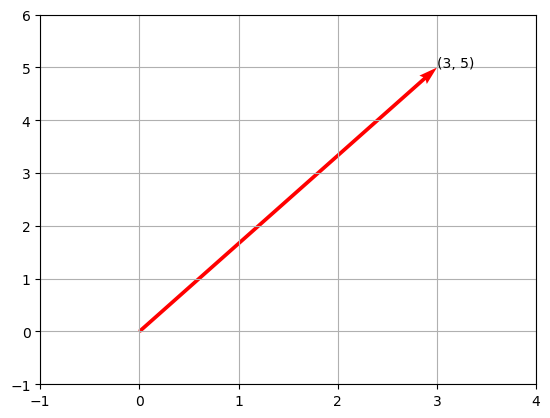

In [69]:
# The vector (3,5) (3 in x, 5 in y)

v      = np.array([3,5])

origin = np.array([0,0])

plt.quiver(origin[0], origin[1], 
           v[0], v[1], 
           color='red', 
           angles='xy', 
           scale_units='xy', 
           scale=1)

plt.annotate((v[0], v[1]), (v[0], v[1]))

plt.xlim([-1,4])
plt.ylim([-1, 6])
plt.grid()
plt.show()

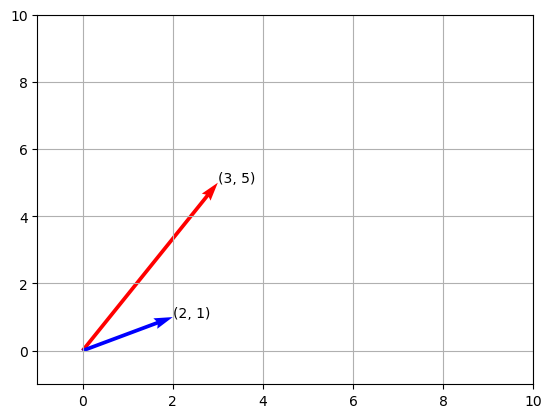

In [70]:
# Two vectors:
v1 = np.array([3,5])
v2 = np.array([2, 1])


plt.quiver(0, 0, v1[0], v1[1], 
           color       = 'red', 
           angles      = 'xy', 
           scale_units = 'xy', 
           scale       = 1)

plt.quiver(0, 0, v2[0], v2[1], 
           color       = 'blue', 
           angles      = 'xy', 
           scale_units = 'xy', 
           scale       = 1)
           

plt.annotate((v1[0], v1[1]), (v1[0], v1[1]))
plt.annotate((v2[0], v2[1]), (v2[0], v2[1]))           

plt.xlim([-1,10])
plt.ylim([-1, 10])
plt.grid()
plt.show()


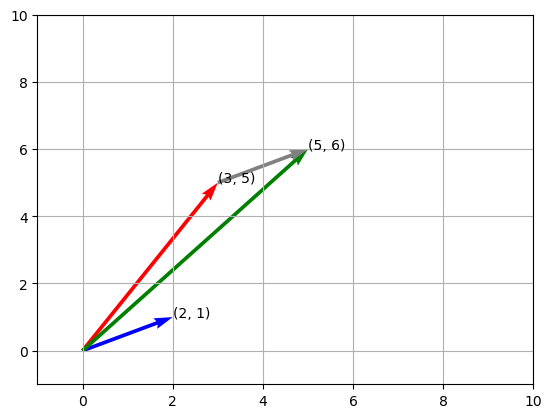

In [71]:
# Adding vectors
v1_2 = v1 + v2


plt.quiver(0, 0, v1[0], v1[1], 
           color       = 'red', 
           angles      = 'xy', 
           scale_units = 'xy', 
           scale       = 1)

plt.quiver(0, 0, v2[0], v2[1], 
           color       = 'blue', 
           angles      = 'xy', 
           scale_units = 'xy', 
           scale       = 1)


# The addition
plt.quiver(0, 0, v1_2[0], v1_2[1], 
           color       = 'green', 
           angles      = 'xy', 
           scale_units = 'xy', 
           scale       = 1)


# Help: put v2 on the endpoint of v1!
plt.quiver(v1[0], v1[1], v2[0], v2[1], 
           color       = 'gray', 
           angles      = 'xy', 
           scale_units = 'xy', 
           scale       = 1)


plt.annotate((v1[0], v1[1]), (v1[0], v1[1]))
plt.annotate((v2[0], v2[1]), (v2[0], v2[1]))           
plt.annotate((v1_2[0], v1_2[1]), (v1_2[0], v1_2[1]))  

plt.xlim([-1,10])
plt.ylim([-1, 10])
plt.grid()
plt.show()

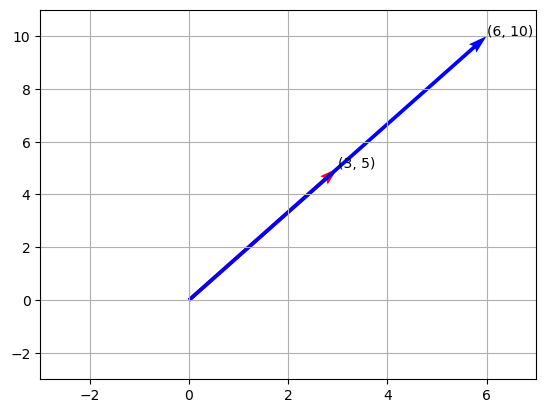

In [72]:
# Scaling vectors
vs = 2 * v

plt.quiver(0, 0, v[0], v[1], 
           color='red', 
           angles='xy', 
           scale_units='xy', 
           scale=1)


plt.quiver(0, 0, vs[0], vs[1], 
           color='blue', 
           angles='xy', 
           scale_units='xy', 
           scale=1)



plt.annotate((v[0], v[1]), (v[0], v[1]))
plt.annotate((vs[0], vs[1]), (vs[0], vs[1]))

plt.xlim([-3,7])
plt.ylim([-3,11])
plt.grid()
plt.show()

#### To the exercises
1. Write code to reverse a 2D vector (make it point in the reversed direction while keeping the sizes of the coordinates). If you can, plot it.

2. Write a function that calculates the length of a 2D vector.

3. Write a function that calculates the direction of a 2D vector as an angle from the x-axis counter clockwise.

4. Write a function that calculates the dot product of two vectors. Both vectors are ND (N dimensional): N is the length of both NumPy arrays. The dot product is a number calculated with $a \cdot b = a_0b_0 + a_1b_1 + \ldots + a_{N-1}b_{N-1}$

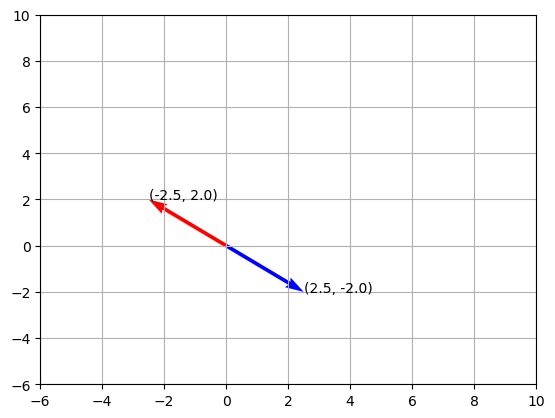

In [73]:
# Code for exercise 5.1
v1 = np.array([-2.5,2])
v2 = np.array([2.5, -2.])
plt.quiver(0, 0, v1[0], v1[1], 
           color       = 'red', 
           angles      = 'xy', 
           scale_units = 'xy', 
           scale       = 1)

plt.quiver(0, 0, v2[0], v2[1], 
           color       = 'blue', 
           angles      = 'xy', 
           scale_units = 'xy', 
           scale       = 1)
           

plt.annotate((v1[0], v1[1]), (v1[0], v1[1]))
plt.annotate((v2[0], v2[1]), (v2[0], v2[1]))           

plt.xlim([-6,10])
plt.ylim([-6, 10])
plt.grid()
plt.show()



In [74]:
# Code for exercise 5.2
np.sqrt(np.sum(np.array([3,5]) ** 2))


5.830951894845301

In [75]:
# Code for exercise  5.3
def vector_angle(vector):
    x, y = vector
    return np.arctan2(y, x)
#example
vector = np.array([3,4])
angle_radians = vector_angle(vector)
angle_degrees = np.degrees(angle_radians)

print("Angle (radians):", angle_radians)
print("Angle (degrees):", angle_degrees)



Angle (radians): 0.9272952180016122
Angle (degrees): 53.13010235415598


In [76]:
# Code for exercise 5.4
def dot_product(vector1, vector2):
    if vector1.shape != vector2.shape:
        raise ValueError("Vectors must have the same shape.")
    
    return np.sum(vector1 * vector2)
#example of dot products:
vector1 = np.array([1, 2,])  
vector2 = np.array([4, 5,])  
result = dot_product(vector1, vector2)

print("Dot Product:", result)

Dot Product: 14


### Exercise 6

Matrices with $m$ rows and $n$ columns ($m x n$ matrices) can be represented with NumPy arrays in 2 dimensions with shape ```(m, n)```. Matrices with one row are called row vectors and matrices with one column are called column vectors. Here are some examples.

In [79]:
m = 3
n = 5
print(np.ones((m,n)))
print('-----------------------------')
print(np.random.random((m,n)))
print('-----------------------------')
print(np.random.random((1,n)))
print('-----------------------------')
print(np.random.random((m,1)))

[[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]
-----------------------------
[[3.20359631e-01 7.74535202e-01 3.60311358e-01 4.96087767e-01
  8.61233113e-01]
 [7.77094068e-02 7.17579552e-01 2.05416162e-01 5.48392117e-04
  4.96219630e-01]
 [4.37028918e-01 5.38172948e-01 9.60065145e-01 8.80429327e-01
  9.63362503e-01]]
-----------------------------
[[0.27439742 0.84991507 0.26760689 0.56189412 0.25384905]]
-----------------------------
[[0.57607932]
 [0.47463348]
 [0.9113062 ]]


#### To the exercises

1. What does ```+``` do with matrices? Test at least with the following cases and explain what you observe:
```Python
np.arange(10).reshape(2,5) + 1
np.arange(10).reshape(2,5) + np.arange(10).reshape(2,5)
np.arange(10).reshape(2,5) + np.arange(5)
np.arange(10).reshape(2,5) + np.arange(2)
np.arange(10).reshape(2,5) + np.arange(10).reshape(5,2)
```

2. What does ```*``` do with matrices? Test at least with the following cases and explain what you observe:
```Python
np.arange(10).reshape(2,5) * 2
np.arange(10).reshape(2,5) * np.arange(10).reshape(2,5)
np.arange(10).reshape(2,5) * np.arange(5)
np.arange(10).reshape(2,5) * np.arange(2)
np.arange(10).reshape(2,5) * np.arange(10).reshape(5,2)
```

3. It seems that ```*``` is not the operation called [Matrix Multiplication](https://en.wikipedia.org/wiki/Matrix_multiplication) in maths! The operator ```@``` between NumPy arrays (of matching shapes for matrix multiplication) implements matrix multiplication. Test and comment on the follwing cases:
```Python
np.arange(10).reshape(2,5) @ np.arange(10).reshape(5,2)
np.arange(10).reshape(2,5) @ np.arange(5)
np.arange(10).reshape(2,5) @ np.arange(5).reshape(5,1)
np.arange(5).reshape(1,5) @ np.arange(5).reshape(5,1)
np.arange(5).reshape(5,1) @ np.arange(5).reshape(1,5)
```


4. Consider a row vector ```r``` of dimension 3 (shape 3 x 1) and a column vector ```c``` of dimension 3 (shape 1 x 3). What can you say about ```r @ c```? What mathematical operation between 3D vectors does it implement? Design some examples to test your answer.

5. For vectors as in 6.4 what can you say about ```c @ r```? What mathematical operation between 3D vectors does it implement? Design some examples to test your answer.

In [80]:
# Code for exercise 6.1
np.arange(10).reshape(2,5)+1
np.arange(10).reshape(2,5) + np.arange(10).reshape(2,5)
np.arange(10).reshape(2,5) + np.arange(5)
np.arange(10).reshape(2,5) + np.arange(2)
np.arange(10).reshape(2,5) + np.arange(10).reshape(5,2)


ValueError: operands could not be broadcast together with shapes (2,5) (2,) 

#### Answer to 6.1
1) np.arange(10).reshape(2,5)+1 
   
   In this case,we are adding a scalar value 1 to every element in the matrix. Previously before adding 1 we have following results:
   array([[0, 1, 2, 3, 4],
       [5, 6, 7, 8, 9]])
       And after adding 1 to every element in the matrix, we have following result: 
       array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10]]) 
       It have added 1 to each element of the matrix.
       
2)    np.arange(10).reshape(2,5) + np.arange(10).reshape(2,5)

      In this case, here we have added two matrices with the same shape element-wise. The elements at corresponding positions in the two matrices are added together.We have got a new matrix of the same shape as the input matrices.Here is the result:
      array([[ 0,  2,  4,  6,  8],
       [10, 12, 14, 16, 18]])
       
3)    np.arange(10).reshape(2,5) + np.arange(5)

      we have added a 1-dimensional array of shape (5) to a 2x5 matrix. It uses broadcasting to expand the dimensions of the 1D array to match the shape of the matrix. Each element of the 1D array is added to the corresponding column in the matrix and the result is: 
      array([[ 0,  2,  4,  6,  8],
       [ 5,  7,  9, 11, 13]])
       
4)    np.arange(10).reshape(2,5) + np.arange(2)
      
      we have added a 1-dimensional array of shape (2) to a 2x5 matrix. It uses broadcasting to expand the dimensions of the 1D array to match the shape of the matrix. But, in this case, operands could not be broadcast together with shapes (2,5) (2,). It's showing error.
      
5)    np.arange(10).reshape(2,5) + np.arange(10).reshape(5,2)

        In this case, We have tried to add two matrices with different shapes (2, 5) and (5, 2). Since the shapes are not compatible for element-wise addition,We have encountered a ValueError indicating that operands could not be broadcast together with shapes (2,5) (5,2).That means the shape is not alligned.  
      
          
      
       


In [81]:
# Code for exercise 6.2
np.arange(10).reshape(2,5) * 2
np.arange(10).reshape(2,5) * np.arange(10).reshape(2,5)
np.arange(10).reshape(2,5) * np.arange(5)
np.arange(10).reshape(2,5) * np.arange(2)
np.arange(10).reshape(2,5) * np.arange(10).reshape(5,2)


ValueError: operands could not be broadcast together with shapes (2,5) (2,) 

#### Answer to 6.2

1)    np.arange(10).reshape(2,5) * 2
     This operation multiplies a 2x5 NumPy array created from a range of values from 0 to 9 by the scalar value 2.
     The result is a new 2x5 array where each element in the original array is multiplied by 2 and result is:
     array([[ 0,  2,  4,  6,  8],
       [10, 12, 14, 16, 18]])
              
2)    np.arange(10).reshape(2,5) * np.arange(10).reshape(2,5)
     In this case we are multiplying two 2x5 NumPy arrays which are created from a range of values from 0 to 9. Element-wise        multiplication is performed, meaning each element in the first array is multiplied by the corresponding element in the          second array and the result is:
     array([[ 0,  1,  4,  9, 16],
       [25, 36, 49, 64, 81]])
       
3)    np.arange(10).reshape(2,5) * np.arange(5)
     We have performed element-wise multiplication between a 2D NumPy array and a 1D NumPy array and the 1D array with shape    (5,) is broadcasted to match the shape of the 2D array, and then element-wise multiplication is performed. Here's the result:
      array([[ 0,  1,  4,  9, 16],
       [ 0,  6, 14, 24, 36]]) The result of this operation will be a new 2D NumPy array where each element in the original 2D array is multiplied by the corresponding element in the 1D array.

4)    np.arange(10).reshape(2,5) * np.arange(2)
     We have multiplied a 1-dimensional array of shape (2) to a 2x5 matrix. It uses broadcasting to expand the dimensions of the 1D array to match the shape of the matrix. But, in this case, operands could not be broadcast together with shapes (2,5) (2,). It's showing error.Hence, thisoperation is not possible because the shapes of the two NumPy arrays involved are not compatible for element-wise multiplication.
  
5)    np.arange(10).reshape(2,5) * np.arange(10).reshape(5,2)
     In this case, We have tried to multiply two matrices with different shapes (2, 5) and (5, 2). Since the shapes are not compatible for element-wise multiplication,We have encountered a ValueError indicating that operands could not be broadcast together with shapes (2,5) (5,2).That means the shape is not alligned.
     

In [82]:
# Code for exercise 6.3

np.arange(10).reshape(2,5) @ np.arange(10).reshape(5,2)
np.arange(10).reshape(2,5) @ np.arange(5,)
np.arange(10).reshape(2,5) @ np.arange(5).reshape(5,1)
np.arange(5).reshape(1,5) @ np.arange(5).reshape(5,1)
np.arange(5).reshape(5,1) @ np.arange(5).reshape(1,5)

array([[ 0,  0,  0,  0,  0],
       [ 0,  1,  2,  3,  4],
       [ 0,  2,  4,  6,  8],
       [ 0,  3,  6,  9, 12],
       [ 0,  4,  8, 12, 16]])

#### Answer to 6.3
1)   np.arange(10).reshape(2,5) @ np.arange(10).reshape(5,2)
    we have created two NumPy arrays with np.arange(10) and reshapes them into a 2x5 matrix and a 5x2 matrix, respectively. The @ operator performs matrix multiplication (dot product). The result we have got is the product of the 2x5 matrix and the 5x2 matrix. Since the inner dimensions match (5), the result will be a 2x2 matrix of 
    array([[ 60,  70],
       [160, 195]])
       
2)   np.arange(10).reshape(2,5) @ np.arange(5)
    We have created a 2x5 matrix from np.arange(10) and a 1D array from np.arange(5). The @ operator has performed matrix multiplication. However, the second operand is a 1D array, in order to perform matrix multiplication, the number of columns in the first matrix must match the number of elements in the second array.  We got the result of array([30, 80]) but,  NumPy has treated it as a matrix of (5x1). 

3)   np.arange(10).reshape(2,5) @ np.arange(5).reshape(5,1)
    We have performed matrix multiplication (dot product) between a 2D NumPy array with shape (2, 5) and a 2D NumPy array with shape (5, 1).The result is the product of the 2x5 matrix and the 5x1 matrix, resulting in a 2x1 matrix of array([[30],
       [80]])

4)    np.arange(5).reshape(1,5) @ np.arange(5).reshape(5,1)
     In this case, each element in the 1D arrays into a 1x5 matrix is multiplied the columns of the second matrix of 5x1, following the rules of matrix multiplication. Since both arrays are 1D along their respective dimensions, the result is a scalar with array([[30]]).
     
5)    np.arange(5).reshape(5,1) @ np.arange(5).reshape(1,5)
     In this, both operands are reshaped into matrices, with the first being a 5x1 matrix and the second is a 1x5 matrix. The @ operator performs matrix multiplication. The result is the product of the 5x1 matrix and the 1x5 matrix, which is a 5x5 matrix with array([[ 0,  0,  0,  0,  0],
       [ 0,  1,  2,  3,  4],
       [ 0,  2,  4,  6,  8],
       [ 0,  3,  6,  9, 12],
       [ 0,  4,  8, 12, 16]]).






In [83]:
# Code for exercise 6.4
#example1
r = np.array([5, 3, 7]).reshape(1, 3)
c = np.array([1, 2, 4]).reshape(3, 1)

result = r @ c
print(result)
#example2
r = np.array([1, -2, 8]).reshape(1, 3)
c = np.array([5, 1, -6]).reshape(3, 1)

result = r @ c
print(result)

[[39]]
[[-45]]


#### Answer to 6.4

This operation r @ c performs a matrix multiplication (dot product) between a row vector 'r' and a column vector 'c'.The result of r @ c is a scalar value obtained by taking the dot product of these two vectors. The dot product is calculated by multiplying corresponding elements of the vectors and then summing those products. 
for the mathemetical operation let's consider the following: Row vector (r) of dimension 3 (shape 3 x 1): r = [a, b, c]
and column vector (c) of dimension 3 (shape 1 x 3): c = [x, y, z]
then, the matrix product(r @ c) is calculated as:
(r @ c) = ([a, b, c] @ [x, y, z]) = ax + by + cz . So, the result of r @ c is a scalar, and it represents the dot product of the two 3D vectors.

In [84]:
# Code for exercise 6.5
r = np.array([5, 3, 7]).reshape(1, 3)
c = np.array([1, 2, 4]).reshape(3, 1)

result = c @ r
print(result)
#example2
r = np.array([1, -2, 8]).reshape(1, 3)
c = np.array([5, 1, -6]).reshape(3, 1)

result = c @ r
print(result)

[[ 5  3  7]
 [10  6 14]
 [20 12 28]]
[[  5 -10  40]
 [  1  -2   8]
 [ -6  12 -48]]


#### Answer to 6.5
This operation c @ r performs a matrix multiplication (dot product) between a column vector 'c' and a row vector 'c'.The result of c @ r is a 3x3 matrix obtained by taking the dot product of these two vectors. The dot product is calculated by multiplying corresponding elements of the vectors. 
for the mathemetical operation let's consider the following: Row vector (r) of dimension 3 (shape 3 x 1): r = [a, b, c]
and column vector (c) of dimension 3 (shape 1 x 3): c = [x, y, z]
then, the matrix product(c @ r) is calculated as:
(c @ r) = ([x, y, z] @ [a, b, c]) = (c @ r) = [x*a, x*b, x*c]
                                              [y*a, y*b, y*c]
                                              [z*a, z*b, z*c] 
 So, the result of c @ r is  3x3 matrix.


## Part 3: A topic of your choice
### Asking questions to data using Pandas and NumPy

You will work with data about weather, climate and climate change. You are free to decide what you want to calculate and investigate. You should use at least two of the following data sources:

1. Our world in data, data about CO2 (and other gases) emissions. [Direct link for download](https://nyc3.digitaloceanspaces.com/owid-public/data/co2/owid-co2-data.csv). The dataset is linked from https://ourworldindata.org/co2-and-greenhouse-gas-emissions.

2. NASA data on monthly mean temperatures. [Direct link for download](https://data.giss.nasa.gov/gistemp/tabledata_v4/GLB.Ts+dSST.csv). The dataset is linked from https://data.giss.nasa.gov/gistemp/.

3. EPA data on ocean heat. [Direct link for download](https://www.epa.gov/sites/default/files/2021-04/ocean-heat_fig-1.csv). The data is documented in https://www.epa.gov/sites/default/files/2021-04/documents/ocean-heat_td.pdf and linked from https://www.epa.gov/climate-indicators/climate-change-indicators-ocean-heat



On completion of your project your solution to Part 3 should include the following parts:

* An introduction to what it is that you want to explore. 

* A description of the data sets that you use, including the sources and what kind of data they include.

* A section for loading the data (possibly from several data sets) including  code to explore and possibly clean or reorganize the data so that you can use it for the rest of the problem.
      
* A section that asks one or more questions that can be answered by exploring, combining, transforming the data. Make sure that you use at least two of the data sources and at least five columns in total.
   
* A section with programs for the questions. The programs should work with at least two of the data sources and at least five columns in total. 

* A section with an analysis of the results of your programs to explain the answers to your questions.

In each part there can be several cells, both code and markdown. But each section has to start with a markdown cell including at least the title of the section: you will find these cells with a little explanation alredy in the notebook.



# Introduction
Climate change signifies the enduring transformation of Earth's typical weather conditions, notably the rise in worldwide temperatures. This transformation is chiefly instigated by human actions, including the combustion of fossil fuels and deforestations, which emit greenhouse gases into the air. The outcomes of climate change extend widely, affecting ecosystems, changing climate over the years and increasing heat in sea levels. we will explore the relationship between rising global temperatures and increasing ocean heat using data from two reputable sources that is data about NASA data on monthly mean temperature and EPA data on ocean heat.
 

## Data sources
>
We are exploring two different datasets in the .csv file format. The one datasets contains NASA data on monthly mean temperature and another datasets contains EPA data on ocean heat. The  first data contain information about the temperature from January to December from year 1880 to 2023 with the Annual mean temperature. The second data contain information about heat Content in the Top 700 Meters of the World’s Oceans from the year 1955 to 2020				
</br>

In [85]:
# import libraries 
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import numpy as np

In [86]:
#reading data of NASA data on monthly mean temperature
mean_temperature = pd.read_csv('GLB.Ts+dSST.csv', skiprows=1)
mean_temperature

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,J-D,D-N,DJF,MAM,JJA,SON
0,1880,-0.18,-0.24,-0.09,-0.16,-0.10,-0.22,-0.18,-0.10,-0.14,-.23,-.22,-.18,-.17,***,***,-0.12,-0.17,-.20
1,1881,-0.19,-0.14,0.03,0.05,0.06,-0.19,0.00,-0.04,-0.16,-.22,-.19,-.07,-.09,-.10,-.17,0.05,-0.08,-.19
2,1882,0.16,0.14,0.04,-0.17,-0.15,-0.23,-0.17,-0.07,-0.14,-.24,-.17,-.36,-.11,-.09,.08,-0.09,-0.16,-.18
3,1883,-0.29,-0.37,-0.13,-0.19,-0.19,-0.08,-0.08,-0.15,-0.22,-.12,-.25,-.12,-.18,-.20,-.34,-0.17,-0.10,-.19
4,1884,-0.13,-0.09,-0.37,-0.40,-0.34,-0.36,-0.31,-0.29,-0.28,-.25,-.34,-.31,-.29,-.27,-.11,-0.37,-0.32,-.29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,2019,0.93,0.95,1.17,1.01,0.85,0.90,0.94,0.95,0.92,1.01,.99,1.09,.97,.96,.93,1.01,0.93,.97
140,2020,1.17,1.24,1.17,1.12,1.01,0.91,0.89,0.87,0.98,.88,1.10,.81,1.01,1.04,1.17,1.10,0.89,.99
141,2021,0.81,0.64,0.88,0.75,0.78,0.84,0.92,0.82,0.92,1.00,.93,.85,.84,.84,.75,0.81,0.86,.95
142,2022,0.91,0.89,1.05,0.83,0.83,0.92,0.93,0.95,0.89,.97,.72,.79,.89,.89,.88,0.90,0.93,.86


In [87]:
#reading data of  EPA data on ocean heat
ocean_heat = pd.read_csv('ocean-heat_fig-1.csv', skiprows=6, encoding='ISO-8859-1')

ocean_heat

,Year,CSIRO,IAP,MRI/JMA,NOAA
0,1955,NaN,-7.567433,-9.497333,-3.437233
1,1956,NaN,-6.933433,-7.897333,-2.844233
2,1957,NaN,-6.810433,-8.947333,-4.849233
3,1958,NaN,-2.275433,-5.707333,-1.769233
4,1959,NaN,-5.154433,-7.347333,-2.425233
...,...,...,...,...,...
61,2016,NaN,16.216567,13.522667,13.735767
62,2017,NaN,17.595567,15.742667,15.641767
63,2018,NaN,17.630567,16.642667,16.485767
64,2019,NaN,18.933567,17.872667,17.489767


#
After reading two datasets, we found that the first datasets contain 144 rows × 19 columns and the second datasets contain 66 rows × 5 columns.

In the first data of NASA data on monthly mean temperature we will see a different column with different values in it. The dataset provides temperature data by months and categorised as different months as interwal.
Year:The year the nasa temperature data is recorded.
Jan to Dec: Monthly mean temperature values for January to December
J-D: The annual mean temperature from January to December
D-N: The annual mean temperature from December to November.
DJF:The mean temperature for the months of December, January, and February (Winter).
MAM: The mean temperature for the months of March, April, and May (Spring).
JJA: The mean temperature for the months of June, July, and August (Summer).
SON: The mean temperature for the months of September, October, and November (Autumn).


In the second data of EPA data on ocean heat, it contains 
NOAA: This column contains data related to the "NOAA" (National Oceanic and Atmospheric Administration).
Year: This column contains the years from 1955 to 2020.
CSIRO:This column seems to be filled with "NaN" values, which typically represent missing or undefined data.
IAP: This column contains data related to "IAP." Institute of Atmospheric Physics.
MRI/JMA: This column contains data related to "Meteorological Research Institute" (MRI) and the "Japan Meteorological Agency" (JMA)
For displaying .csv file EPA data on ocean heat we have use encoding='ISO-8859-1'.This ensures that Pandas correctly interprets the text in the file and avoids issues related to character encoding mismatches.



In [88]:
mean_temperature.dtypes

Year      int64
Jan     float64
Feb     float64
Mar     float64
Apr     float64
May     float64
Jun     float64
Jul     float64
Aug     float64
Sep     float64
Oct      object
Nov      object
Dec      object
J-D      object
D-N      object
DJF      object
MAM     float64
JJA     float64
SON      object
dtype: object

There are columns only with strings (object).

In [89]:
ocean_heat.dtypes

Year         int64
CSIRO      float64
IAP        float64
MRI/JMA    float64
NOAA       float64
dtype: object

There are columns only with strings (object).

In [90]:
mean_temperature.describe()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,MAM,JJA
count,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.00000,144.000000,144.000000,144.000000
mean,1951.500000,0.062361,0.069375,0.086944,0.061389,0.050556,0.037847,0.062222,0.06000,0.067222,0.066597,0.053264
std,41.713307,0.422475,0.426185,0.432890,0.395539,0.377453,0.375604,0.358205,0.37476,0.375607,0.396984,0.365687
min,1880.000000,-0.810000,-0.630000,-0.630000,-0.590000,-0.550000,-0.520000,-0.510000,-0.55000,-0.580000,-0.580000,-0.500000
25%,1915.750000,-0.242500,-0.232500,-0.222500,-0.245000,-0.242500,-0.250000,-0.190000,-0.22000,-0.192500,-0.252500,-0.220000
50%,1951.500000,-0.015000,-0.040000,0.010000,-0.025000,-0.040000,-0.050000,-0.030000,-0.04500,-0.055000,-0.025000,-0.045000
75%,1987.250000,0.302500,0.382500,0.320000,0.275000,0.270000,0.255000,0.252500,0.25250,0.250000,0.302500,0.255000
max,2023.000000,1.170000,1.360000,1.350000,1.120000,1.010000,1.070000,1.180000,1.19000,1.470000,1.130000,1.150000


We have check the Statistics of the NASA data on monthly mean temperature by using .decsribe() function. We got the mean, standard deviation, min, 25%, 50%, 75% and maximum.

In [91]:
ocean_heat.describe()

,Year,CSIRO,IAP,MRI/JMA,NOAA
count,66.000000,56.000000,66.000000,66.000000,66.000000
mean,1987.500000,1.958702,2.861839,2.107364,2.652024
std,19.196354,6.211701,7.708317,7.322055,6.635209
min,1955.000000,-7.519333,-7.567433,-9.497333,-5.964233
25%,1971.250000,-2.779333,-2.915933,-3.607333,-2.533733
50%,1987.500000,1.420667,-0.275933,0.627667,0.138267
75%,2003.750000,6.240667,9.670067,8.690167,8.975267
max,2020.000000,15.880667,20.007567,18.082667,17.489767


We have check Statistics of the EPA data on ocean heat by using the same above called function in pandas. We got the mean, standard deviation, min, 25%, 50%, 75% and maximum.

In [92]:
mean_temperature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    144 non-null    int64  
 1   Jan     144 non-null    float64
 2   Feb     144 non-null    float64
 3   Mar     144 non-null    float64
 4   Apr     144 non-null    float64
 5   May     144 non-null    float64
 6   Jun     144 non-null    float64
 7   Jul     144 non-null    float64
 8   Aug     144 non-null    float64
 9   Sep     144 non-null    float64
 10  Oct     144 non-null    object 
 11  Nov     144 non-null    object 
 12  Dec     144 non-null    object 
 13  J-D     144 non-null    object 
 14  D-N     144 non-null    object 
 15  DJF     144 non-null    object 
 16  MAM     144 non-null    float64
 17  JJA     144 non-null    float64
 18  SON     144 non-null    object 
dtypes: float64(11), int64(1), object(7)
memory usage: 21.5+ KB


There are no any missing values in NASA data on monthly mean temperature.

In [93]:
ocean_heat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Year     66 non-null     int64  
 1   CSIRO    56 non-null     float64
 2   IAP      66 non-null     float64
 3   MRI/JMA  66 non-null     float64
 4   NOAA     66 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 2.7 KB


There is a 10 missing value in the column CSIRO.

In [94]:
missing_values1 = mean_temperature.isnull().sum()
missing_values1


Year    0
Jan     0
Feb     0
Mar     0
Apr     0
May     0
Jun     0
Jul     0
Aug     0
Sep     0
Oct     0
Nov     0
Dec     0
J-D     0
D-N     0
DJF     0
MAM     0
JJA     0
SON     0
dtype: int64

In [95]:
missing_values2 = ocean_heat.isnull().sum()
missing_values2

Year        0
CSIRO      10
IAP         0
MRI/JMA     0
NOAA        0
dtype: int64

 We are confirm that, there is a 10 value missing in the column CSIRO.

As we saw in the mean_temperature data there are no missing values in NASA data on monthly mean temperature. But in the Ocean_heat data there are some missing values in the column CISRO.

In [96]:
#Extract the global annual mean temperature namel JD and create new data set temperature
temperature= mean_temperature[['Year', 'J-D', 'MAM', 'JJA']]
temperature

,Year,J-D,MAM,JJA
0,1880,-.17,-0.12,-0.17
1,1881,-.09,0.05,-0.08
2,1882,-.11,-0.09,-0.16
3,1883,-.18,-0.17,-0.10
4,1884,-.29,-0.37,-0.32
...,...,...,...,...
139,2019,.97,1.01,0.93
140,2020,1.01,1.10,0.89
141,2021,.84,0.81,0.86
142,2022,.89,0.90,0.93


We have extracted the Global annual mean temperature with column Year, 	J-D,	MAM,	JJA and create new data set "temperature".

In [97]:
# Merge the DataFrames using the common_column_name
merged_table = temperature.merge(ocean_heat, on='Year', how='inner')
merged_table


,Year,J-D,MAM,JJA,CSIRO,IAP,MRI/JMA,NOAA
0,1955,-.14,-0.25,-0.08,NaN,-7.567433,-9.497333,-3.437233
1,1956,-.19,-0.26,-0.17,NaN,-6.933433,-7.897333,-2.844233
2,1957,.05,0.01,0.11,NaN,-6.810433,-8.947333,-4.849233
3,1958,.06,0.05,-0.03,NaN,-2.275433,-5.707333,-1.769233
4,1959,.03,0.13,0.02,NaN,-5.154433,-7.347333,-2.425233
...,...,...,...,...,...,...,...,...
61,2016,1.01,1.13,0.88,NaN,16.216567,13.522667,13.735767
62,2017,.92,1.00,0.80,NaN,17.595567,15.742667,15.641767
63,2018,.85,0.86,0.78,NaN,17.630567,16.642667,16.485767
64,2019,.97,1.01,0.93,NaN,18.933567,17.872667,17.489767


We have merged the two datasets, one is ocean_heat and another is temperature using the common_column_name.
We have formed the following column after merging:
(Year, J-D, MAM, JJA, CSIRO, IAP, MRI/JMA, NOAA.)

In [98]:
merged_table2 = merged_table.drop(columns=["CSIRO"])
merged_table2

,Year,J-D,MAM,JJA,IAP,MRI/JMA,NOAA
0,1955,-.14,-0.25,-0.08,-7.567433,-9.497333,-3.437233
1,1956,-.19,-0.26,-0.17,-6.933433,-7.897333,-2.844233
2,1957,.05,0.01,0.11,-6.810433,-8.947333,-4.849233
3,1958,.06,0.05,-0.03,-2.275433,-5.707333,-1.769233
4,1959,.03,0.13,0.02,-5.154433,-7.347333,-2.425233
...,...,...,...,...,...,...,...
61,2016,1.01,1.13,0.88,16.216567,13.522667,13.735767
62,2017,.92,1.00,0.80,17.595567,15.742667,15.641767
63,2018,.85,0.86,0.78,17.630567,16.642667,16.485767
64,2019,.97,1.01,0.93,18.933567,17.872667,17.489767


We have removed the one column named "CSIRO" that contain NaN value after merging with NASA data on monthly mean temperature which is mean_temperature. Now, We have created a new dataset name merged_table2 with column name:
(Year, J-D, MAM, JJA, IAP, MRI/JMA, NOAA)

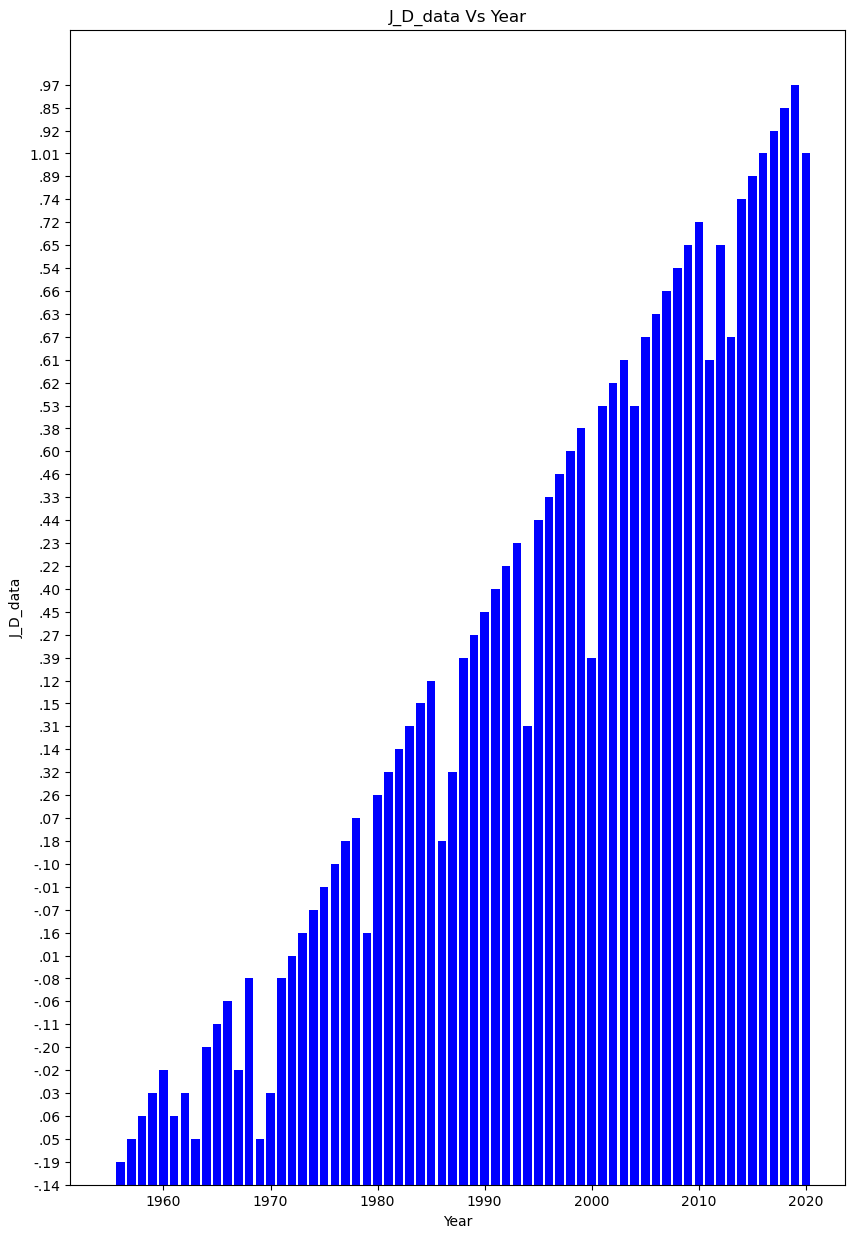

In [99]:
years = merged_table2['Year']
J_D_data = merged_table2['J-D']

# Creating a bar plot
plt.figure(figsize=(10, 15))
plt.bar(years, J_D_data, color='blue')
plt.title('J_D_data Vs Year')
plt.xlabel('Year')
plt.ylabel('J_D_data')

plt.show()

The above code plot a barplot displaying the J-D values over the years.

## Programs

> There are 4 question that need to be program:

    1) Determine the minimum and maximum global mean temperature over the years.
    
    2) Determine the minimum and maximum Ocean heat over the years?
    
    3) What are the correlations between ocean heat content and global temperature?
    
    4) Can regresssion line visualize the relationship between each climate variable and the year?
   

# Question 1 solution
   Determine the minimum and maximum global mean temperature over the years?

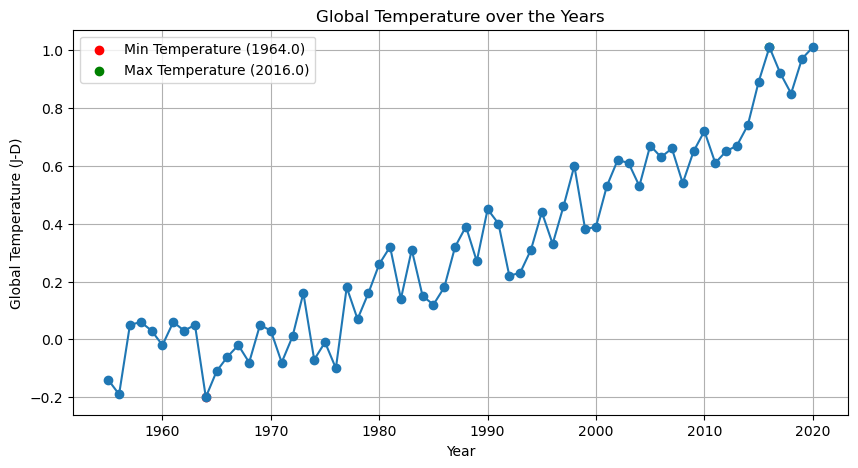

In [100]:
merged_table2['J-D'] = pd.to_numeric(merged_table2['J-D'], errors='coerce')
min_temp_year = merged_table2.loc[merged_table2['J-D'].idxmin()]['Year']
max_temp_year = merged_table2.loc[merged_table2['J-D'].idxmax()]['Year']



plt.figure(figsize=(10, 5))
plt.plot(merged_table2['Year'], merged_table2['J-D'], marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Global Temperature (J-D)')
plt.title('Global Temperature over the Years')
plt.grid(True)


plt.scatter(min_temp_year, merged_table2['J-D'].min(), c='red', marker='o', label=f'Min Temperature ({min_temp_year})')
plt.scatter(max_temp_year, merged_table2['J-D'].max(), c='green', marker='o', label=f'Max Temperature ({max_temp_year})')

plt.legend()
plt.show()

Based on provided datasets, we have created a scattered plot for the global mean temperature over the years. In X-axis there are years and in Y-axis there is a temperature from january to december(J-D). 
Minimum and Maximum Temperature over the years: We identified the years with the minimum and maximum global temperatures. The year with the lowest temperature is 1964, and the year with the highest temperature 2016. As we have seen in the pattern that in the year 2019 the temperature(J-D) has slightly gone down.This may be due to the COVID-19 outbreak because, at the time of covid-19, most of the factories, industrial areas and business with more carbon emissions are shutdown so, we can see the pattern in the year 2019 is decreasing in order. After that it is going up from the year 2020.

# Question 2 solution
Determine the minimum and maximum Ocean heat over the years?

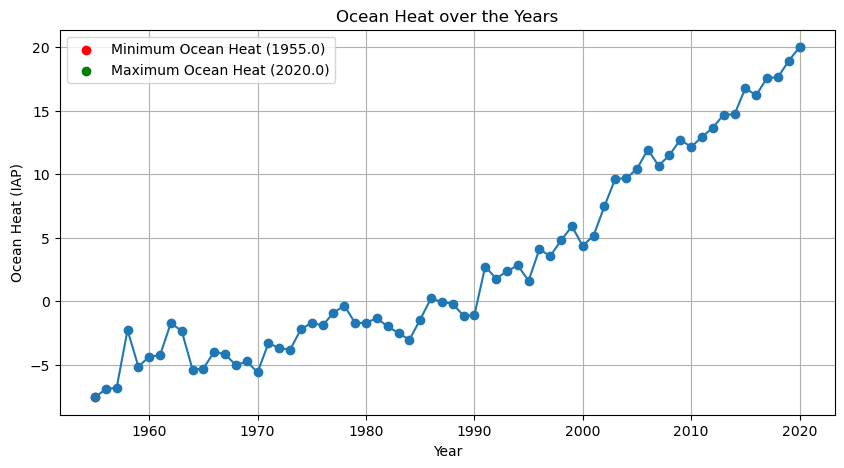

In [101]:
min_ocean_heat_year = merged_table2.loc[merged_table2['IAP'].idxmin()]['Year']
max_ocean_heat_year = merged_table2.loc[merged_table2['IAP'].idxmax()]['Year']


plt.figure(figsize=(10, 5))
plt.plot(merged_table2['Year'], merged_table2['IAP'], marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Ocean Heat (IAP)')
plt.title('Ocean Heat over the Years')
plt.grid(True)

plt.scatter(min_ocean_heat_year, merged_table2['IAP'].min(), c='red', marker='o', label=f'Minimum Ocean Heat ({min_ocean_heat_year})')
plt.scatter(max_ocean_heat_year, merged_table2['IAP'].max(), c='green', marker='o', label=f'Maximum Ocean Heat ({max_ocean_heat_year})')

plt.legend()
plt.show()

Based on provided datasets, we have created a scattered plot for the Ocean Heat over the years. In X-axis there are years and in Y-axis there is a Ocean heat data (IAP). 
Minimum and Maximum ocean heat over the years: We identified the years with the minimum and maximum ocean heat. The year with the lowest ocean heat is 1955, and the year with the highest ocean heat is 2020.

The year with the minimum ocean heat (IAP) is 1955, with an IAP value of -6.933433. 
The year with the maximum ocean heat (IAP) is 2020, with an IAP value of 20.007567.
This suggests that there is an increasing trends in ocean heat over the years, with 2020 being more warmer compared to earlier years.

# Question 3 solution
What are the correlations between ocean heat content and global temperature?

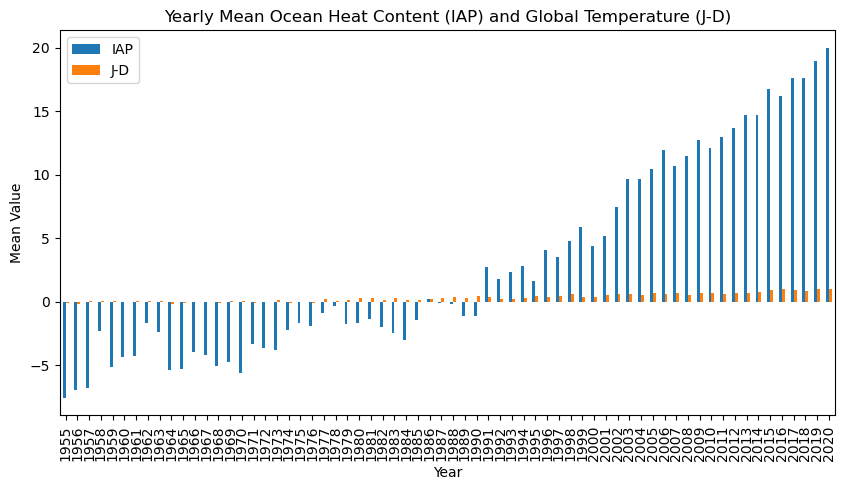

In [102]:
yearly_mean = merged_table2.groupby('Year')[['IAP', 'J-D']].mean()
yearly_mean.plot(kind='bar', figsize=(10, 5))
plt.title('Yearly Mean Ocean Heat Content (IAP) and Global Temperature (J-D)')
plt.xlabel('Year')
plt.ylabel('Mean Value')

plt.show()

As we created the merged_table2 from two datasets, now we have taken mean from the two columns of different datasets. We have taken column (J-D) from mean_temperature  and column (IAP) from ocean_heat and plotted years in X-axis and Mean value of (J-D) and (IAP) in Y-axis.
The orange bar represents the global mean temperature change.
The blue bar represents the World's ocean heat.

In the plot, We can see how global mean temperature change (J-D) and the occean heat vary over the given years.
As we can see, the orange bar represents the  mean Temperature and the  blue bars represents ocean heat move in a similar direction from 1990 to 2020, it indicates that there is a correlation between global mean temperature change and the ocean heat. In this case, both seem to increase linearly from 1990 to 2020.
In other case we have found that bars are moving towards opposite directions from 1977 to 1990 indicating a negative corelation between the global mean temperature and the Ocean heat.

# Question 4 solution
Can regresssion line visualize the relationship between each climate variable and the year?

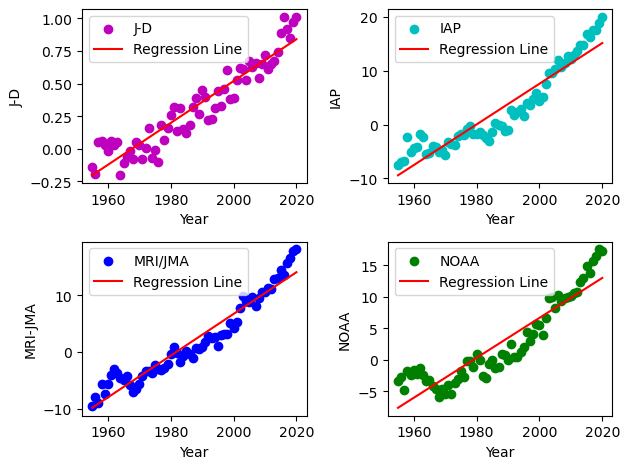

In [103]:
from sklearn.linear_model import LinearRegression

# Create a linear regression model
model = LinearRegression()

# Define X and y for regression
X = merged_table2[['Year']]
y_jd = merged_table2['J-D']
y_iap = merged_table2['IAP']
y_mri_jma = merged_table2['MRI/JMA']
y_noaa = merged_table2['NOAA']

# Fit the regression model for each climate variable
model.fit(X, y_jd)
y_pred_jd = model.predict(X)

model.fit(X, y_iap)
y_pred_iap = model.predict(X)

model.fit(X, y_mri_jma)
y_pred_mri_jma = model.predict(X)

model.fit(X, y_noaa)
y_pred_noaa = model.predict(X)

# Create subplots
plt.subplot(2, 2, 1)
plt.scatter(merged_table2['Year'], y_jd, label='J-D', color='m')
plt.plot(merged_table2['Year'], y_pred_jd, color='r', label='Regression Line')
plt.xlabel('Year')
plt.ylabel('J-D')
plt.legend()

plt.subplot(2, 2, 2)
plt.scatter(merged_table2['Year'], y_iap, label='IAP', color='c')
plt.plot(merged_table2['Year'], y_pred_iap, color='r', label='Regression Line')
plt.xlabel('Year')
plt.ylabel('IAP')
plt.legend()

plt.subplot(2, 2, 3)
plt.scatter(merged_table2['Year'], y_mri_jma, label='MRI/JMA', color='b')
plt.plot(merged_table2['Year'], y_pred_mri_jma, color='r', label='Regression Line')
plt.xlabel('Year')
plt.ylabel('MRI-JMA')
plt.legend()

plt.subplot(2, 2, 4)
plt.scatter(merged_table2['Year'], y_noaa, label='NOAA', color='g')
plt.plot(merged_table2['Year'], y_pred_noaa, color='r', label='Regression Line')
plt.xlabel('Year')
plt.ylabel('NOAA')
plt.legend()

plt.tight_layout()
plt.show()


 We have created scatter plots for different climate variables and regression lines. we have plot a linear regression model for each climate variable and then plotted the scatter plots along with the respective regression lines for J-D, IAP, MRI/JMA, and NOAA columns.
This will visualize the relationship between each climate variable and the year.
If the regression lines have a positive slope, it suggests an increasing trend over the years, and a negative slope suggests a decreasing trend.


## Results and analysis

Based on the analysis of the provided datasets and the visualizations created, The analysis of provided data from the dataset NASA data on monthly mean temperature shows that global temperatures have generally risen over time, with the highest temperature in 2016. A dip in 2019, likely due to COVID-19, and is followed by a continued increase. The another dataset EPA data on ocean heat content has also increased significantly, with the highest level recorded in 2020. The correlation between rising global temperatures and increasing ocean heat content are interconnected as We can see how global mean temperature change (J-D) and the occean heat vary over the given years as mean Temperature and ocean heat move in a similar direction from 1990 to 2020. This shows us that the Global mean temperature and Ocean heat are co-related and this analysis underscores the urgency of addressing climate change.

From the above analysis, we came to know that if we are able to do afforeststions and tree plantation in different areas of the world we will manage to reduce the climate change and temperature rising issue. And preventing further ocean heat and climate change requires a collective effort involving individuals, communities, governments, and industries to reduce emissions and plastic pollution in ocean. By doing these things, we might be able to protect our planet Earth.



